# Дипломный проект "Модель прогнозирования стоимости жилья для агентства недвижимости".

# 1. Постановка задачи. Знакомство с данными.

**Описание проекта**  
Агентство недвижимости столкнулось с проблемой: риелторы тратят слишком много времени на сортировку объявлений и поиск выгодных предложений. Поэтому скорость их реакции и качество анализа не дотягивают до уровня конкурентов. Это сказывается на финансовых показателях агентства.  


**Бизнес-задача**  
Повысить прибыль агентства недвижимости за счет увеличения скорости реакции риелторов и качества их работы при продаже объектов недвижимости.  

**Техническая задача для специалиста Data Science**  
Разработать модель, которая позволила бы агентству недвижимости обойти конкурентов по скорости и качеству совершения сделок на продажу объектов недвижимости.  

**Основные цели проекта:**
1. Произвести предобработку и разведывательный анализ набора реальных данных (обработать пропуски, дубликаты и выбросы, устранить ошибки ввода, расшифровать сокращения, отыскать закономерности, сгенерировать новые признаки с использованием внешних источников).
2. Выделить наиболее значимые факторы, влияющие на стоимость недвижимости.  
3. Построить несколько моделей для прогнозирования стоимости недвижимости и отобрать лучшую по целевой метрике.  

In [555]:
# Загрузка необходимых для реализации проекта библиотек
import category_encoders as ce
import matplotlib
import matplotlib.pyplot as plt 
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
import scipy as sp
import scipy.optimize as spo
import seaborn as sns 
import sklearn.metrics as metrics
import statsmodels.api as sm
import warnings
import ydata_profiling
import sweetviz as sv

from catboost import CatBoostRegressor
from itertools import chain
from scipy import stats
from sklearn import feature_selection
from sklearn import preprocessing 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor

warnings.filterwarnings("ignore")
%matplotlib inline
matplotlib.style.use('ggplot')

In [378]:
# Прочитаем данные
df = pd.read_csv('file:///D:/ds_data/data.csv')
# Посмотрим первые 5 строчек таблицы
df.head(5)


status private pool        propertyType               street    baths  \
0    Active          NaN  Single Family Home       240 Heather Ln      3.5   
1  for sale          NaN  single-family home    12911 E Heroy Ave  3 Baths   
2  for sale          NaN  single-family home    2005 Westridge Rd  2 Baths   
3  for sale          NaN  single-family home  4311 Livingston Ave  8 Baths   
4  for sale          NaN            lot/land       1524 Kiscoe St      NaN   

                                           homeFacts fireplace  \
0  {'atAGlanceFacts': [{'factValue': '2019', 'fac...  Gas Logs   
1  {'atAGlanceFacts': [{'factValue': '2019', 'fac...       NaN   
2  {'atAGlanceFacts': [{'factValue': '1961', 'fac...       yes   
3  {'atAGlanceFacts': [{'factValue': '2006', 'fac...       yes   
4  {'atAGlanceFacts': [{'factValue': '', 'factLab...       NaN   

             city                                            schools  \
0  Southern Pines  [{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...   
1  Spokane Valley  [{'rating': ['4/10', 'None/10', '4/10'], 'data...   
2     Los Angeles  [{'rating': ['8/10', '4/10', '8/10'], 'data': ...   
3          Dallas  [{'rating': ['9/10', '9/10', '10/10', '9/10'],...   
4        Palm Bay  [{'rating': ['4/10', '5/10', '5/10'], 'data': ...   

         sqft zipcode    beds state stories mls-id PrivatePool       MlsId  \
0        2900   28387       4    NC     NaN    NaN         NaN      611019   
1  1,947 sqft   99216  3 Beds    WA     2.0    NaN         NaN   201916904   
2  3,000 sqft   90049  3 Beds    CA     1.0    NaN         yes  FR19221027   
3  6,457 sqft   75205  5 Beds    TX     3.0    NaN         NaN    14191809   
4         NaN   32908     NaN    FL     NaN    NaN         NaN      861745   

       target  
0    $418,000  
1    $310,000  
2  $2,895,000  
3  $2,395,000  
4      $5,000

In [379]:
# Посмотрим информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

Описание данных:  

➔ 'status' — статус продажи;  
➔ 'private pool' и 'PrivatePool' — наличие собственного бассейна;  
➔ 'propertyType' — тип объекта недвижимости;  
➔ 'street' — адрес объекта;  
➔ 'baths' — количество ванных комнат;  
➔ 'homeFacts' — сведения о строительстве объекта (содержит несколько типов сведений, влияющих на оценку объекта);  
➔ 'fireplace' — наличие камина;  
➔ 'city' — город;  
➔ 'schools' — сведения о школах в районе;  
➔ 'sqft' — площадь в футах;  
➔ 'zipcode' — почтовый индекс;  
➔ 'beds' — количество спален;  
➔ 'state' — штат;  
➔ 'stories' — количество этажей;  
➔ 'mls-id' и 'MlsId' — идентификатор MLS (Multiple Listing Service, система мультилистинга);  
➔ 'target' — цена объекта недвижимости (целевой признак, который необходимо спрогнозировать).

### Важные сведения о данных:
- Признаки 'homeFacts' и 'schools' представляют собой словари и содержат несколько типов сведений. Необходимо десериализовать содержимое этих признаков. Если в нём есть полезные данные, необходимо создать из них новые признаки.

- Типы жилья и их основные характеристики (может пригодиться при обработке признака propertyType):
   
    ➔ apartment — съёмная квартира (нельзя купить);

    ➔ condo — кондоминиум (можно купить);

    ➔ co-op — квартира в жилищном кооперативе;

    ➔ single-family (detached, tiny home) — односемейный (отдельный, маленький) дом;

    ➔ townhome, townhouse — таунхаус;

    ➔ cape cod — черепичная крыша, облицовка деревянным сайдингом, дверь в центре здания, окна по бокам, один-два этажа;

    ➔ colonial home — минимум два этажа, симметрия, лестница в центре здания, строгий внешний вид;

    ➔ contemporary — чистые, простые линии, нейтральные цвета, натуральные текстуры;

    ➔ cottage — небольшая уютная веранда, небольшие жилые помещения;

    ➔ craftsman — деревянные элементы ручной работы, выступающие балки, большие колонны;

    ➔ Greek revival — большие белые колонны, украшения в греческом стиле, нарядный вход;

    ➔ farmhouse — прямоугольная планировка, большое крыльцо, амбарная крыша;

    ➔ French country — влияние прованса, облицовка камнем, состаренный вид;

    ➔ Mediterranean — белая штукатурка, дерево и камень в тёплых тонах, черепичные крыши, элементы испанских и итальянских вилл;

    ➔ midcentury modern — сочетание плавных природных и строгих геометрических линий, гладкость, лаконичность, большие окна;

    ➔ ranch — один этаж, низкая крыша, открытые жилые помещения, задний двор;

    ➔ split-level — жилые помещения разделены короткими лестничными пролётами;

    ➔ Tudor — деревянные балки, каменная кладка, асимметричная крутая двускатная крыша;

    ➔ Victorian (Queen Anne Houses) — два-три и более этажей, богатый декор, крутая двускатная крыша, небольшие башенки, яркий фасад;

    ➔ European Houses style — кирпич или камень, высокая крутая крыша, высокие окна, часто со ставнями, традиционные декоративные детали (фронтоны, замковые камни);

    ➔ log home — деревянный дом.


- Некоторые жаргонные сокращения — для исправления дублирования (может пригодиться при обработке признака propertyType):
   
    ➔ 'manufactured home (house)' = 'mobile' = 'prefab' = 'modular';

    ➔ 'mobile' = 'mo2 le' = 'mo2le';

    ➔ 'cabin' = 'ca2 n' = 'ca2n';

    ➔ midcentury = mid century = mid-century;

    ➔ single family = single-family home.

- Некоторые термины, используемые в сфере купли-продажи недвижимости:
  
    ➔ status — статус, состояние.

    ➔ estate — объект недвижимости.

    ➔ 'foreclosed' ('foreclosure') — «лишён права выкупа». Это процесс, когда недвижимость переходит к кредитору из-за неуплаты ипотеки заёмщиком. Продажа foreclosure-недвижимости отличается от традиционных продаж.

    ➔ 'pre foreclosure' ('pre foreclosure auction') — «до выкупа», «аукцион до выкупа».

    ➔ 'under contract showing' ('under contract show', 'under contract', 'active under contract') — предложение о покупке уже сделано, но не принято продавцом окончательно, и недвижимость продолжают показывать другим потенциальным покупателям.

    ➔ 'under contract backups', 'active backup', 'backup contract' — предложение о покупке уже сделано и принято продавцом, однако он открыт для резервных предложений.

    ➔ 'contingency' — дополнительные обстоятельства (критерии, которым должен соответствовать продавец/покупатель до завершения сделки).

    ➔ 'contingency contract' — контракт на случай возникновения дополнительных обстоятельств.

    ➔ 'active contingency' — сделка уже практически состоялась, однако продавцу/покупателю для её завершения необходимо выполнить какие-то условия.

    ➔ 'insp inspection contingency' — ситуация, когда покупатель может официально проинспектировать объект недвижимости в определённый период времени.

    ➔ 'pending escape clause' — договор, предполагающий свободный выход сторон из него.

    ➔ 'pending backup wanted' — договор уже заключен, однако продавец хочет продолжать показывать недвижимость другим потенциальным покупателям и принимать резервные предложения.

    ➔ 'pending take backups' — условие, предполагающее, что продавец может принимать резерные предложения, если сделка с текущим покупателем не состоится.

    ➔ 'pending continue show' — договор уже заключен, однако продавец хочет продолжать показывать недвижимость другим потенциальным покупателям на случай, если текущая сделка не состоится.

    ➔ 'pending inspection' — «в ожидании инспекции».

    ➔ 'due diligence period' — период, в течение которого покупатель имеет право проинспектировать недвижимость и изучить всю важную для заключения сделки информацию.

    ➔ 'activated' — «активен», открыт для покупки.

    ➔ 'active with contract' — продавец уже принял предложение о покупке, однако сделка ещё не закрыта.

    ➔ 'active with offer' — продавец принял предложение о покупке, однако ищет резервные предложения на случай, если сделка с текущим покупателем не   состоится.

    ➔ 'active auction', 'auction active', 'auction' — продажа недвижимости с помощью аукциона.

    ➔ cooling-off period — период, в течение которого покупатель может расторгнуть договор после завершения сделки.


# 2. Очистка данных.

In [380]:
# Посчитаем количество дубликатов в данных
df.duplicated().sum()    

50

In [381]:
# Удалим дубликаты
df = df.drop_duplicates(ignore_index=True)

In [382]:
# Проверим остались ли дубликаты
df.duplicated().sum()    

0

Для удобства изучения данных проанализируем наш датафрейм через sweetviz и сохраним отчет в вормате html.

In [556]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated.
ERROR: comet_ml is installed, but not configured properly (e.g. check API key setup). HTML reports will not be uploaded.



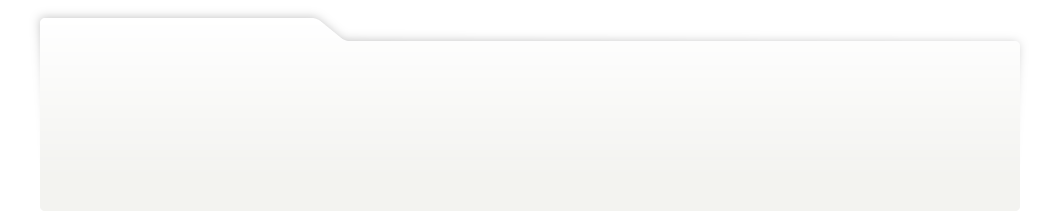
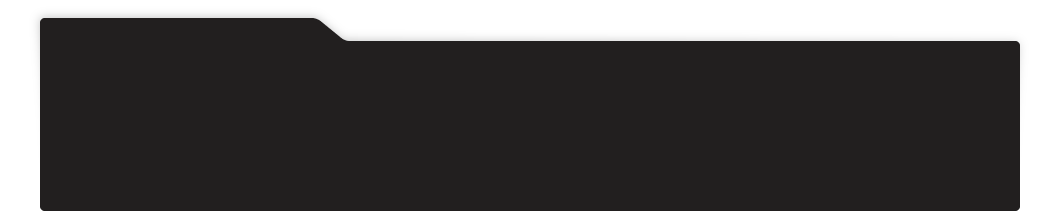
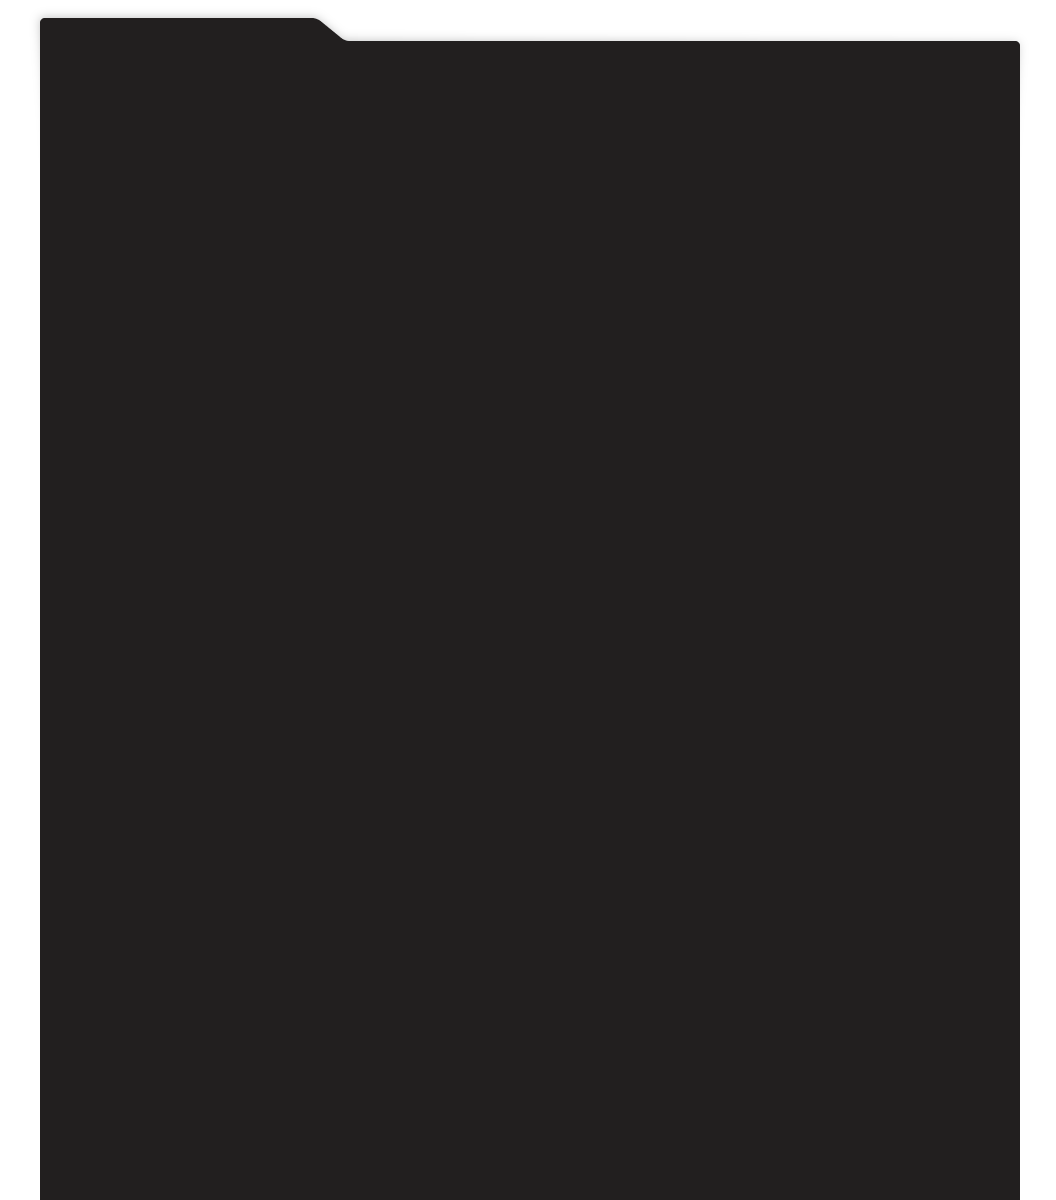
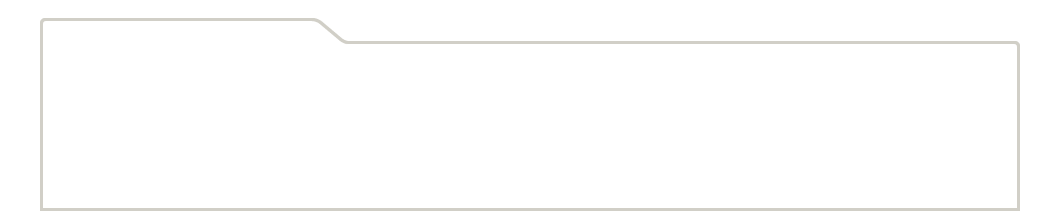
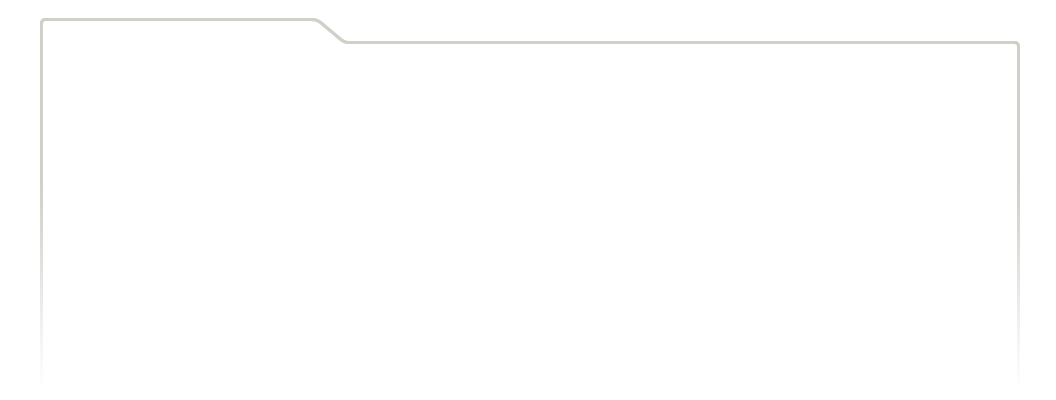
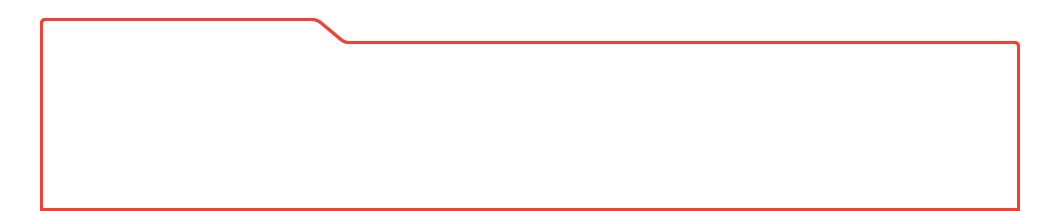
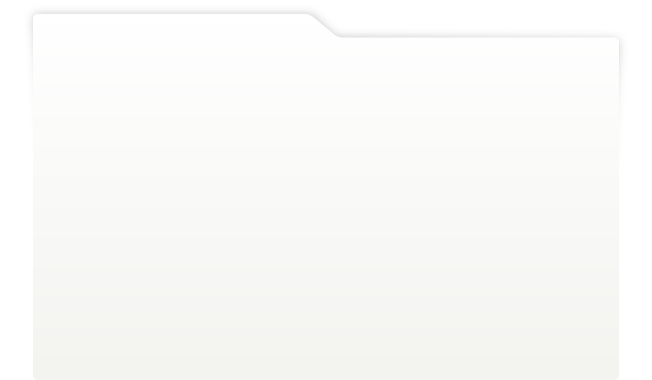
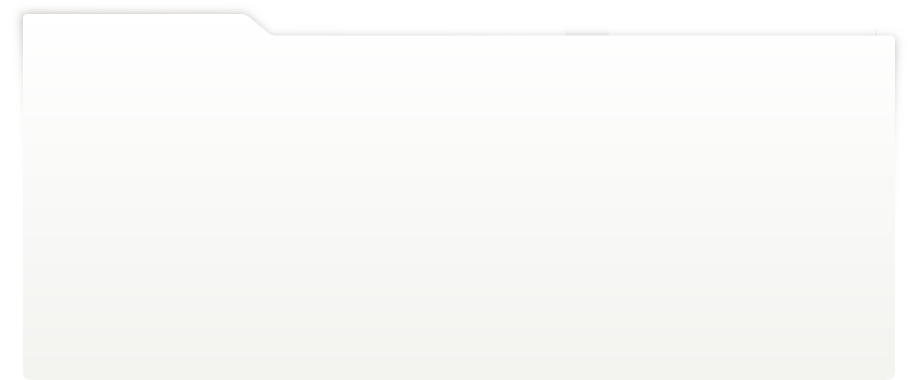
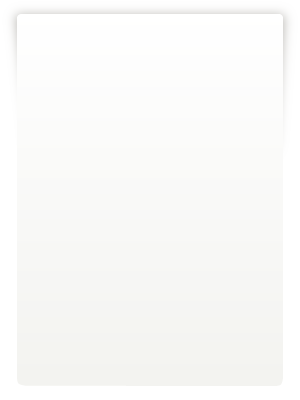
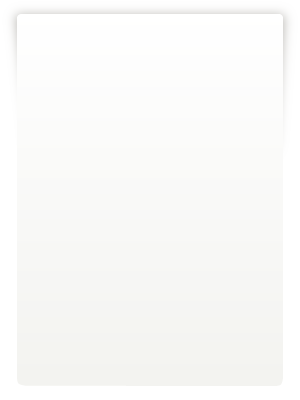
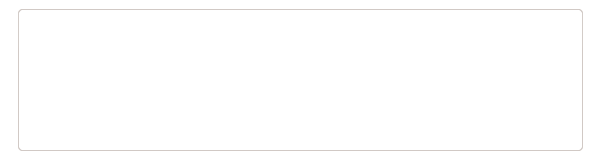
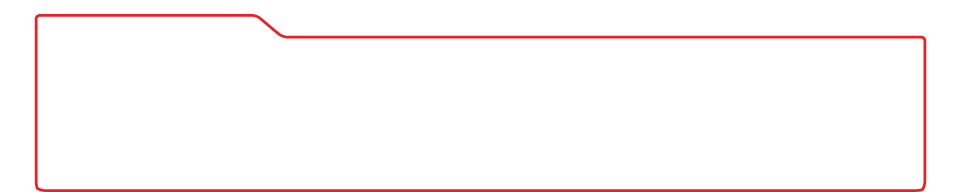
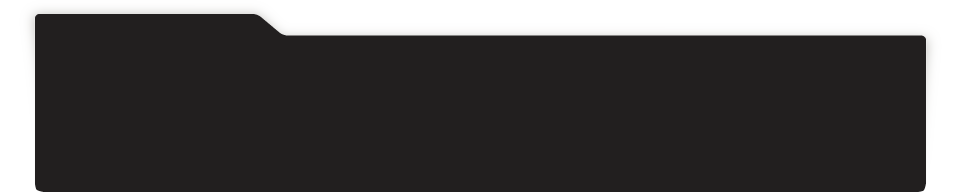
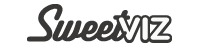
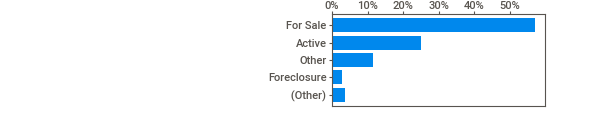
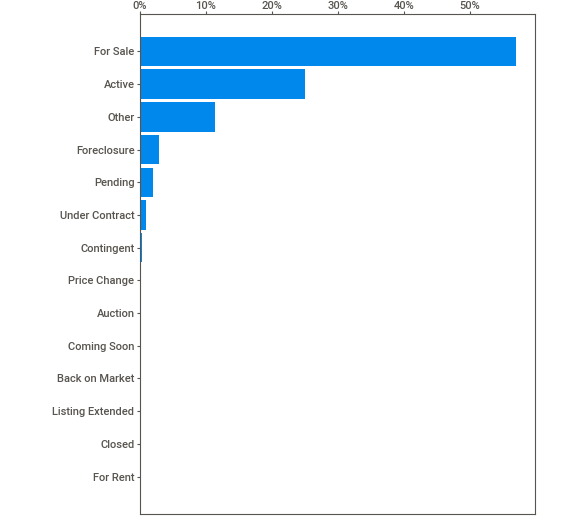
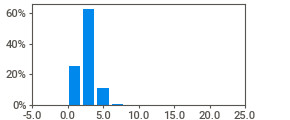
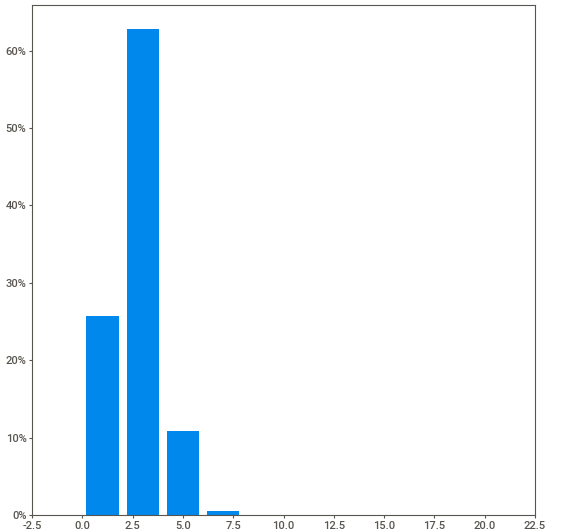
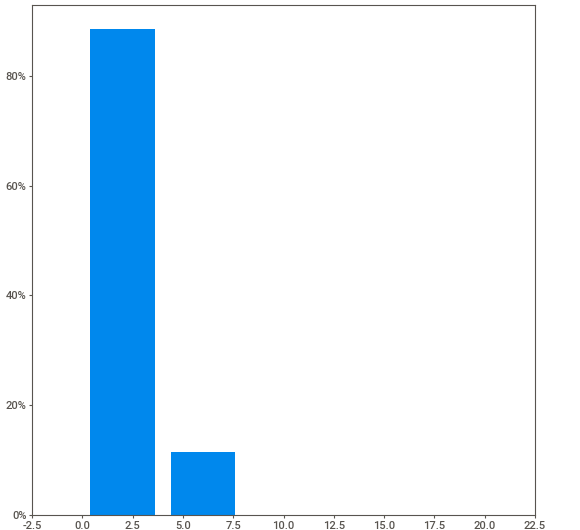
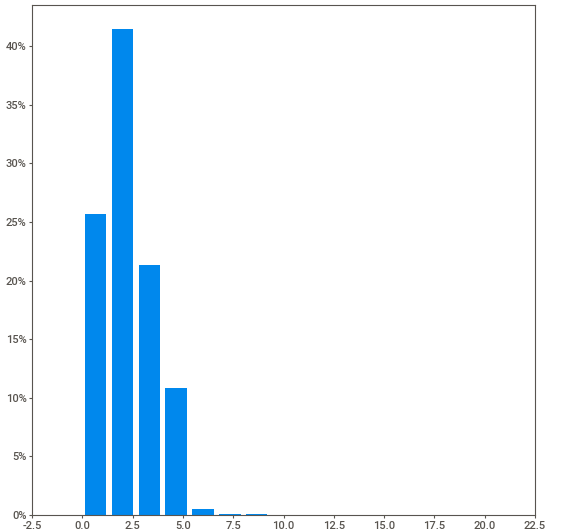
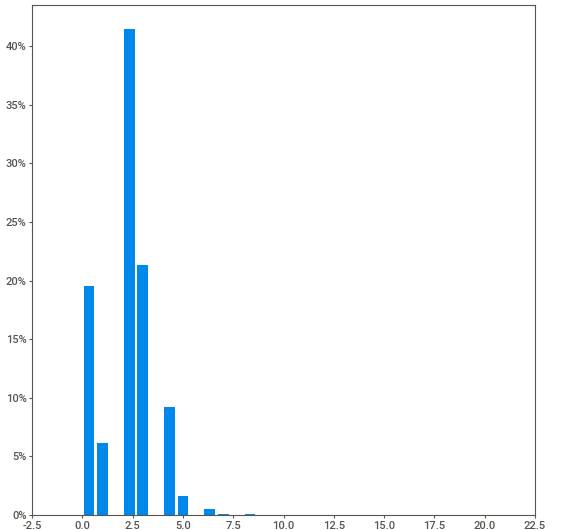
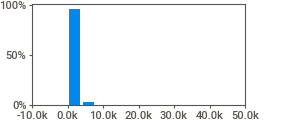
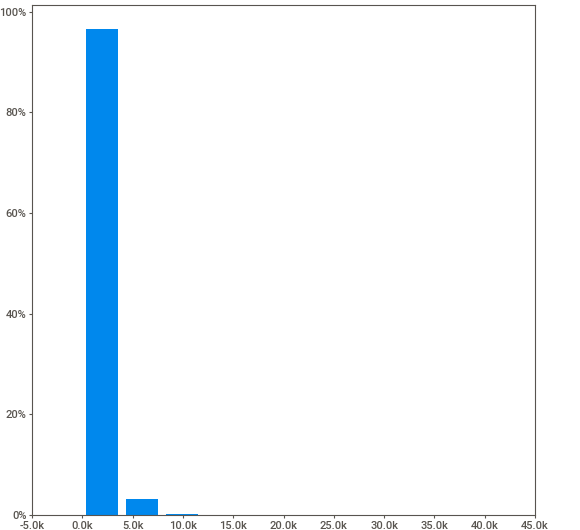
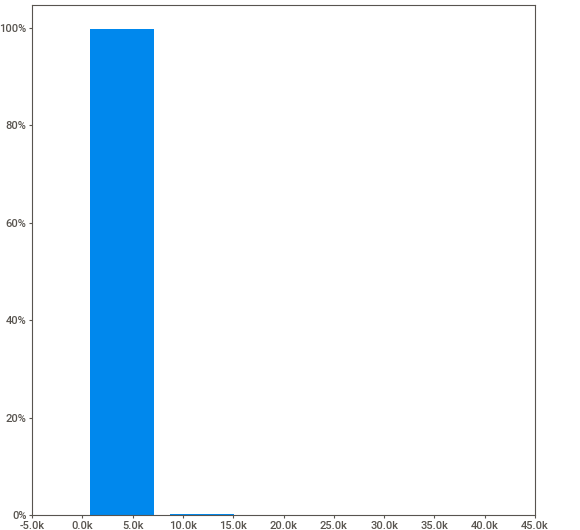
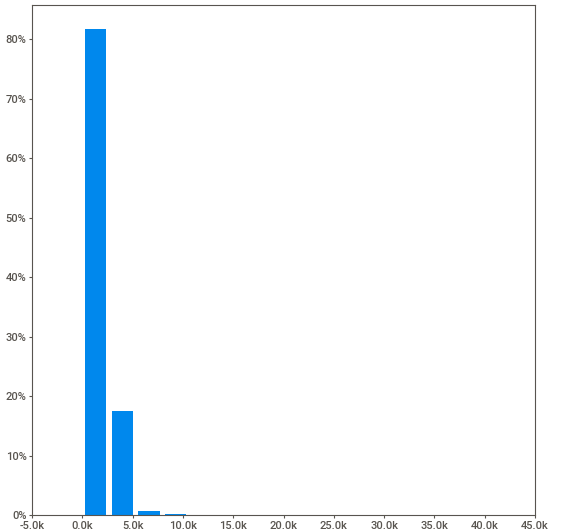
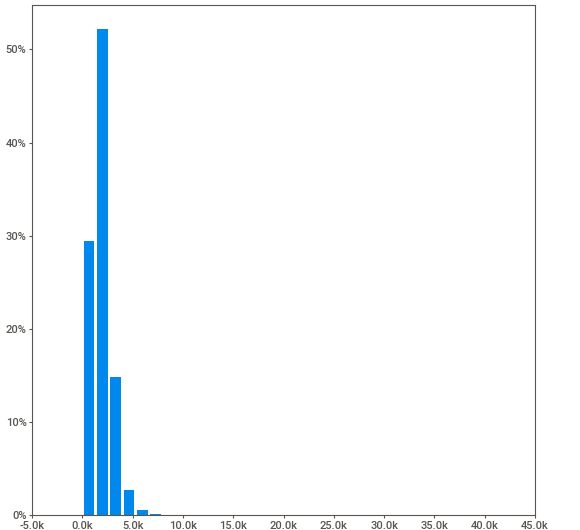
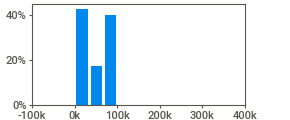
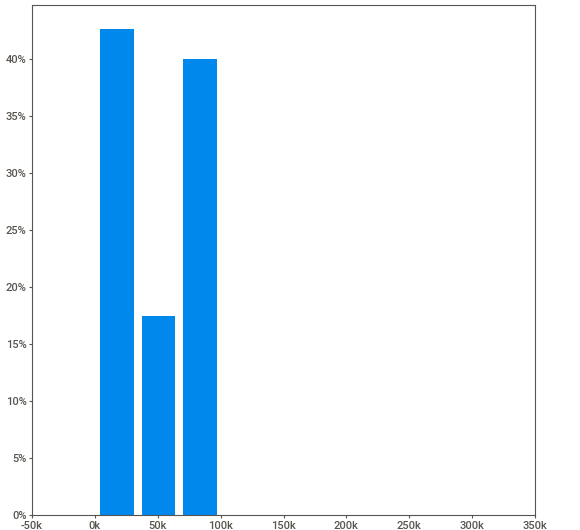
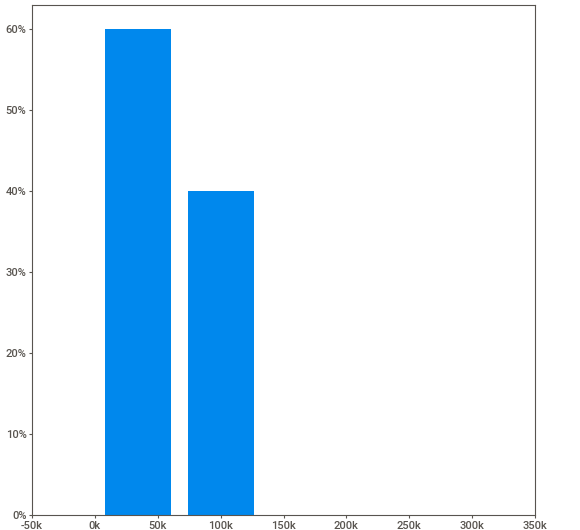
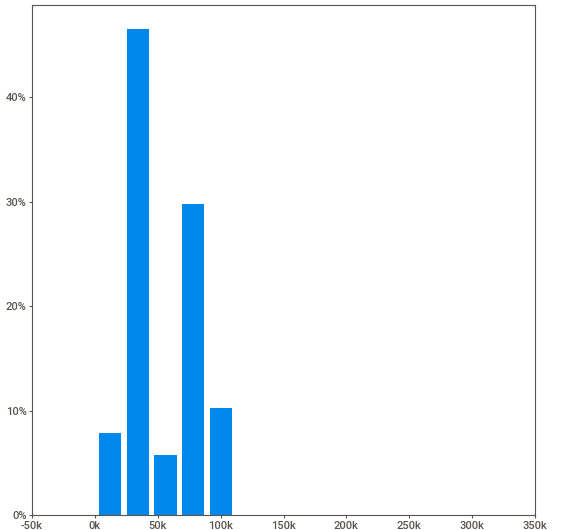
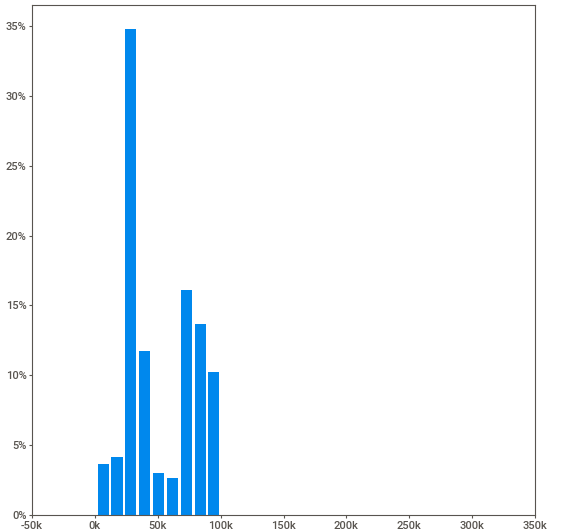
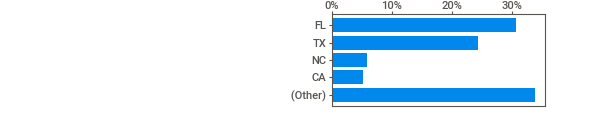
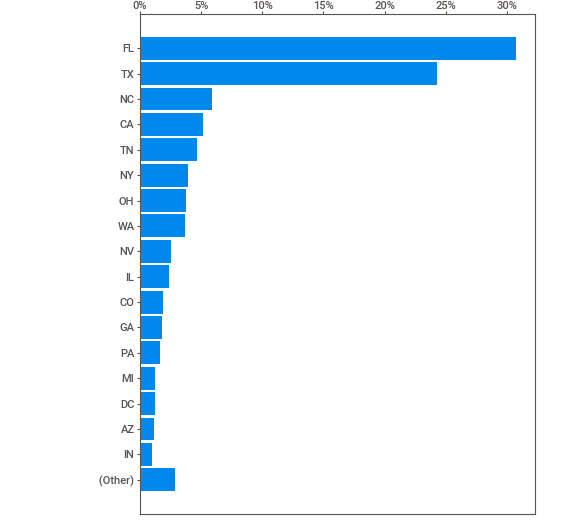
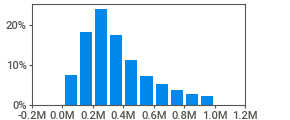
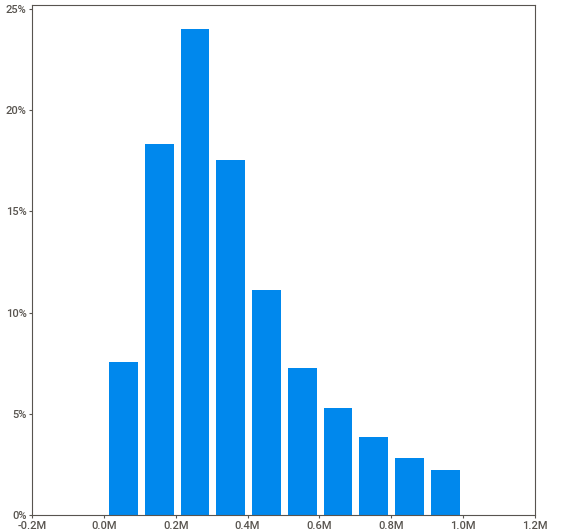
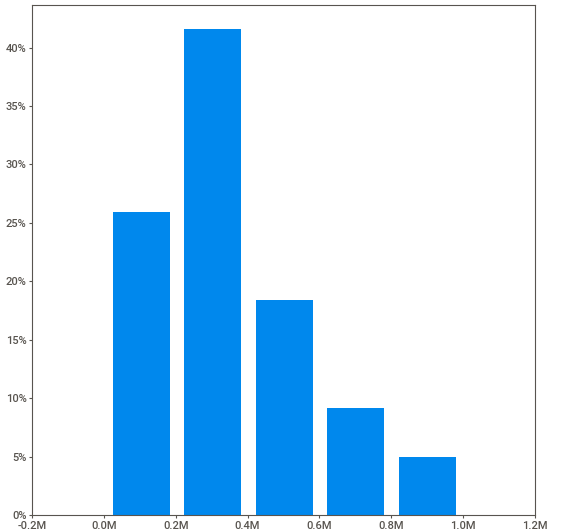
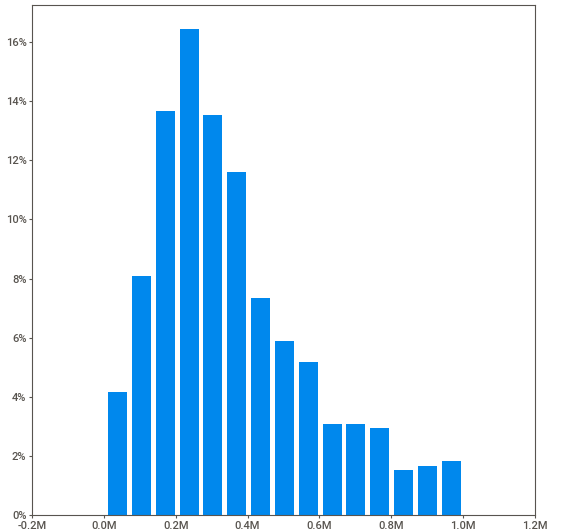
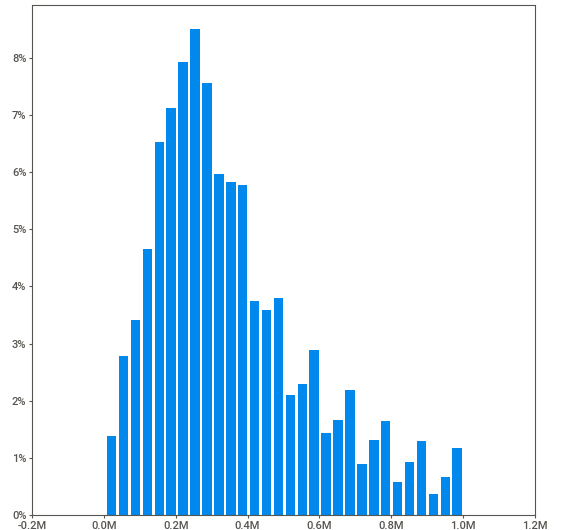
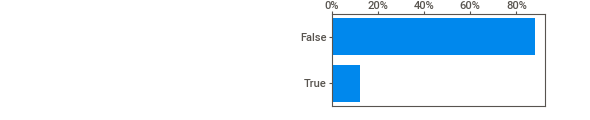
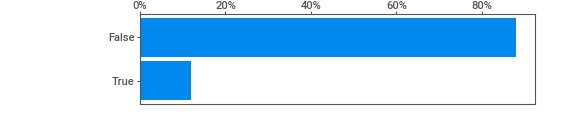
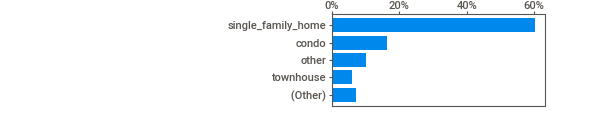
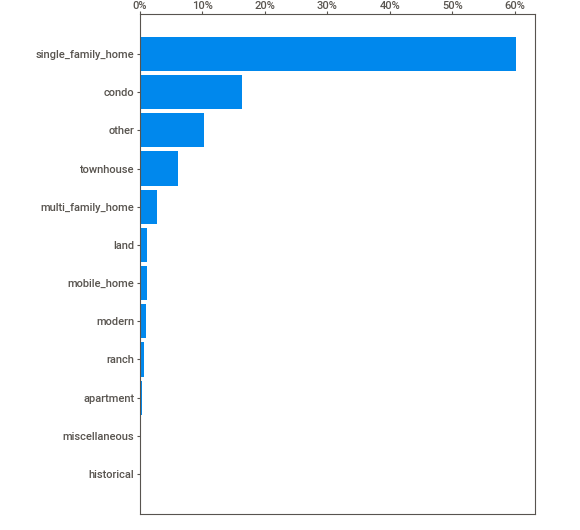
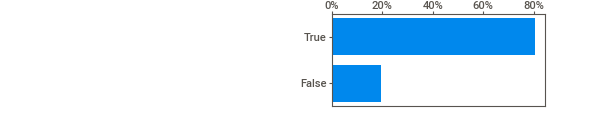
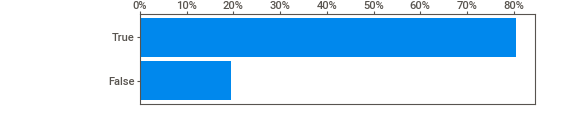
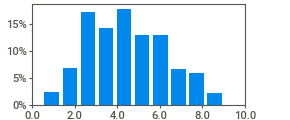
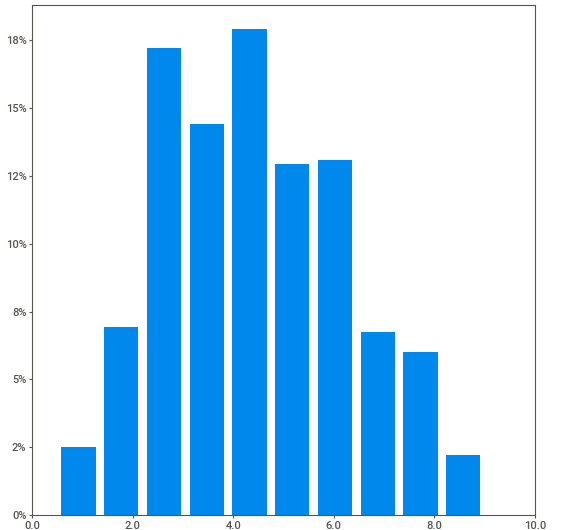
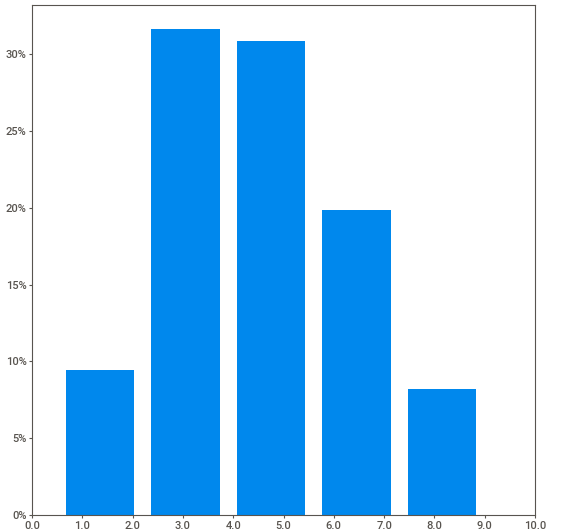
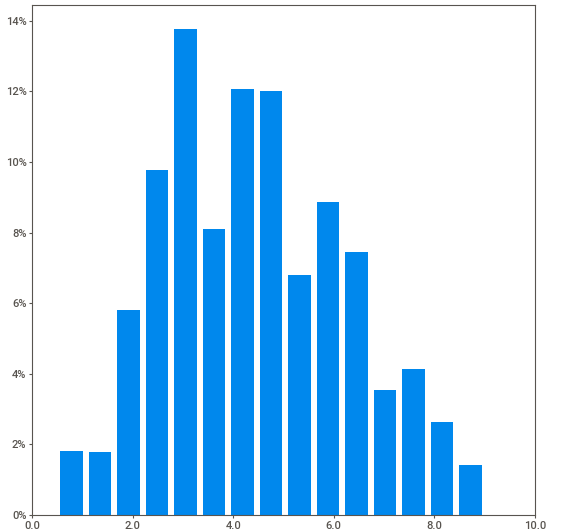
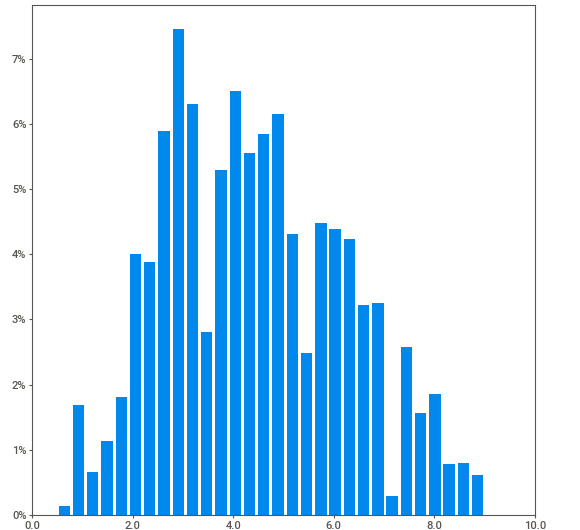
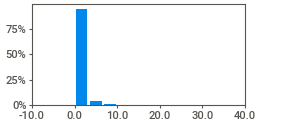
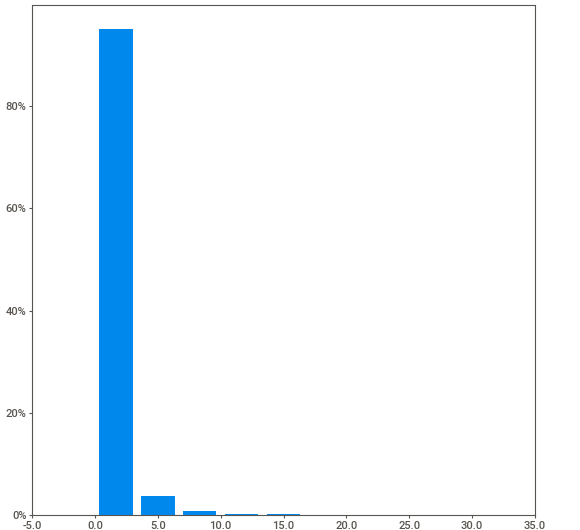
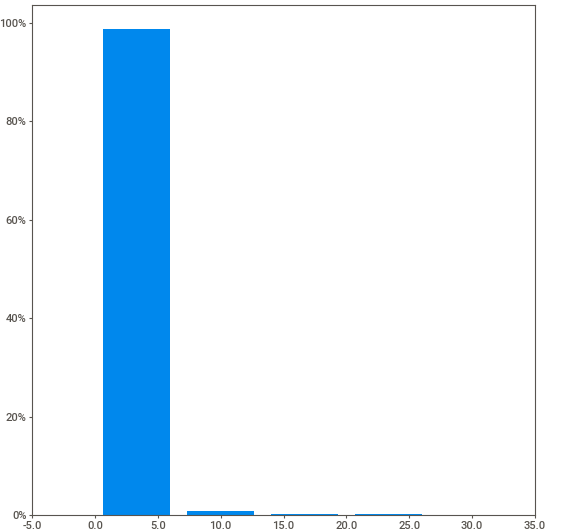
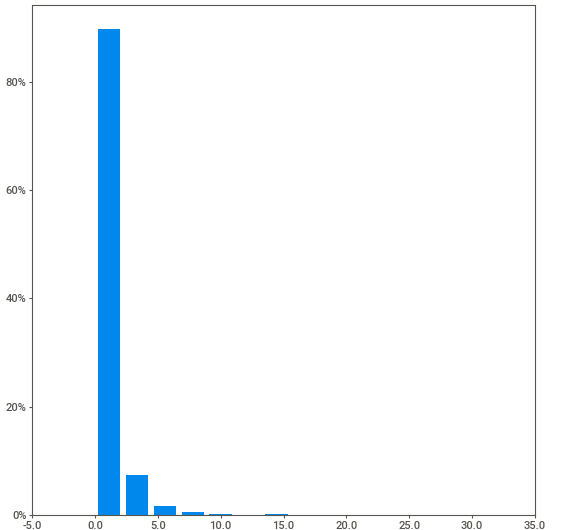
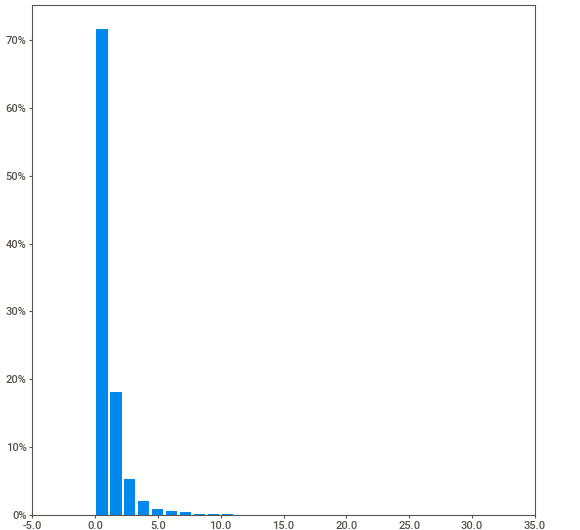
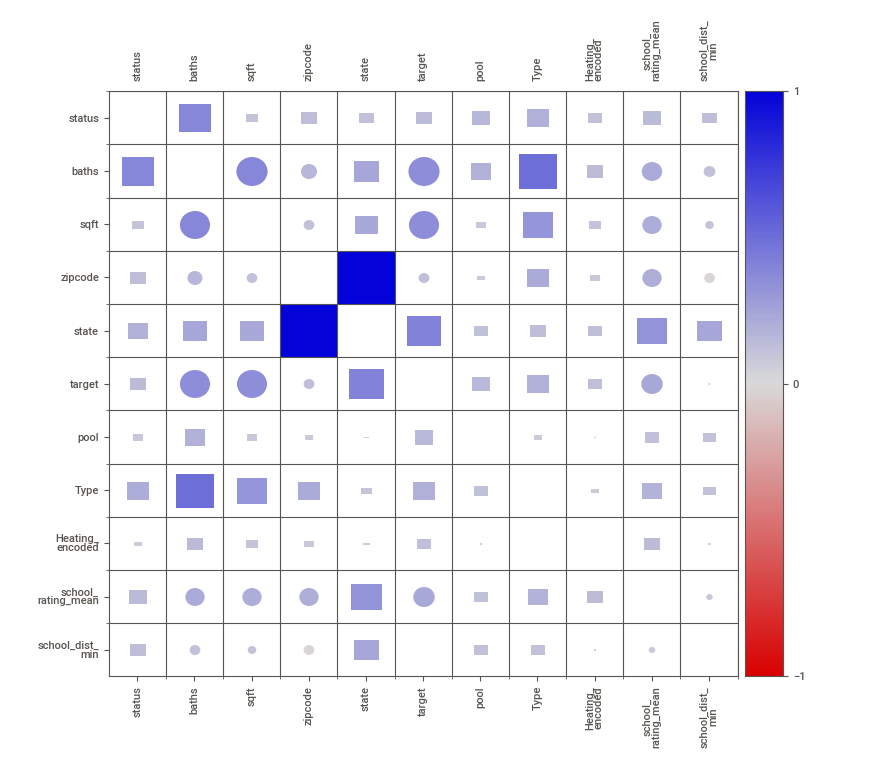
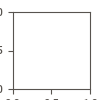

ERROR: comet_ml is installed, but not configured properly (e.g. check API key setup). HTML reports will not be uploaded.


In [557]:
report.show_html('report.html', open_browser=False)
report.show_notebook(h=3000, scale=0.95)


Теперь по отдельности очистим и преобразуем все признаки.

## Признак "status"

In [383]:
# Детальнее взглянем на данный признак
missing_values_count = df.status.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.status.nunique()}\n"
      f"Уникальные значения: {list(df.status.unique()[:10])}")
# Как мы видим у нас большое количество пропусков и большое количество уникальных значений.

Количество пропущенных значений: 39917
Процент пропущенных значений: 10.58%
Количество уникальных значений: 159
Уникальные значения: ['Active', 'for sale', nan, 'New construction', 'New', 'For sale', 'Pending', 'P', 'Active/Contingent', 'Pre-foreclosure / auction']


In [384]:
# Создадим категории из уникальных значений признака
categories = {
    "For Sale": ["for sale", "For sale", "New construction", "New"],
    "Active": [
        "Active", "A Active", "Active/Contingent", "Active Under Contract", "Active Option", "Auction - Active",
        "Active With Contingencies", "Active Option Contract", "Active Contingency", "Active Backup",
        "Active Contingent", "Active - Auction", "Active With Offer", "Active - Contingent", "Active with Contract",
        "Temporary Active", "Re Activated", "Reactivated"
    ],
    "Pending": [
        "P", "Pending", "pending", "P Pending Sale", "Pending Ab", "Pending Continue To Show",
        "Pending Inspection", "Pending Offer Approval", "Pending In", "Pending W/Insp Finance", "Pending Fe",
        "Pending W/Backup Wanted", "Pending Backups Wanted", "Pending With Contingencies", "Lease/Purchase Pending",
        "Pending Bring Backup", "Pending - Taking Backups", "Pending - Continue to Show",
        "Pending Taking Backups", "Offer Pending Signature", "Pending (Do Not Show)", "Pending W/ Cont.",
        "Pending W/Escape Clause", "Pending - Backup Offer Requested", "Pending Sale"
    ],
    "Contingent": [
        "Contingent", "Contingent Finance And Inspection", "Contingent Show",
        "Contingent Take Backup", "Contingent - Sale of Home", "Contingent Finance and Inspection",
        "C Continue Show", "Contingent   Show", "Contingent   Release", "Contingent   No Show",
        "CT Insp - Inspection Contingency", "Contingent   Foreclosure", "Conting Accpt Backups",
        "Contingent - Financing", "Contingency 48 Hr (+/ )", "Contingency Contract", "Contingent Escape"
    ],
    "Foreclosure": [
        "Pre-foreclosure", "Pre-foreclosure / auction", " / auction", "Foreclosed", "foreclosure", "Foreclosure"
    ],
    "Under Contract": [
        "Under Contract", "Under Contract   Showing", "Under Contract Backups", "Under Contract Show",
        "Under Contract - Show", "Under Contract - No Show", "Under contract", "U Under Contract",
        "Due Diligence Period", "Contract Contingent On Buyer Sale", "Contract P", "Ct", "Uc Continue To Show",
        "Under Contract Taking Back Up Offers", "Under Contract W/ Bckp", "Contract"
    ],
    "For Rent": ["for rent", "Apartment for rent", "Condo for rent"],
    "Auction": ["Auction"],
    "Recently Sold": ["recently sold"],
    "Price Change": ["Price Change"],
    "Back on Market": ["Back on Market", "Back On Market"],
    "Closed": ["Closed"],
    "Listing Extended": ["Listing Extended"],
    "Coming Soon": [
        "Coming soon: Nov 21.", "Coming soon: Dec 4.", "Coming soon: Nov 23.", "Coming soon: Nov 29.",
        "Coming soon: Dec 2.", "Coming soon: Dec 10.", "Coming soon: Dec 24.", "Coming soon: Nov 14.",
        "Coming soon: Nov 22.", "Coming soon: Oct 21.", "Coming soon: Dec 14.", "Coming soon: Oct 24.",
        "Coming soon: Dec 18.", "Coming soon: Dec 16.", "Coming soon: Dec 3.", "Coming soon: Dec 25.",
        "Coming soon: Nov 11.", "Coming soon: Nov 28.", "Coming soon: Nov 17.", "Coming soon: Dec 6.",
        "Coming soon: Nov 27.", "Coming soon: Nov 26.", "Coming soon: Dec 7.", "Coming soon: Dec 27.",
        "Coming soon: Dec 11.", "Coming soon: Dec 5.", "Coming soon: Nov 13.", "Coming soon: Nov 19.",
        "Coming soon: Nov 8.", "Coming soon: Oct 29.", "Coming soon: Dec 15.", "Coming soon: Oct 30.",
        "Coming soon: Dec 9.", "Coming soon: Dec 20.", "Coming soon: Dec 13.", "Coming soon: Dec 23.",
        "Coming soon: Nov 30.", "Coming soon: Dec 1.", "Coming soon: Nov 5.", "Coming soon: Nov 12.",
        "Coming soon: Nov 25.", "Coming soon: Nov 9."
    ],
}

In [385]:
# Нулевые значения признака и значения не попавшие в категории переименуем в "Other" 
def categorize_status(status_value):
    for category, values in categories.items():
        if status_value in values:
            return category
    return "Other"

# заменим значения на категории
df['status'] = df['status'].apply(categorize_status)


In [386]:
# выполним проверку
missing_values_count = df.status.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.status.nunique()}\n"
      f"Уникальные значения: {list(df.status.unique()[:10])}")
# Как мы видим у нас отсалось 15 уникальных значений и отсутствуют пропуски

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 15
Уникальные значения: ['Active', 'For Sale', 'Other', 'Pending', 'Foreclosure', 'Under Contract', 'For Rent', 'Auction', 'Contingent', 'Price Change']


## Признаки "private pool" и "PrivatePool"

In [387]:
# Детальнее взглянем на данный признак
missing_values_count = df['private pool'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df['private pool'].nunique()}\n"
      f"Уникальные значения: {list(df['private pool'].unique()[:10])}")


Количество пропущенных значений: 372954
Процент пропущенных значений: 98.89%
Количество уникальных значений: 1
Уникальные значения: [nan, 'Yes']


In [388]:
# Детальнее взглянем на данный признак
missing_values_count = df.PrivatePool.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.PrivatePool.nunique()}\n"
      f"Уникальные значения: {list(df.PrivatePool.unique()[:10])}")
# Как мы видим признаки "private pool" и "PrivatePool" содержат очень много пропусков.
# Для дальнейшей работы будем считать, что жилье имеет бассейн если он указан в одном из этих признаков.

Количество пропущенных значений: 336825
Процент пропущенных значений: 89.31%
Количество уникальных значений: 2
Уникальные значения: [nan, 'yes', 'Yes']


In [389]:
# Приведём значения в признаках к новому виду. 0 - нет бассейна, 1 - есть бассейн.  
df['PrivatePool' ] = df['PrivatePool' ].apply( lambda x: False if pd.isnull(x) else True)
df['private pool'] = df['private pool'].apply( lambda x: False if pd.isnull(x) else True)

# Создаём признак'pool'.
df['pool'] = df['PrivatePool'] + df['private pool']

# Удаляем признаки "private pool" и "PrivatePool".
df.drop(['PrivatePool','private pool'], axis = 1, inplace=True)

In [390]:
# Детальнее взглянем на признак pool
missing_values_count = df.pool.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.pool.nunique()}\n"
      f"Уникальные значения: {list(df.pool.unique()[:10])}")
# Как мы видим у нас отсалось 2 уникальных значений и отсутствуют пропуски. Данные не потеряны и перенесены в новый признак.

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 2
Уникальные значения: [False, True]


## Признак "propertyType"

In [391]:
# Детальнее взглянем на данный признак
missing_values_count = df.propertyType.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.propertyType.nunique()}\n"
      f"Уникальные значения: {list(df.propertyType.unique()[:10])}")
# У нас большое количество пропусков и слишком большое количество уникальных значений

Количество пропущенных значений: 34733
Процент пропущенных значений: 9.21%
Количество уникальных значений: 1280
Уникальные значения: ['Single Family Home', 'single-family home', 'lot/land', 'townhouse', 'Florida', nan, 'Single Family', 'coop', 'English', '2 Story']


In [392]:
# переведем все в строчные
df.propertyType = df.propertyType.str.lower()
# приведем разное написание к 1 виду а так же заменим yes и unknown на Other
df.propertyType = df.propertyType \
.str.replace('single-family home','single family') \
.str.replace('single family home','single family') \
.str.replace('yes','Other') \
.str.replace('unknown','Other')
# Создадим признак Type и запишем в него объединенные по 1 слову данные 
df['Type'] = df['propertyType'].str.split(',').str[0]

In [393]:
# Создадим синонимы из уникальных значений признака
synonyms_mapping = {
    'single_family_home': [
        'single family', '1 story', '2 story', 'detached', '1 story/ranch', '1 story traditional', 'single detached', 'singlefamilyresidence', 'single wide', 'single-wide mobile with land',
        'two story', 'one story', 'one level unit', 'rancher', '1 1/2 story', 'single wide mh', 'one story traditional'],
    'multi_family_home': [
        'multi-family', 'multi-family home', 'duplex', 'triplex', 'fourplex', 'multi_level', 'multi family', '2 unit condo', '2-story'],
    'condo': [
        'condo', 'coop', 'cooperative', 'condo/townhome/row home/co-op', 'condo/townhome', 'condominium', 'condo/unit', 'apartment/condo/townhouse', 'co-op', '2 story condo', 'high rise'],
    'townhouse': [
        'townhouse', 'townhome style', 'townhouse-interior', 'townhouse-end unit'],
    'apartment': [
        'apartment', 'condominium (single level)', 'high-rise', 'mid-rise', 'low-rise (1-3 stories)', 'Flats', 'studio'],
    'land': [
        'lot/land', 'land'],
    'mobile_home': [
        'mobile/manufactured', 'mobile / manufactured', 'manufactured house', 'mfd/mobile home', 'mobile home', 'manufactured home', 'manufactured double-wide', 'manufactured single-wide', 'mobile home 1 story', 'mobile manu - double wide'],
    'miscellaneous': [
        'miscellaneous'],
    'ranch': [
        'ranch', 'one story'],
    'modern': [
        'contemporary', 'contemporary/modern', "modern", 'mid-century modern', 'modern farmhouse', 'modernist'],
    'historical': [
        'historical', 'designated historical home', 'historical/conservation district', 'historic/older', 'historic vintage', 'historic'],
    'other': [
        'Other', 'english', 'urban contemporary', 'other style', 'florida', 'farms/ranches', 'carriage house', 'country english', 'straight thru', 'less than 4 floors', 'bungalow', 'custom', 'arts & crafts', 'tudor', 'new build 2019', 'split foyer', 'cottage', 'cottage/camp', 'garden home', 'farm/ranch', 'farm/ranch house', 'farm house', 'hi ranch', 'attached duplex', 'farmhouse', 'houseboat', 'ground floor', 'victorian', '3 story', '3+ stories', 'santa barbara/tuscan', 'old style', 'modular/prefab', 'post and beam', 'manuf/mobile', 'multiple occupancy', 'attached', 'hawaiian plantation', 'forest garden home', '1 1/2 story with basement', 'split-entry', 'texas hill country', 'lake house', '1 story with basement', 'hi-rise', 'coastal beach home', 'historical', 'key west/coastal', 'loft/balcony', 'english manor', 'mid-rise (4-7 stories)', 'mid-level', 'new englander', 'residential (<1 acre)', 'ranch','residential (1+ acre)', 'split', 'split level', 'split (4 level)', 'split (5+ level)', 'urban', 'patio', 'patio home', 'penthouse', 'manor', 'victorian/federal', 'coastal', 'coastal contemporary', 'coastal ii', 'coastal modern', 'coastal two story', 'mountain contemporary', 'key west', 'high ranch', 'end unit']
}

# Значения не попавшие в синонимы переименуем в "other"
def replace_synonyms(value):
    for key, synonym_values in synonyms_mapping.items():
        if value in synonym_values:
            return key
    return "other"

# Заменим синонимы
df['Type'] = df['Type'].apply(replace_synonyms)


In [394]:
# выполним проверку нового признака "Type"
missing_values_count = df.Type.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.Type.nunique()}\n"
      f"Уникальные значения: {list(df.Type.unique()[:10])}")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 12
Уникальные значения: ['single_family_home', 'land', 'townhouse', 'other', 'condo', 'multi_family_home', 'mobile_home', 'apartment', 'modern', 'miscellaneous']


In [395]:
# теперь propertyType можно удалить
df.drop('propertyType', axis=1, inplace=True)


## Признак "street"

In [396]:
# Детальнее взглянем на данный признак
missing_values_count = df.street.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.street.nunique()}\n"
      f"Уникальные значения: {list(df.street.unique()[:10])}")
# У нас практически нет пропусков и очень много уникальных значений, что для названия улиц не удивительно.
# С таким количеством уникальных значений сложно работать, но пока не будем удалять данный признак. 

Количество пропущенных значений: 2
Процент пропущенных значений: 0.00%
Количество уникальных значений: 337076
Уникальные значения: ['240 Heather Ln', '12911 E Heroy Ave', '2005 Westridge Rd', '4311 Livingston Ave', '1524 Kiscoe St', '1624 S Newkirk St', '552 Casanova Ct ', '6094 Mingle Dr ', '11182 Owl Ave', '8612 Cedar Plains Ln']


## Признак "baths"

In [397]:
# Детальнее взглянем на данный признак
missing_values_count = df.baths.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.baths.nunique()}\n"
      f"Уникальные значения: {list(df.baths.unique()[:30])}")
# Как мы видим значения значения заданы в произвольной форме. В идеале нам нужно их привести в числовую форму.

Количество пропущенных значений: 106308
Процент пропущенных значений: 28.19%
Количество уникальных значений: 229
Уникальные значения: ['3.5', '3 Baths', '2 Baths', '8 Baths', nan, '2', '3', 'Bathrooms: 2', '1,750', '4 Baths', '2 ba', 'Bathrooms: 5', '1,000', '7 Baths', '2.0', '3.0', 'Bathrooms: 1', '4.0', '2.1 Baths', '2.5 Baths', '1', 'Bathrooms: 3', '4.5', '6 Baths', 'Bathrooms: 4', '3 ba', '5', '2,500', '5.5 Baths', '1.0']


In [398]:
# Удаляем все буквы, пробелы и двоеточия
df.baths = df.baths.str.replace('[a-zA-Z:]','', regex=True)
# Удаляем все пробелы
df.baths = df.baths.str.replace(' ','', regex=True)
# Удаляем '~'
df.baths = df.baths.str.replace('~','', regex=True)

In [399]:
# Детальнее взглянем на данный признак
missing_values_count = df.baths.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.baths.nunique()}\n"
      f"Уникальные значения: {list(df.baths.unique()[:30])}")
# Данные уже выделят более единообразно.

Количество пропущенных значений: 106308
Процент пропущенных значений: 28.19%
Количество уникальных значений: 147
Уникальные значения: ['3.5', '3', '2', '8', nan, '1,750', '4', '5', '1,000', '7', '2.0', '3.0', '1', '4.0', '2.1', '2.5', '4.5', '6', '2,500', '5.5', '1.0', '1.5', '', '4,000', '2,000', '3,000', '8.0', '0', '5.0', '1,500']


In [400]:
# преобразуем значения
df['baths'] = df['baths'].str.replace('[a-zA-Z+:]','', regex=True)
df['baths'].replace(['nan','', '~', '..', '--', '—','0.0','0.00','0/0'], 0, inplace=True)
df['baths'].replace(['1-2','1/1-0/1-0/1-0', '1/1/1/1','1-0/1-0/1', ], 1, inplace=True)
df['baths'].replace(['2-1/2-1/1-1/1-1','3-1/2-2',], 2, inplace=True)
df['baths'].replace(['116/116/116'], 116, inplace=True)
df['baths'].replace(['7,500'], 7.5, inplace=True)
df['baths'].replace(['5,000'], 5, inplace=True)
df['baths'].replace(['3,500'], 3.5, inplace=True)
df['baths'].replace(['2,750'], 2.75, inplace=True)
df['baths'].replace(['2,250'], 2.25, inplace=True)
df['baths'].replace(['1,250'], 1.25, inplace=True)
df['baths'].replace(['1,500'], 1.5, inplace=True)
df['baths'].replace(['4,000'], 4, inplace=True)
df['baths'].replace(['2,000'], 2, inplace=True)
df['baths'].replace(['3,000'], 3, inplace=True)
df['baths'].replace(['2,500'], 2.5, inplace=True)
df['baths'].replace(['1,000'], 1, inplace=True)
df['baths'].replace(['1,750'], 1.75, inplace=True)
df['baths'] = df['baths'].fillna(0)

# переведем в числовой признак и округлим до целого числа
df['baths'] = df['baths'].astype(float).round()

In [401]:
# Детальнее еще раз взглянем на данный признак
missing_values_count = df.baths.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.baths.nunique()}\n"
      f"Уникальные значения: {list(df.baths.unique()[:10])}")
# Теперь значения представлены в более приемлимой для нас форме 

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 49
Уникальные значения: [4.0, 3.0, 2.0, 8.0, 0.0, 5.0, 1.0, 7.0, 6.0, 9.0]


## Признак "homeFacts"

In [402]:
# Детальнее взглянем на данный признак
missing_values_count = df.homeFacts.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
f"Количество уникальных значений: {df.homeFacts.nunique()}\n"
f"Уникальные значения: {list(df.homeFacts.unique()[:10])}")
# Как мы видим отсутствуют пропуски, что не может не радовать.
# При этом можно заметить, что данные представлены в формате 'factValue', 'factLabel' (значение и метка)
# Попробуем с помощью регулярных выражений разделить данные и создать новые признаки (столбцы) на основе признака 'factValue'

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 321009
Уникальные значения: ["{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': 'Central A/C, Heat Pump', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': None, 'factLabel': 'lotsize'}, {'factValue': '$144', 'factLabel': 'Price/sqft'}]}", "{'atAGlanceFacts': [{'factValue': '2019', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '5828 sqft', 'factLabel': 'lotsize'}, {'factValue': '$159/sqft', 'factLabel': 'Price/sqft'}]}", "{'atAGlanceFacts': [{'factValue': '1961', 'factLabel': 'Year built'}, {'factValue': '1967', 'factLabel': 'Remodeled year'}, {'factValue':

In [403]:
label = df.homeFacts.str.findall(r"\bfactLabel': ([\s\S]+?)[}\b]")
label[10]

["'Year built'",
 "'Remodeled year'",
 "'Heating'",
 "'Cooling'",
 "'Parking'",
 "'lotsize'",
 "'Price/sqft'"]

In [404]:
# создадим список названий признаков, удалив лишние кавычки
list_label = ','.join(label[0]).replace("'","").split(',')
list_label

['Year built',
 'Remodeled year',
 'Heating',
 'Cooling',
 'Parking',
 'lotsize',
 'Price/sqft']

In [405]:
Value = df.homeFacts.str.findall(r"\bfactValue': ([\s\S]+?), 'factLabel\b")
Value[10]

["'1965'",
 "''",
 "''",
 "''",
 "'Attached Garage'",
 "'1.73 acres'",
 "'$515/sqft'"]

In [406]:
# Создадим признаки и заполним значениями
for i, val in enumerate(list_label):
    df[val]=Value.apply(lambda x: x[i])

In [407]:
df.info() 
# у нас получилось 7 новых признаков, каждый из которых нам предстоит обработать

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377135 entries, 0 to 377134
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          377135 non-null  object 
 1   street          377133 non-null  object 
 2   baths           377135 non-null  float64
 3   homeFacts       377135 non-null  object 
 4   fireplace       103112 non-null  object 
 5   city            377101 non-null  object 
 6   schools         377135 non-null  object 
 7   sqft            336585 non-null  object 
 8   zipcode         377135 non-null  object 
 9   beds            285881 non-null  object 
 10  state           377135 non-null  object 
 11  stories         226462 non-null  object 
 12  mls-id          24942 non-null   object 
 13  MlsId           310266 non-null  object 
 14  target          374655 non-null  object 
 15  pool            377135 non-null  bool   
 16  Type            377135 non-null  object 
 17  Year built

In [408]:
# Удалеяем ненужный признак homeFacts
df = df.drop('homeFacts', axis=1)

## Признак "Year built"

In [409]:
# Детальнее взглянем на данный признак
missing_values_count = df['Year built'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df['Year built'].nunique()}\n"
      f"Уникальные значения: {list(df['Year built'].unique()[:30])}")
# Попробуем избавится от опечаток и сократить количество уникальных значений 


Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 231
Уникальные значения: ["'2019'", "'1961'", "'2006'", "''", "'1920'", "'1976'", "'1970'", "'1965'", "'2015'", "'1996'", "'1982'", "'1905'", "'2008'", "'1899'", "'2016'", "'1954'", "'1989'", "'2014'", "'1915'", "'1994'", "'1910'", "'1923'", "'1960'", "'1977'", "'1972'", "'1963'", "'1981'", "'1949'", "'1930'", "'1991'"]


In [410]:
#Удалим лишние кавычки
df['Year built'] = df['Year built'].str.replace("'",'', regex=True)
# Заменим ковычки на no date
df['Year built'] = df['Year built'].str.replace('^\s*$','no date', regex=True)
# Заменим некорректные значения на no date
mask= df['Year built'].isin(['1','1208','559990649990','2025','No Data','None'])
df.loc[mask,'Year built'] = 'no date'
# Поправим опечатки
df.loc[df['Year built']=='1019','Year built'] = '1919'
df.loc[df['Year built']=='1057','Year built'] = '1957'
df.loc[df['Year built']=='1060','Year built'] = '1960'

In [411]:
# Еще раз взглянем на данный признак
missing_values_count = df['Year built'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df['Year built'].nunique()}\n"
      f"Уникальные значения: {list(df['Year built'].unique()[:30])}")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 222
Уникальные значения: ['2019', '1961', '2006', 'no date', '1920', '1976', '1970', '1965', '2015', '1996', '1982', '1905', '2008', '1899', '2016', '1954', '1989', '2014', '1915', '1994', '1910', '1923', '1960', '1977', '1972', '1963', '1981', '1949', '1930', '1991']


## Признак "Remodeled year"

In [412]:
# Детальнее взглянем на данный признак
missing_values_count = df['Remodeled year'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df['Remodeled year'].nunique()}\n"
      f"Уникальные значения: {list(df['Remodeled year'].unique()[:30])}")
# Появляются подозрения, что данный признак для нас может оказаться неинформативным

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 155
Уникальные значения: ["''", "'1967'", "'2006'", 'None', "'2015'", "'1997'", "'2019'", "'1982'", "'1905'", "'2009'", "'2007'", "'1996'", "'1995'", "'1988'", "'1972'", "'1949'", "'1954'", "'1930'", "'2003'", "'2000'", "'1994'", "'2005'", "'1983'", "'1965'", "'1968'", "'1993'", "'1999'", "'2014'", "'2008'", "'2010'"]


Принимаю решение воспользоваться на данном этапе библиотекой ydata_profiling. Она позволит быстрее проанализировать данные в получившихся у нас признаках.

## Анализ признаков с помощью ydata_profiling

In [413]:
# Воспользуемся библиотекой ydata_profiling. Это позволит нам эффективнее работать с признаками в наших данных.
profile = ydata_profiling.ProfileReport(df, title="Profiling Report")
profile.to_notebook_iframe()
profile.to_file("C:/DS/IDE/Diplom/data_report.html") # экспортируем отчет в файл, это позволит более удобно работать с ним C:\DS\IDE\Diplom

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Проанализировав с помощью получившегося отчета признак "Remodeled year" мы видим около 60% пропусков. Данный признак говорит нам о годе реконструкции. 
Можно предположить, что 60% объектов не реконструировалось, но такое предположение слишком опасно при таком количестве пропусков. Проще удалить данный признак.

In [414]:
# удалим признак 'Remodeled year'
df = df.drop('Remodeled year', axis=1)

Проанализировав с помощью получившегося отчета признак "Heating" мы видим около 30% пропусков. Остальные данные содержат информацию о типе отопления (электрическое, газовое, центральное и пр.)
Тип отопления может влиять на размер комунальных платежей и стоимость объекта, но не существенно. Ключевым фактором тут выступает наличие или отсутствие отопления.
Можно преобразить даннные в бинарные переменные, 1 - есть отопление, 0 - нет отопления.

In [415]:
# удалим лишние ковычки
df['Heating'] = df['Heating'].str.replace("'",'', regex=True)
df['Heating_encoded'] = df['Heating'].apply(lambda x: True if x not in ['', 'no data', 'None', 'none'] else False)
# удалим признак 'Heating'
df = df.drop('Heating', axis=1)

In [416]:
# Проверим наш новый признак 'Heating_encoded'
missing_values_count = df['Heating_encoded'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df['Heating_encoded'].nunique()}\n"
      f"Уникальные значения: {list(df['Heating_encoded'].unique()[:30])}")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 2
Уникальные значения: [True, False]


Проанализировав с помощью получившегося отчета признак "Cooling" мы видим более 40% пропусков. Данный признак говорит нам о наличии систем охлаждения. 
При этом более чем в 40% случаев имеется централизованная система охлаждения. Можно преобразить данные в бинарные переменные 1 - есть центральная система охлаждения, 0 - нет.
Но это будет слишком большим допушением, так как количество пропусков велико и субъективно система охлаждения менее значима, чем система отопления, ее чаше могут просто не указывать.
Поэтому примем решение удалить признак "Cooling".

In [417]:
# удалим признак 'Cooling'
df= df.drop('Cooling', axis=1)

Проанализировав с помощью получившегося отчета признак "Parking" мы видим около 50% пропусков. Данный признак говорит нам о наличии парковки. 
Можно преобразить данные в бинарные переменные 1 - есть парковка, 0 - нет.
Но также как и с предыдущем признаком это будет слишком большим допушением, так как количество пропусков слишком велико.
Поэтому примем решение удалить признак "Parking".

In [418]:
# удалим признак 'Parking'
df= df.drop('Parking', axis=1)

Проанализировав с помощью получившегося отчета признак "lotsize" мы видим около 50% пропусков. Данный признак говорит о размере участка земли, на котором находится недвижимость.
Преобразовать пропуски в бинарные не получится, так как занчения тут измеряются в акрах.
Поэтому примем решение удалить признак "lotsize".

In [419]:
# удалим признак 'lotsize'
df= df.drop('lotsize', axis=1)

Проанализировав с помощью получившегося отчета признак "Price/sqft" мы видим около 20% пропусков. Данный признак говорит о цене квадратного фута от объекта недвижимости.
Данный признак является производным и зависимым от нашего целевого признака. Если мы его отсавим, то произойдет утечка данных.
Признак "Price/sqft" отправляется на одназначное удаление.

In [420]:
# удалим признак 'Price/sqft'
df= df.drop('Price/sqft', axis=1)

Проанализировав с помощью получившегося отчета признак "fireplace" мы видим больше половины пропусков. Данный признак говорит о наличии камина.
Количество пропусков слишком велико. Поэтому примем решение удалить признак "fireplace".

In [421]:
# удалим признак 'fireplace'
df= df.drop('fireplace', axis=1)

Проанализировав признак "beds" мы видим, что четверь данных пропушена. Данный признак говорит о количестве спален.
К сожалению, часть строк заполнена текстом, часть колличеством спален, а часть площадью.
Прийдется удалить этот признак.

In [422]:
# удалим признак 'beds'
df= df.drop('beds', axis=1)

Проанализировав признак "state" мы видим, что нет пропушенных данных, всего 39 значений. Данный признак говорит о принадлежности к штату.
С данным признаком все отлично, он не требует ни приобразований, ни удалений.

In [423]:
missing_values_count = df['state'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df['state'].nunique()}\n"
      f"Уникальные значения: {list(df['state'].unique()[:39])}")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 39
Уникальные значения: ['NC', 'WA', 'CA', 'TX', 'FL', 'PA', 'TN', 'IA', 'NY', 'OR', 'DC', 'NV', 'AZ', 'GA', 'IL', 'NJ', 'MA', 'OH', 'IN', 'UT', 'MI', 'VT', 'MD', 'CO', 'VA', 'KY', 'MO', 'WI', 'ME', 'MS', 'OK', 'SC', 'MT', 'DE', 'Fl', 'BA', 'AL', 'OT', 'OS']


Обратим внимание на признаки "mls-id" и "MlsId". Это коды в централизованной системе учёта предложений объектов недвижимости
Так как с ценой объекта эти признаки не коррелируют, их можно смело удалять.

In [424]:
# удалим признак 'mls-id' и 'MlsId'
df= df.drop('mls-id', axis=1)
df= df.drop('MlsId', axis=1)

Проанализировав с помощью получившегося отчета признак "stories" мы видим около 40% пропусков. Данный признак рассказывает нам про этажность.
Преобразовать пропуски в бинарные не получится, так как занчения тут измеряются в числах.
Поэтому примем решение удалить признак "stories".

In [425]:
missing_values_count = df['stories'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
f"Количество уникальных значений: {df['stories'].nunique()}\n"
f"Уникальные значения: {list(df['stories'].sort_values().unique()[:10])}")

Количество пропущенных значений: 150673
Процент пропущенных значений: 39.95%
Количество уникальных значений: 348
Уникальные значения: [', 1', ', 2', ', 3', '0', '0.0', '1', '1 1/2 Levels', '1 1/2 Story', '1 Level', '1 Level, 1.5 Level']


In [426]:
# удалим признак 'stories'
df= df.drop('stories', axis=1)

## Признак "city"

In [427]:
# Детальнее взглянем на данный признак
missing_values_count = df.city.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.city.nunique()}\n"
      f"Уникальные значения: {list(df.city.unique()[:30])}")
# Пропусков немного. Нам нужно их удалить.

Количество пропущенных значений: 34
Процент пропущенных значений: 0.01%
Количество уникальных значений: 2026
Уникальные значения: ['Southern Pines', 'Spokane Valley', 'Los Angeles', 'Dallas', 'Palm Bay', 'Philadelphia', 'POINCIANA', 'Memphis', 'Mason City', 'Houston', 'Flushing', 'Pembroke Pines', 'Eugene', 'Brooklyn', 'Fort Lauderdale', 'New York', 'Tomball', 'Palmdale', 'Bend', 'Miami Beach', 'Spring', 'Killeen', 'Washington', 'Miami', 'Davie', 'Tampa', 'Pt Saint Lucie', 'North Miami Beach', 'Jacksonville', 'Charlotte']


In [428]:
# Удалим приставку Сity в названии городов
df['city'] = df['city'].str.replace(' City', '') 

#сохраняем исходное количество строк
initial_row_count = df.shape[0]

#удаляем строки, содержащие ' ', '--' или NaN в столбце 'city'
df = df[~df['city'].isin([' ', '--', np.nan])]

#подсчитываем количество удаленных строк
removed_row_count = initial_row_count - df.shape[0]

print(f"Количество удаленных строк: {removed_row_count}")

Количество удаленных строк: 68


In [429]:
# Еще раз взглянем на данный признак
missing_values_count = df.city.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.city.nunique()}\n"
      f"Уникальные значения: {list(df.city.unique()[:30])}")
# Теперь все отлично

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 2014
Уникальные значения: ['Southern Pines', 'Spokane Valley', 'Los Angeles', 'Dallas', 'Palm Bay', 'Philadelphia', 'POINCIANA', 'Memphis', 'Mason', 'Houston', 'Flushing', 'Pembroke Pines', 'Eugene', 'Brooklyn', 'Fort Lauderdale', 'New York', 'Tomball', 'Palmdale', 'Bend', 'Miami Beach', 'Spring', 'Killeen', 'Washington', 'Miami', 'Davie', 'Tampa', 'Pt Saint Lucie', 'North Miami Beach', 'Jacksonville', 'Charlotte']


## Признак "schools"

In [430]:
# Детальнее взглянем на данный признак
missing_values_count = df.schools.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.schools.nunique()}\n"
      f"Уникальные значения: {list(df.schools.unique()[:10])}")
# Пропусков нет. Много уникальных значений

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 297341
Уникальные значения: ['[{\'rating\': [\'4\', \'4\', \'7\', \'NR\', \'4\', \'7\', \'NR\', \'NR\'], \'data\': {\'Distance\': [\'2.7 mi\', \'3.6 mi\', \'5.1 mi\', \'4.0 mi\', \'10.5 mi\', \'12.6 mi\', \'2.7 mi\', \'3.1 mi\'], \'Grades\': [\'3–5\', \'6–8\', \'9–12\', \'PK–2\', \'6–8\', \'9–12\', \'PK–5\', \'K–12\']}, \'name\': [\'Southern Pines Elementary School\', \'Southern Middle School\', \'Pinecrest High School\', \'Southern Pines Primary School\', "Crain\'s Creek Middle School", \'Union Pines High School\', \'Episcopal Day Private School\', \'Calvary Christian Private School\']}]', "[{'rating': ['4/10', 'None/10', '4/10'], 'data': {'Distance': ['1.65mi', '1.32mi', '1.01mi'], 'Grades': ['9-12', '3-8', 'PK-8']}, 'name': ['East Valley High School&Extension', 'Eastvalley Middle School', 'Trentwood Elementary School']}]", "[{'rating': ['8/10', '4/10', '8/10'], 'data': {'Distance':

В признаке содержится различная информация о школе. Нам в первую очередь интересно будет среднее растояние до школы а так же средний рейтинг школы, так как они могут повлиять на стоимость обектов недвижимости. Таким образом мы можем получить 2 новых признака.

In [431]:
# Рассчитаем средний рейтинг
def process_rating(rating):
    rating = rating[0].replace('/10', '')
    extracted_numbers = [float(num) for num in rating if num.isdigit()]
    average_rating = np.average(extracted_numbers) if extracted_numbers else -1
    return round(average_rating, 1)

s_rating = (
    df.schools.str.findall(r"\brating': ([\s\S]+?), 'data\b")
    .apply(lambda x: process_rating(x))
)

# Создадим признак school_rating_mean в нашем наборе данных. Пропуски заполним -1 
df['school_rating_mean'] = s_rating

In [432]:
#Расчитаем минимальную дистанцию
s_distance = df.schools.str.findall(r"\bDistance': ([\s\S]+?), 'Grades\b") 
# Извлечение расстояний до школ из каждой строки
s_distance = s_distance.apply(lambda x: x[0]) 
# Получение первого найденного значения списков, полученных в результате предыдущего шага
s_distance = s_distance.str.replace('[a-zA-Z]','', regex=True) 
# Удаление всех символов алфавита из расстояний
s_distance = s_distance.str.findall(r'\b([0-9]+.[0-9]+)') 
# Извлечение чисел виде Точноечисло, включая десятичные значения
s_distance = s_distance.apply(lambda x: [float(i) for i in x]) 
# Конвертирование каждого числового значения списка в тип float
school_dist_min = s_distance.apply(lambda x: -1 if len(x)==0 else min(x)) 
# Нахождение минимального значения в каждом списке s_distance, и возвращение -1, если длина списка равна 0

#Создадим признак school_dist_min в нашем наборе данных. Пропуски заполним -1
df['school_dist_min'] = school_dist_min

In [433]:
# удалим признак schools
df.drop('schools', axis=1, inplace=True)

Взглянем на получившиеся у нас 2 новых признака:

In [434]:
missing_values_count = df['school_rating_mean'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
f"Количество уникальных значений: {df['school_rating_mean'].nunique()}\n"
f"Уникальные значения: {list(df['school_rating_mean'].sort_values().unique()[:10])}")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 80
Уникальные значения: [-1.0, 0.5, 0.7, 1.0, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7]


In [435]:
missing_values_count = df['school_dist_min'].isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
f"Количество уникальных значений: {df['school_dist_min'].nunique()}\n"
f"Уникальные значения: {list(df['school_dist_min'].sort_values().unique()[:10])}")

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 1541
Уникальные значения: [-1.0, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08]


## Признак "sqft"

In [436]:
# Детальнее взглянем на данный признак
missing_values_count = df.sqft.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.sqft.nunique()}\n"
      f"Уникальные значения: {list(df.sqft.unique()[:10])}")
# Есть пропуски. Данные необходимо привести к числовым значениям.

Количество пропущенных значений: 40531
Процент пропущенных значений: 10.75%
Количество уникальных значений: 25396
Уникальные значения: ['2900', '1,947 sqft', '3,000 sqft', '6,457 sqft', nan, '897 sqft', '1,507', '3588', '1,930', '1,300 sqft']


In [437]:
s_sqft = df.sqft[df.sqft.notna()]
s_sqft = s_sqft.str.findall(r"\d+")
s_sqft = s_sqft.apply(lambda x: ''.join(x))
df.loc[df.sqft.notna(), 'sqft']=s_sqft
# Заменим пропуски на "0"
df.sqft = df.sqft.fillna(0)
# Также есть пустые строки вместо значения. Заменим их тоже на "0"
df.loc[df.sqft=='','sqft']=0
df.sqft = df.sqft.astype(int)

In [438]:
# Взглянем еще раз на этот признак
missing_values_count = df.sqft.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.sqft.nunique()}\n"
      f"Уникальные значения: {list(df.sqft.unique()[:10])}")
# Теперь все хорошо

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 9890
Уникальные значения: [2900, 1947, 3000, 6457, 0, 897, 1507, 3588, 1930, 1300]


## Признак "zipcode"

In [439]:
# Детальнее взглянем на данный признак
missing_values_count = df.zipcode.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.zipcode.nunique()}\n"
      f"Уникальные значения: {list(df.zipcode.sort_values().unique()[:10])}")
# Пропусков нет, но есть некорректные значения '--', '0', '00000', нам нужно от них избавится

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 4549
Уникальные значения: ['--', '0', '00000', '02108', '02109', '02110', '02111', '02113', '02114', '02115']


In [440]:
# Отфильтровываем индексы строк, удовлетворяющих условию
indexes_to_drop = df[(df['zipcode']=='--') | (df['zipcode']=='0')| (df['zipcode']=='00000')].index

# Удаляем строки с отфильтрованными индексами
df = df.drop(indexes_to_drop)

# Поправим не корректные zipcode отбросив 2ю часть
df.zipcode = df.zipcode.str.replace("-.+",'', regex=True)

In [441]:
# Взглянем на получившийся результат
missing_values_count = df.zipcode.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.zipcode.nunique()}\n"
      f"Уникальные значения: {list(df.zipcode.sort_values().unique()[:10])}")
# Теперь все хорошо

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 4317
Уникальные значения: ['02108', '02109', '02110', '02111', '02113', '02114', '02115', '02116', '02118', '02119']


## Целевой признак "target".

In [442]:
# Детальнее взглянем на данный признак
missing_values_count = df.target.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.target.nunique()}\n"
      f"Уникальные значения: {list(df.target.sort_values().unique()[:10])}")
# Это наш целевой признак измеряемый в числовом значении.
# Нам необходимо убрать все пропушенные (благо их немного) и некорректные значения. 

Количество пропущенных значений: 2475
Процент пропущенных значений: 0.66%
Количество уникальных значений: 43937
Уникальные значения: ['$1', '$1,000', '$1,000,000', '$1,000,000+', '$1,000,036', '$1,000,050', '$1,000,100', '$1,000,898', '$1,000/mo', '$1,001,713']


In [443]:
# Полностью удалеем строки с пропусками так как мы не сможем их использовать при построении модели.
df = df.dropna(subset=['target'])

Внимательнее присмотревшись к признаку можно заметить, что в него попали значения указывающие платы за месяц с приставкой /мо. Само собой стоимость объектов недвижимости многократно выше стоимости их аренды. Если в наш целовой признак попадут такие значения это может ухудшить качество модели.

In [444]:
# вычисляем количество строк, удовлетворяющих условию
matching_rows = df[df.target.str.contains('/mo',regex=True)]
# вычисляем общее число строк в DataFrame
total_rows = len(df)
# вычисляем процент строк, удовлетворяющих условию
percent_matching = (len(matching_rows) / total_rows) * 100
print('{}% строк содержат подстроку "/mo" в столбце "target".'.format(round(percent_matching, 2)))

0.11% строк содержат подстроку "/mo" в столбце "target".


In [445]:
# удалим строки с '/mo'
df = df[~df['target'].str.contains('/mo', regex=True)]

In [446]:
#Теперь удалим все символы кроме цыфр и переведем в числовой формат
df.loc[:,'target'] = df.loc[:,'target'].str.replace('[^0-9]','',regex=True)
df.target = df.target.astype(int)

In [447]:
# Еще раз взглянем на данный признак
missing_values_count = df.target.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.target.nunique()}\n"
      f"Уникальные значения: {list(df.target.sort_values().unique()[:10])}")
# Пропуски отсутствуют. Но есть объекты продающиеся за несколько долларов.

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 34182
Уникальные значения: [1, 3, 8, 20, 25, 29, 30, 250, 393, 400]


Есть объекты продающиеся за несколько долларов. Сложно сказать прикакой стоимости мы можем точно утвеждать, что это ошибка. Предположим, что мы готовы пожертвовать не более 1% данных. Посмотрим какой процент данных мы потеряем если отбросим данные ниже $1 000, $5 000 и $10 000.

In [448]:
# считаем количество строк для $1000
count = len(df[df['target'] < 1000])
# считаем процент от общего числа строк
percentage = count / len(df) * 100
# выводим результаты
print(f"Количество строк: {count}")
print(f"Процент строк: {percentage:.2f}%")

Количество строк: 77
Процент строк: 0.02%


In [449]:
# считаем количество строк для $5000
count = len(df[df['target'] < 5000])
# считаем процент от общего числа строк
percentage = count / len(df) * 100
# выводим результаты
print(f"Количество строк: {count}")
print(f"Процент строк: {percentage:.2f}%")

Количество строк: 1972
Процент строк: 0.53%


In [450]:
# считаем количество строк для $10000
count = len(df[df['target'] < 10000])
# считаем процент от общего числа строк
percentage = count / len(df) * 100
# выводим результаты
print(f"Количество строк: {count}")
print(f"Процент строк: {percentage:.2f}%")

Количество строк: 5640
Процент строк: 1.51%


Остановимся на отсечке в $5000 долларов. Будем считать потерю в полпроцента данных приемлимыми.  

In [451]:
# удаляем цены ниже $5000
df = df.drop(df[df['target'] < 5000].index)

In [452]:
# Еще раз взглянем на данный признак
missing_values_count = df.target.isna().sum()
total_count = len(df)
missing_values_percentage = (missing_values_count / total_count) * 100

print(f"Количество пропущенных значений: {missing_values_count}\n"
      f"Процент пропущенных значений: {missing_values_percentage:.2f}%\n"
      f"Количество уникальных значений: {df.target.nunique()}\n"
      f"Уникальные значения: {list(df.target.sort_values().unique()[:10])}")
# Теперь все хорошо

Количество пропущенных значений: 0
Процент пропущенных значений: 0.00%
Количество уникальных значений: 34043
Уникальные значения: [5000, 5090, 5099, 5100, 5200, 5210, 5218, 5250, 5290, 5300]


## Взглянем на обработанный нами датафрейм целиком.

In [453]:
# Проверим дубликаты 
df.duplicated().sum() 

488

In [454]:
# Удалим дубликаты
df = df.drop_duplicates(ignore_index=True)

In [455]:
# Посмотрим первые 5 строчек таблицы
df.head(5)

status               street  baths            city  sqft zipcode state  \
0    Active       240 Heather Ln    4.0  Southern Pines  2900   28387    NC   
1  For Sale    12911 E Heroy Ave    3.0  Spokane Valley  1947   99216    WA   
2  For Sale    2005 Westridge Rd    2.0     Los Angeles  3000   90049    CA   
3  For Sale  4311 Livingston Ave    8.0          Dallas  6457   75205    TX   
4  For Sale       1524 Kiscoe St    0.0        Palm Bay     0   32908    FL   

    target   pool                Type Year built  Heating_encoded  \
0   418000  False  single_family_home       2019             True   
1   310000  False  single_family_home       2019            False   
2  2895000   True  single_family_home       1961             True   
3  2395000  False  single_family_home       2006             True   
4     5000  False                land    no date            False   

   school_rating_mean  school_dist_min  
0                 5.2             2.70  
1                 4.0             1.01  
2                 6.7             1.19  
3                 5.6             0.10  
4                 4.7             3.03

In [456]:
# Посмотрим информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371728 entries, 0 to 371727
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   status              371728 non-null  object 
 1   street              371726 non-null  object 
 2   baths               371728 non-null  float64
 3   city                371728 non-null  object 
 4   sqft                371728 non-null  int32  
 5   zipcode             371728 non-null  object 
 6   state               371728 non-null  object 
 7   target              371728 non-null  int32  
 8   pool                371728 non-null  bool   
 9   Type                371728 non-null  object 
 10  Year built          371728 non-null  object 
 11  Heating_encoded     371728 non-null  bool   
 12  school_rating_mean  371728 non-null  float64
 13  school_dist_min     371728 non-null  float64
dtypes: bool(2), float64(3), int32(2), object(7)
memory usage: 31.9+ MB


Мы видем. что только в одном признаке "street" отсались пропуски. Ранее мы не смогли придумать как использовать данные в этом признаке. Также у нас появился обработанный признак "zipcode" в котором тоже хранится информация о месторасположении объектов. Поэтому принимаем решение удалить признак "street".  

In [457]:
# удалим признак 'street'
df= df.drop('street', axis=1)

Работу по очистке данных можно считать оконченной. Сохраним результат в отдельный файл (возможно нам прийдется его еще дорабатывать) с которым будем работать дальше.

In [458]:
# Сохраним наши предобработанные данные в CSV-файл
df.to_csv("C:/DS/IDE/Diplom/clean1_df.csv", index=False)


В результате данного модуля мы проделали следующую работу:
* Удалили неинформативные признаки
* Преобразовали информативные признаки
* Очистили данные от дубликатов
* Очистили данные от пропусков
* Сохранили данные в новый датафрейм для дальнейшей работы

# 3. Анализ данных.

In [459]:
# Прочитаем данные
df = pd.read_csv('C:/DS/IDE/Diplom/clean1_df.csv')

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371728 entries, 0 to 371727
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   status              371728 non-null  object 
 1   baths               371728 non-null  float64
 2   city                371728 non-null  object 
 3   sqft                371728 non-null  int64  
 4   zipcode             371728 non-null  int64  
 5   state               371728 non-null  object 
 6   target              371728 non-null  int64  
 7   pool                371728 non-null  bool   
 8   Type                371728 non-null  object 
 9   Year built          371728 non-null  object 
 10  Heating_encoded     371728 non-null  bool   
 11  school_rating_mean  371728 non-null  float64
 12  school_dist_min     371728 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(5)
memory usage: 31.9+ MB


In [461]:
# вернем 'zipcode' в строковый формат
df['zipcode'] = df['zipcode'].astype(str)

У нас в данных присутствуют числовые, категориальные и бинарные признаки. Для удобства в дальнейшей работе составим списки признаков по типу данных.

In [462]:
digital_features = ['baths', 'sqft', 'target', 'school_rating_mean', 'school_dist_min']

categorial_features = ['status', 'city', 'zipcode', 'state', 'Type', 'Year built']

binar_features = ['pool', 'Heating_encoded']

## 3.1 Анализ числовых признаков.

Для начала проанализируем данные на наличиие выбросов

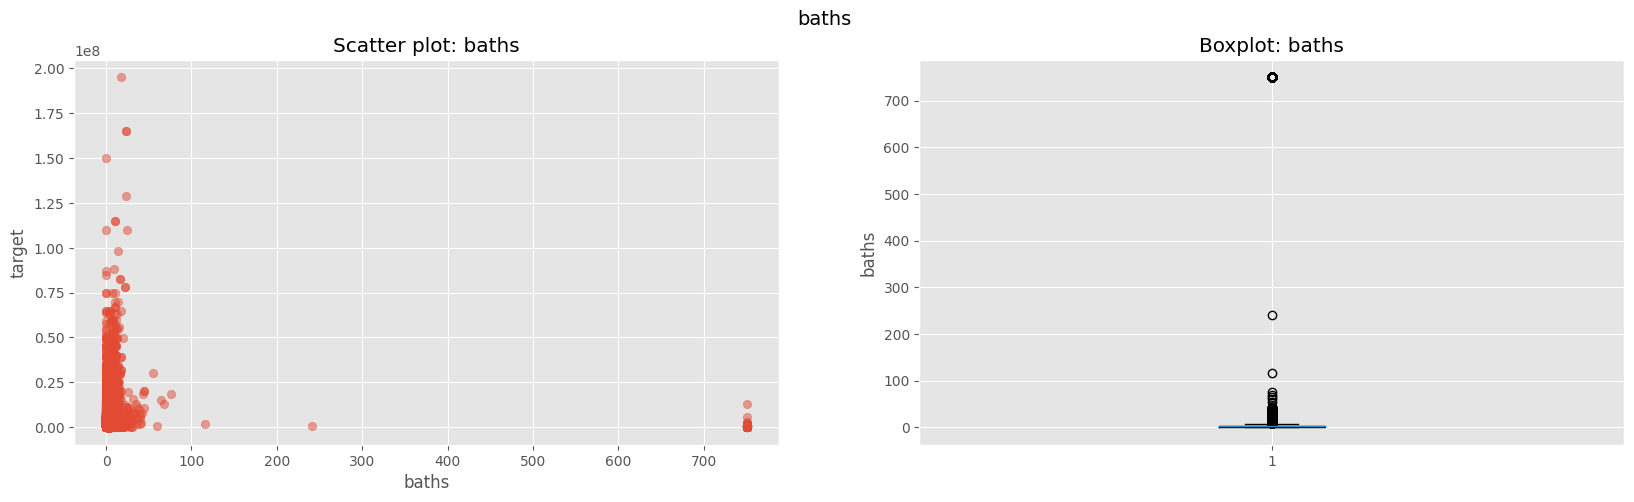

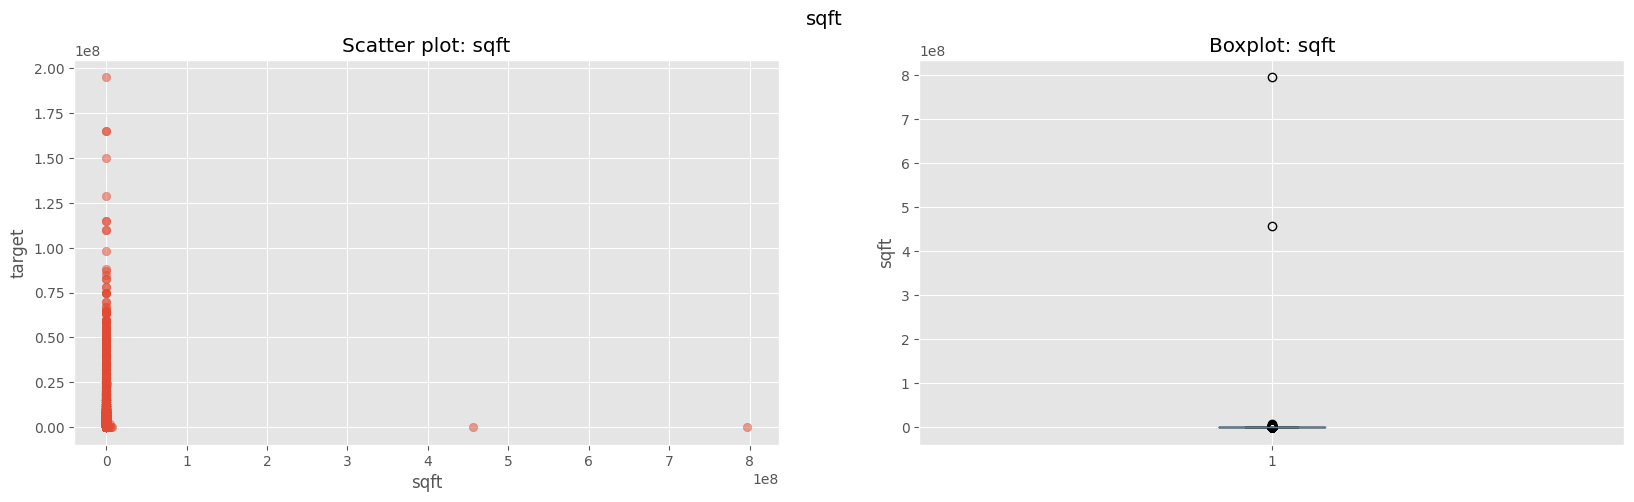

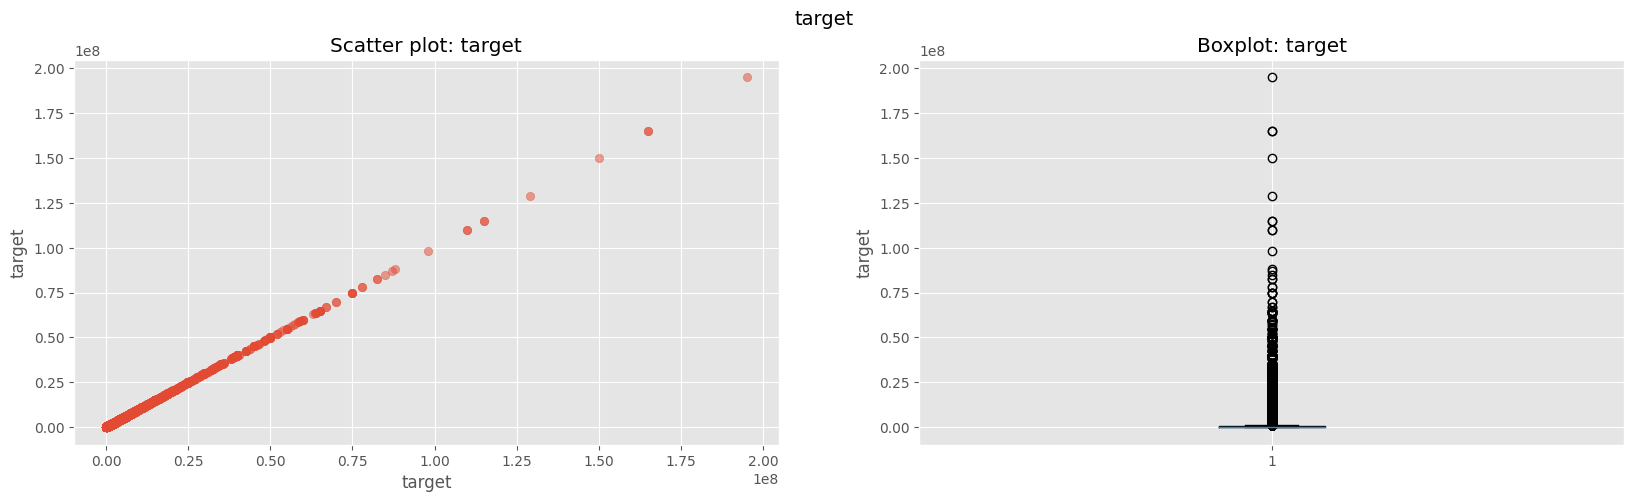

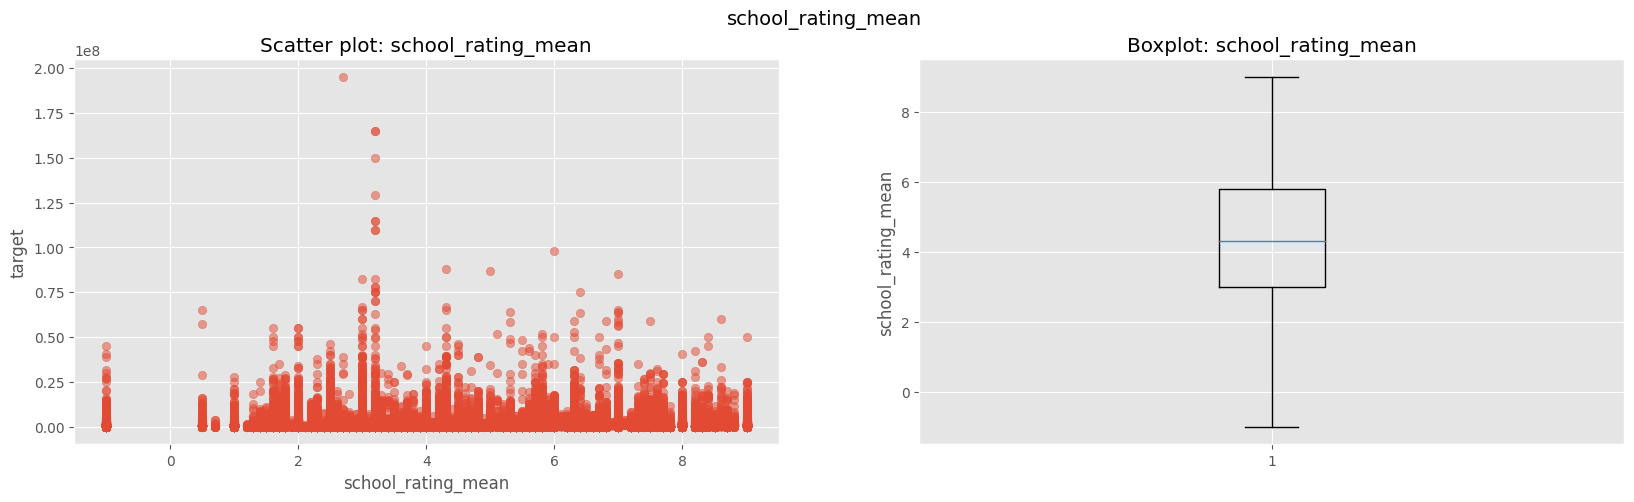

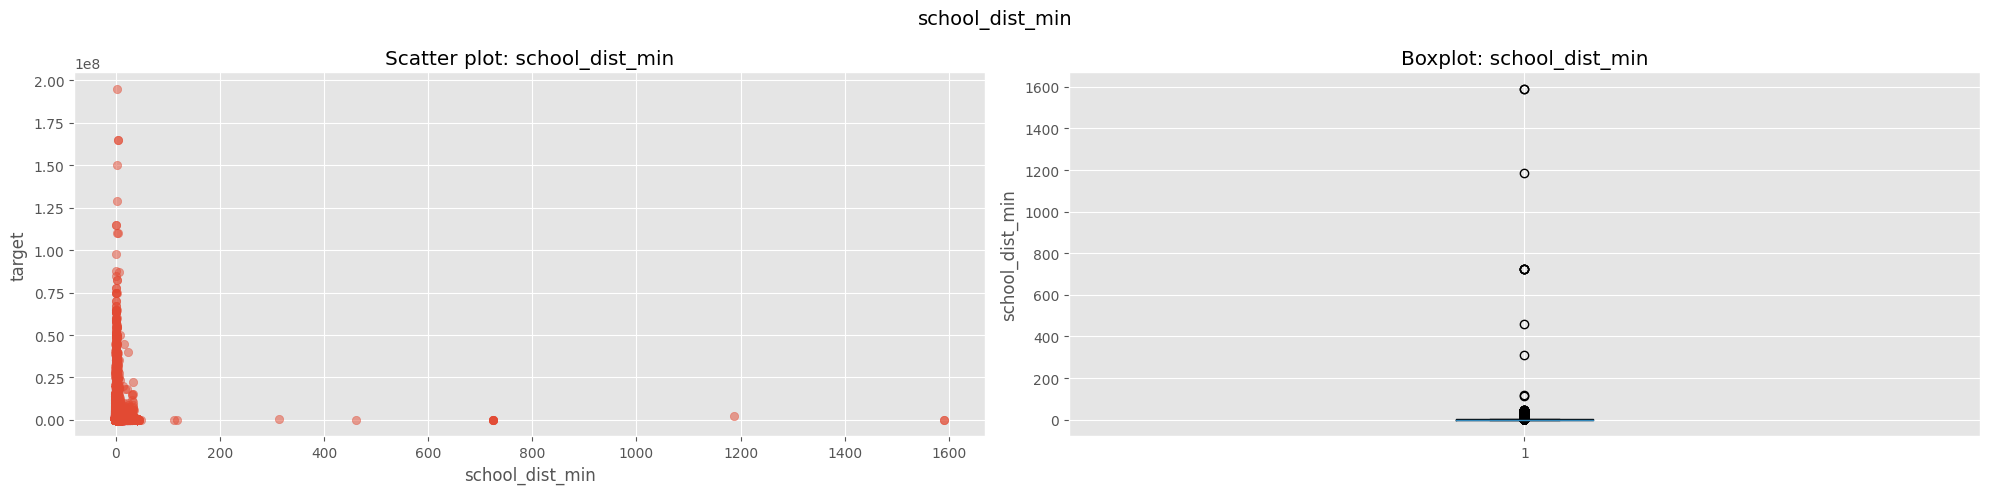

In [463]:
for feature in digital_features:
    fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
    fig.suptitle(f'{feature}', fontsize=14)
      
    barplot.scatter(df[feature], df['target'], alpha=0.5)
    barplot.set_title(f'Scatter plot: {feature}')
    barplot.set_xlabel(feature)
    barplot.set_ylabel('target')
    
    boxploot.boxplot(df[feature])
    boxploot.set_title(f'Boxplot: {feature}')
    boxploot.set_ylabel(feature)
    
plt.tight_layout()

Как мы видим по части признаков наблюдаются выбросы. Попробуем это исправить по каждому признаку отдельно.

3.1.1 Признак "baths"

На графике мы видим объекты с более чем 700 ванными и низкой стоимостью. Это явные выбросы, удалим их.

In [464]:
df.drop(df[df['baths']>700].index, inplace=True)

Посмотрим на результат наших преобразований.

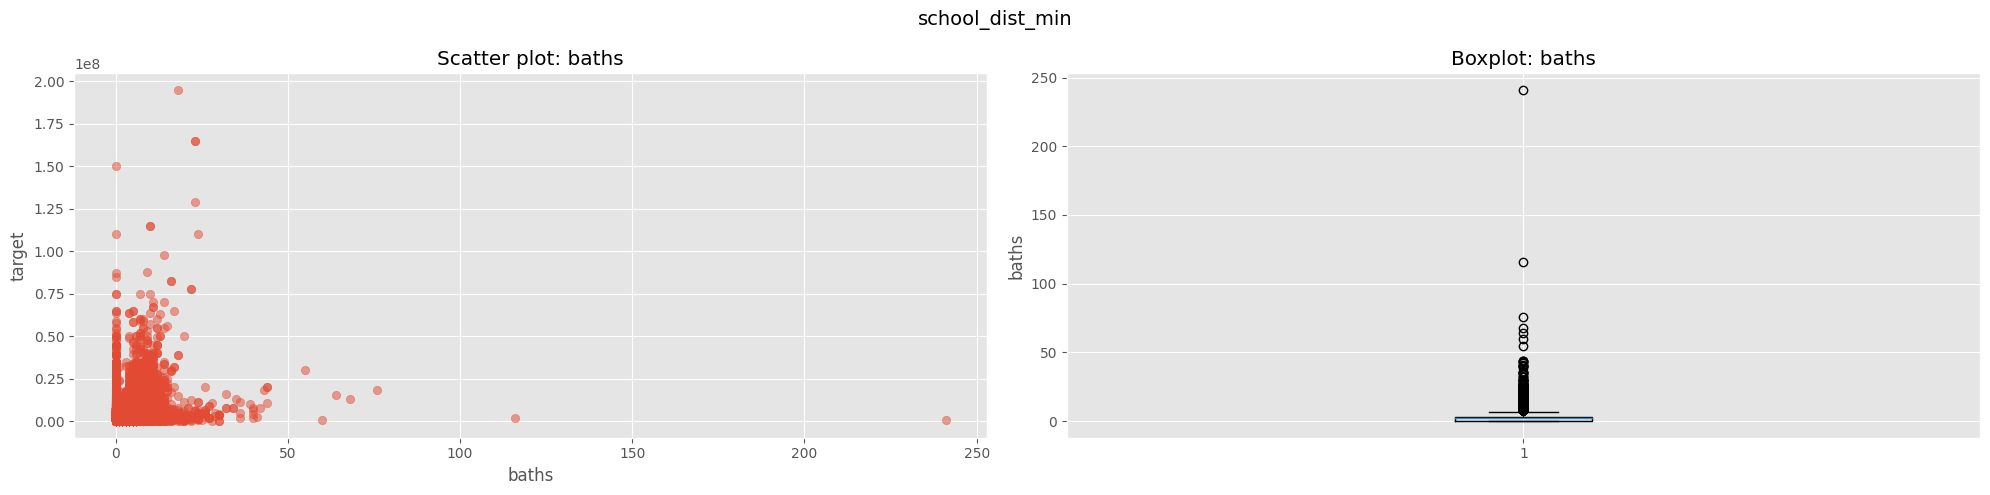

In [465]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['baths'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: baths')
barplot.set_xlabel('baths')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['baths'])
boxploot.set_title(f'Boxplot: baths')
boxploot.set_ylabel('baths')
    
plt.tight_layout()

Визуально наблюдаются выбросы по объектам с более чем 50 ваннами комнатами. Посмотрим на них поподробнее.

In [466]:
df_50 = (df['baths']>20)
filtered_df = df[df_50]
display(filtered_df)

status  baths         city   sqft zipcode state    target   pool  \
10968   For Sale  241.0      McAllen   3770   78503    TX    449000  False   
21195   For Sale   40.0   Lauderhill   1100   33313    FL   1704000   True   
27844   For Sale   24.0  Los Angeles  12582   90018    CA   6500000  False   
28820   For Sale   22.0      Detroit  18473   48206    MI     66000  False   
32405     Active   22.0    Charlotte  16675   28208    NC   2189000  False   
...          ...    ...          ...    ...     ...   ...       ...    ...   
335493  For Sale   68.0      Sunland  37394   91040    CA  12800000  False   
351022  For Sale   22.0  Los Angeles  30000   90077    CA  78000000   True   
355781  For Sale   44.0       Boston  21210    2120    MA  20000000  False   
358203  For Sale   23.0       Fresno  15968   93702    CA   1615000   True   
358364  For Sale   44.0  Los Angeles  28824   90059    CA  10700000  False   

                      Type Year built  Heating_encoded  school_rating_mean  \
10968   single_family_home       2014             True                 5.0   
21195    multi_family_home       1974             True                 2.8   
27844    multi_family_home       1901             True                 2.3   
28820    multi_family_home       1928             True                 1.5   
32405    multi_family_home       1954            False                 3.4   
...                    ...        ...              ...                 ...   
335493   multi_family_home       1983            False                 5.7   
351022  single_family_home       1939             True                 3.2   
355781   multi_family_home       1910             True                 5.5   
358203   multi_family_home       1963             True                 2.7   
358364   multi_family_home       1970            False                 2.0   

        school_dist_min  
10968              2.60  
21195              0.51  
27844              0.56  
28820              0.40  
32405              0.10  
...                 ...  
335493             0.82  
351022             0.70  
355781             0.40  
358203             0.20  
358364             0.42  

[90 rows x 13 columns]

Два объекта с более чем 100 ваннами являются с высокой долей выбросам. По объектам с более чем 20 ванными сложно дать однозначное заключение, данные выглядят аномальными. Примем решение удалять подобные данные. Этот же подход будем использовать для других признаков.

In [467]:
df.drop(df[df['baths']>20].index, inplace=True)

Посмотрим на результат наших преобразований.

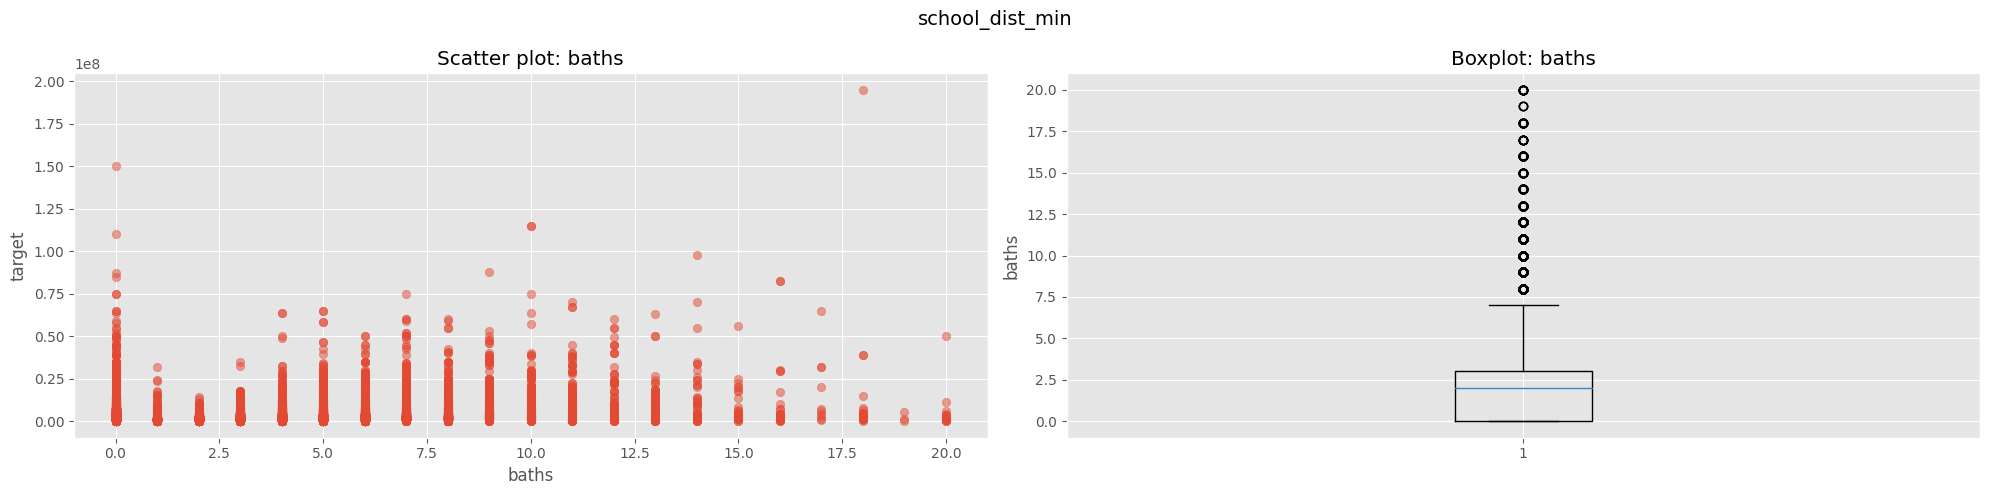

In [468]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['baths'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: baths')
barplot.set_xlabel('baths')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['baths'])
boxploot.set_title(f'Boxplot: baths')
boxploot.set_ylabel('baths')
    
plt.tight_layout()

Оставляем данные в таком виде.

3.1.2 Признак "sqft"

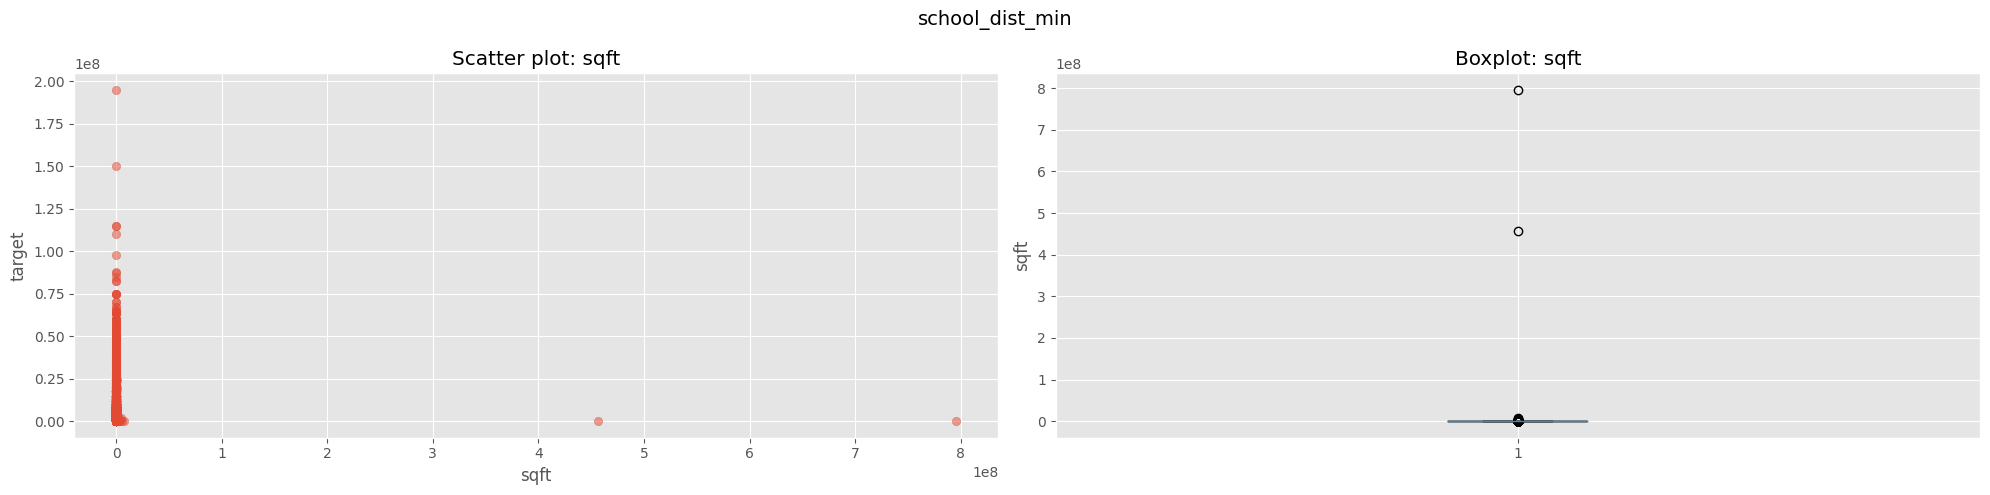

In [469]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['sqft'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: sqft')
barplot.set_xlabel('sqft')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['sqft'])
boxploot.set_title(f'Boxplot: sqft')
boxploot.set_ylabel('sqft')
    
plt.tight_layout()

In [470]:
# удалим 'sqft'> 10000000
df.drop(df[df['sqft']>1000000].index, inplace=True)

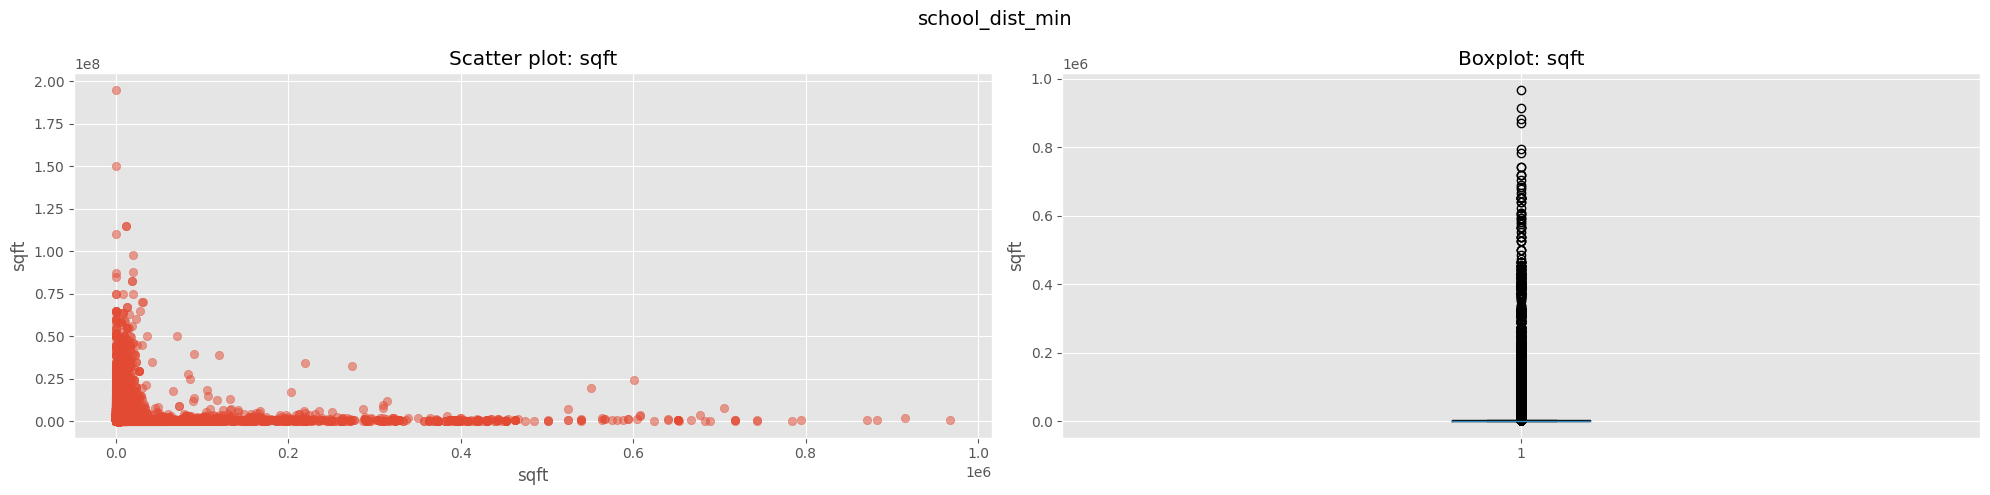

In [471]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['sqft'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: sqft')
barplot.set_xlabel('sqft')
barplot.set_ylabel('sqft')
    
boxploot.boxplot(df['sqft'])
boxploot.set_title(f'Boxplot: sqft')
boxploot.set_ylabel('sqft')
    
plt.tight_layout()

Выбросы остались.

In [472]:
# посмотрим внимательнее на 'sqft'> 40000
df_40k = df[df['sqft']>40000]
df_40k.head(20)

status  baths           city    sqft zipcode state   target   pool  \
89    For Sale    2.0    Kew Gardens  107250   11415    NY   319000  False   
133   For Sale    0.0        Bayside  109200   11361    NY   270000  False   
197   For Sale    0.0       New York  225667   10031    NY   455000  False   
309   For Sale    0.0        Bayside  373772   11360    NY   239000  False   
386   For Sale    0.0   Forest Hills   71838   11375    NY   440000  False   
562   For Sale    4.0       New York  142075   10028    NY  5300000  False   
718   For Sale    0.0       Flushing  114151   11354    NY   295000  False   
1699    Active    0.0    San Antonio  119921   78247    TX    89480  False   
2206  For Sale    0.0       New York  206511   10021    NY   699000  False   
2265  For Sale    0.0    San Antonio   68868   78240    TX   785000  False   
2568  For Sale    0.0       New York  105996   10023    NY   425000  False   
2604  For Sale    0.0       New York  140370   10003    NY   749000  False   
2623  For Sale    0.0       Flushing  260961   11354    NY   349990  False   
2783  For Sale    0.0         Burien   51400   98168    WA   230000  False   
2794  For Sale    0.0  East Elmhurst  332660   11369    NY   239900  False   
2915  For Sale    0.0       Brooklyn   65920   11201    NY   350000  False   
3213  For Sale    0.0        Bayside  363000   11360    NY   269000  False   
3242  For Sale    2.0        Bayside  157080   11360    NY   368000  False   
3548  For Sale    0.0        Chicago   52600   60611    IL   223000   True   
3692  For Sale    0.0          Bronx   46500   10471    NY   249000  False   

                    Type Year built  Heating_encoded  school_rating_mean  \
89                 condo       1969            False                 5.3   
133   single_family_home       1963             True                 3.8   
197                condo       1957            False                 1.7   
309                condo       1961             True                 7.7   
386                condo       1939            False                 3.5   
562                condo       1929            False                 4.3   
718                condo       1955            False                 5.3   
1699               other    no date            False                 6.0   
2206               condo       1957            False                 4.3   
2265                land       1959             True                 6.0   
2568               condo       1925            False                 0.5   
2604               condo       1954            False                 5.8   
2623               condo       1952             True                 6.3   
2783                land    no date            False                 4.0   
2794               condo       1952            False                 5.8   
2915               condo       1950            False                 7.0   
3213               condo       1961            False                 7.7   
3242               condo       1961             True                 7.7   
3548               condo       1959            False                 4.0   
3692               condo       1962            False                 6.5   

      school_dist_min  
89               0.37  
133              0.51  
197              0.48  
309              0.27  
386              0.26  
562              0.12  
718              0.28  
1699             0.30  
2206             0.32  
2265             0.29  
2568             0.53  
2604             0.35  
2623             0.28  
2783             0.42  
2794             0.17  
2915             0.48  
3213             0.30  
3242             0.10  
3548             0.64  
3692             0.29

Визуально эти данные кажутся выбросами, как будто вместо площади объекта недвижимости указано все здание.

In [473]:
# удалим 'sqft'> 40000
df.drop(df[df['sqft']>40000].index, inplace=True)
# так же удалим 'sqft' < 10
df.drop(df[df['sqft']<10].index, inplace=True)


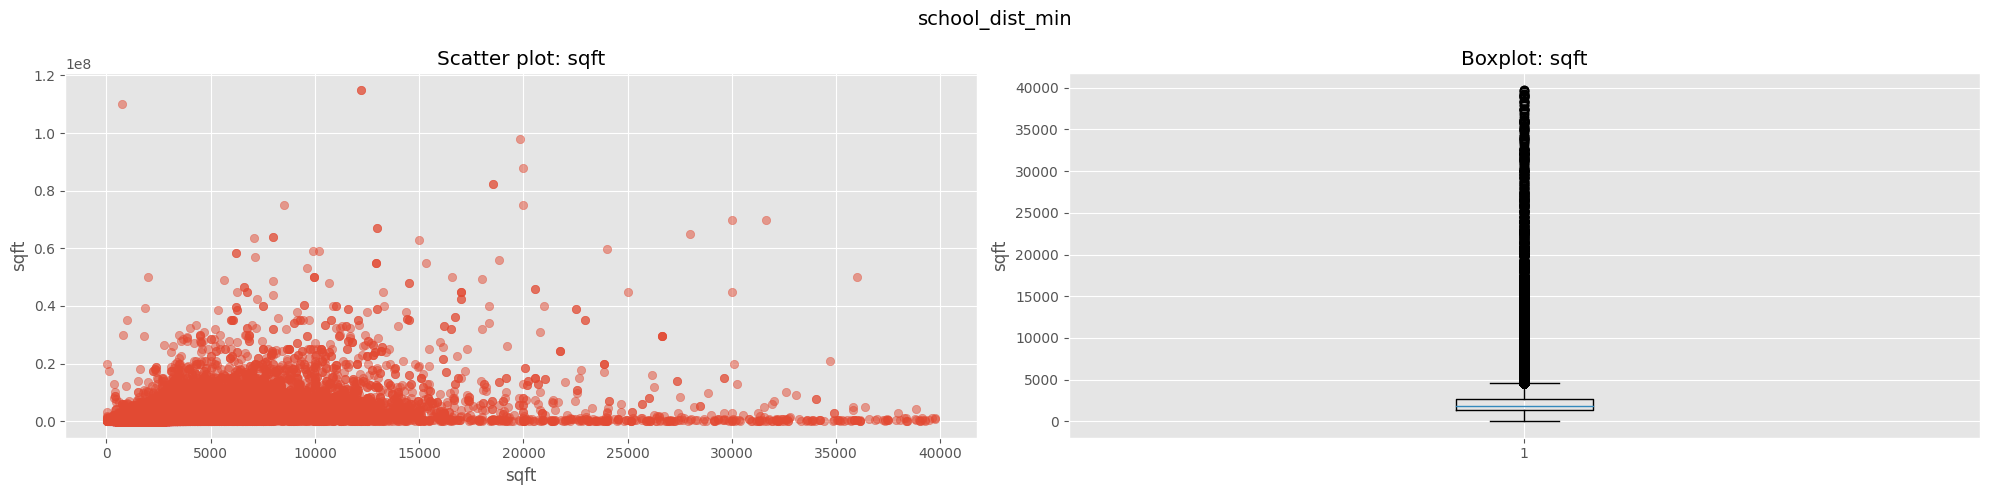

In [474]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['sqft'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: sqft')
barplot.set_xlabel('sqft')
barplot.set_ylabel('sqft')
    
boxploot.boxplot(df['sqft'])
boxploot.set_title(f'Boxplot: sqft')
boxploot.set_ylabel('sqft')
    
plt.tight_layout()

Оставляем данные в таком виде.

3.1.3 Признак "target"

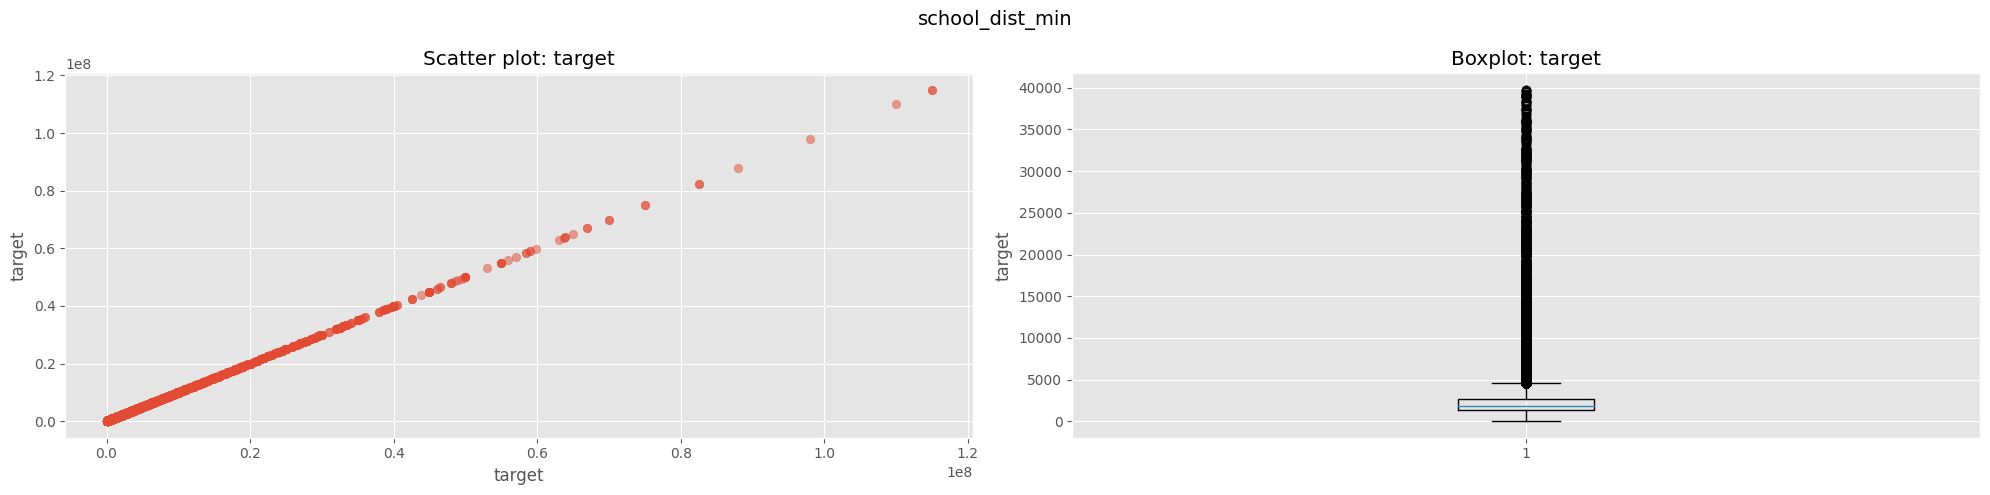

In [475]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['target'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: target')
barplot.set_xlabel('target')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['sqft'])
boxploot.set_title(f'Boxplot: target')
boxploot.set_ylabel('target')
    
plt.tight_layout()

In [476]:
# удалим 'target'> 30 000 000
df.drop(df[df['target']>30000000].index, inplace=True)

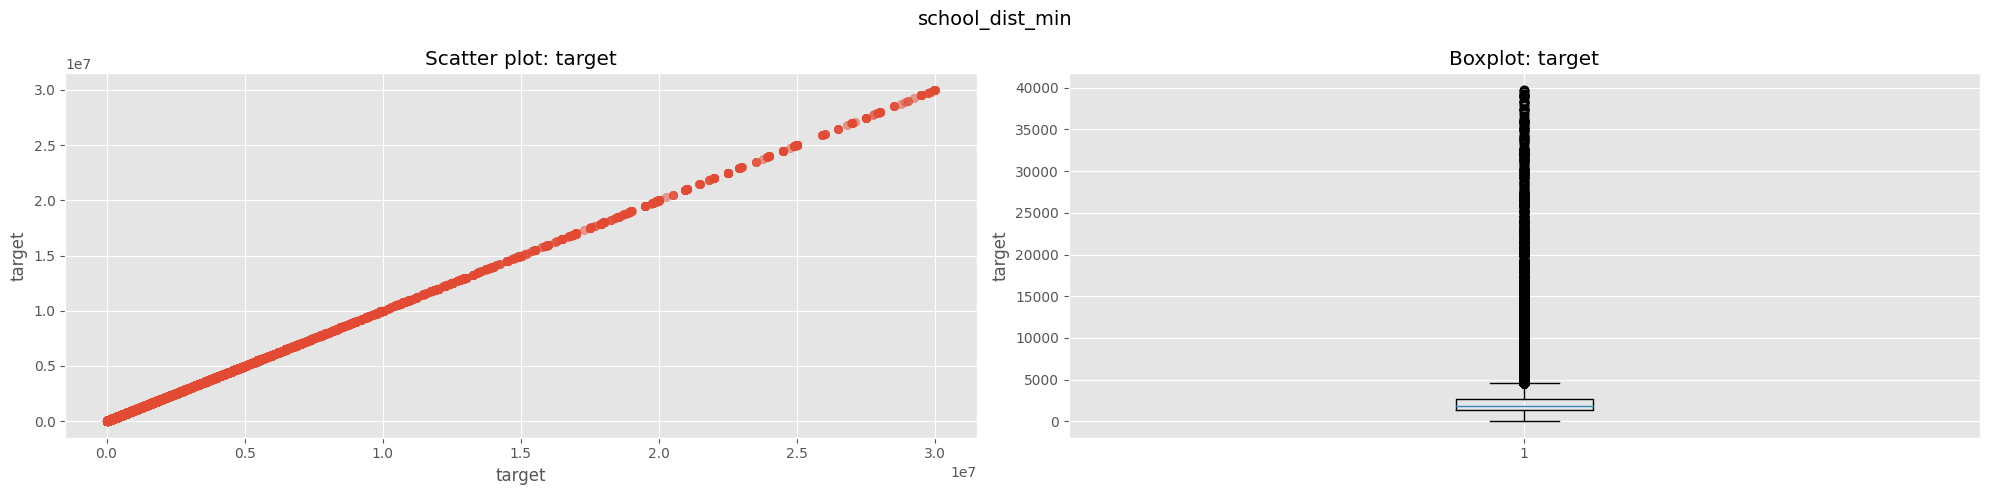

In [477]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['target'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: target')
barplot.set_xlabel('target')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['sqft'])
boxploot.set_title(f'Boxplot: target')
boxploot.set_ylabel('target')
    
plt.tight_layout()

Судя по графику у нас остались выбросы, это плохо, особенно учитывая, что 'target' - это целевой признак. Попробуем избавится от выбросов и зададим, что для этого мы готовы пожертвовать примерно 10% данных. Это соответствует цене примерно в $ 1 000 000.

In [478]:
# считаем количество строк для $ 1 000 000
count = len(df[df['target'] > 1000000])
# считаем процент от общего числа строк
percentage = count / len(df) * 100
# выводим результаты
print(f"Количество строк: {count}")
print(f"Процент строк: {percentage:.2f}%")

Количество строк: 36217
Процент строк: 11.38%


In [479]:
# удалим 'target'> 1 000 000
df.drop(df[df['target']>1000000].index, inplace=True)

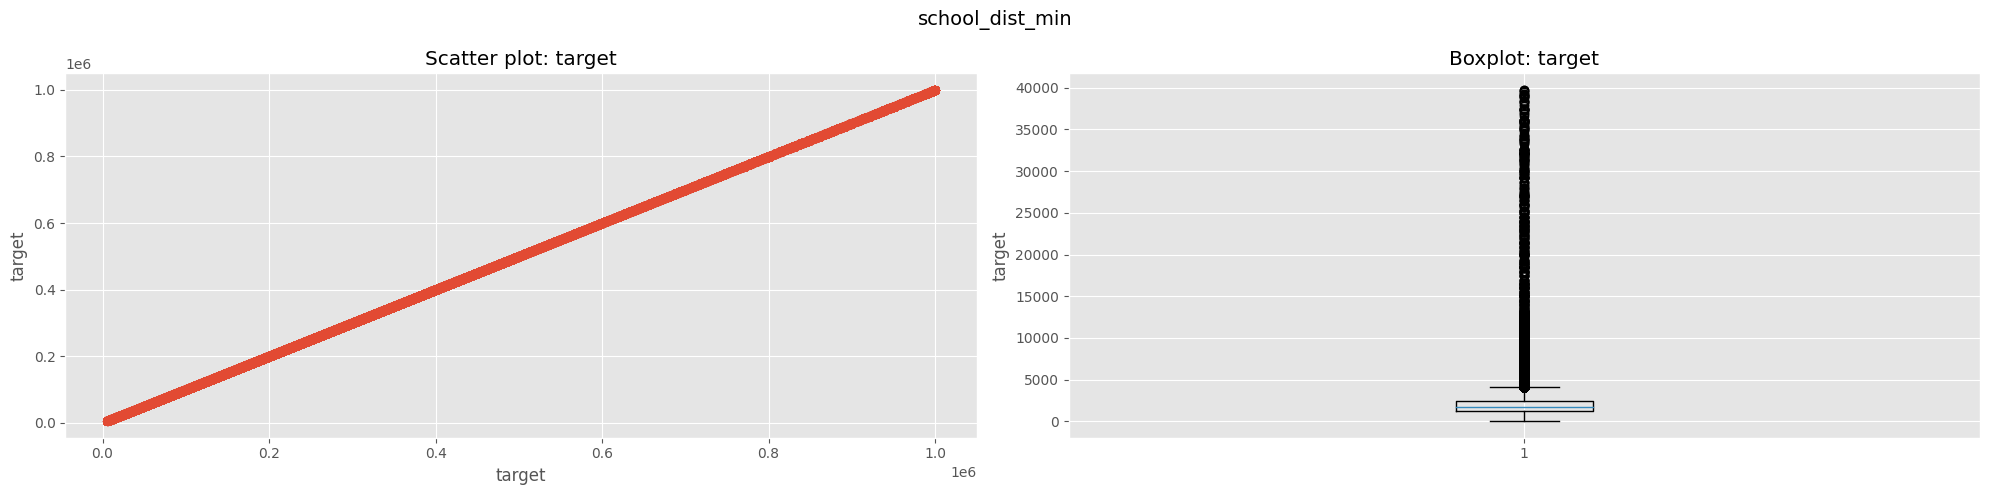

In [480]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['target'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: target')
barplot.set_xlabel('target')
barplot.set_ylabel('target')
    
boxploot.boxplot(df['sqft'])
boxploot.set_title(f'Boxplot: target')
boxploot.set_ylabel('target')
    
plt.tight_layout()

Визуально график выглядит гораздо лучше. Оставим в таком виде.

3.1.4 Признак "school_dist_min"

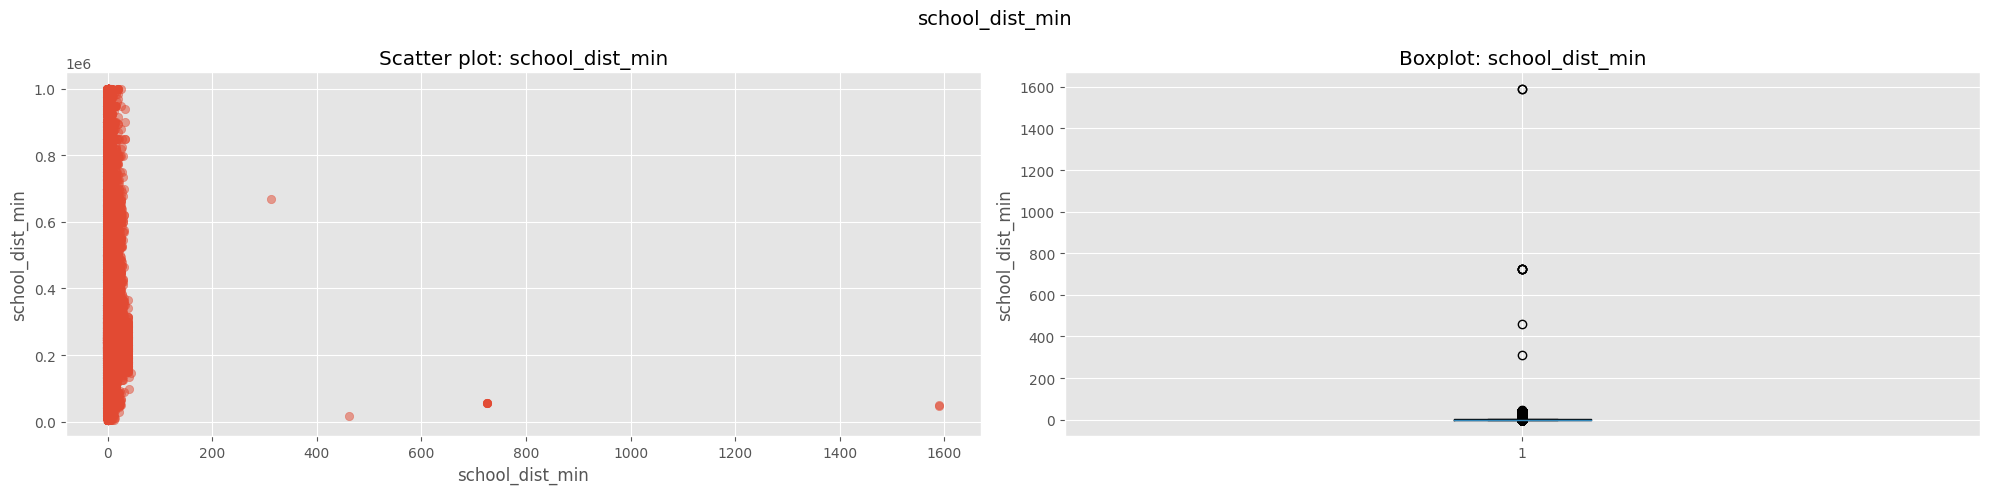

In [481]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['school_dist_min'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: school_dist_min')
barplot.set_xlabel('school_dist_min')
barplot.set_ylabel('school_dist_min')
    
boxploot.boxplot(df['school_dist_min'])
boxploot.set_title(f'Boxplot: school_dist_min')
boxploot.set_ylabel('school_dist_min')
    
plt.tight_layout()

In [482]:
# удалим 'school_dist_min'> 120
df.drop(df[df['school_dist_min']>120].index, inplace=True)

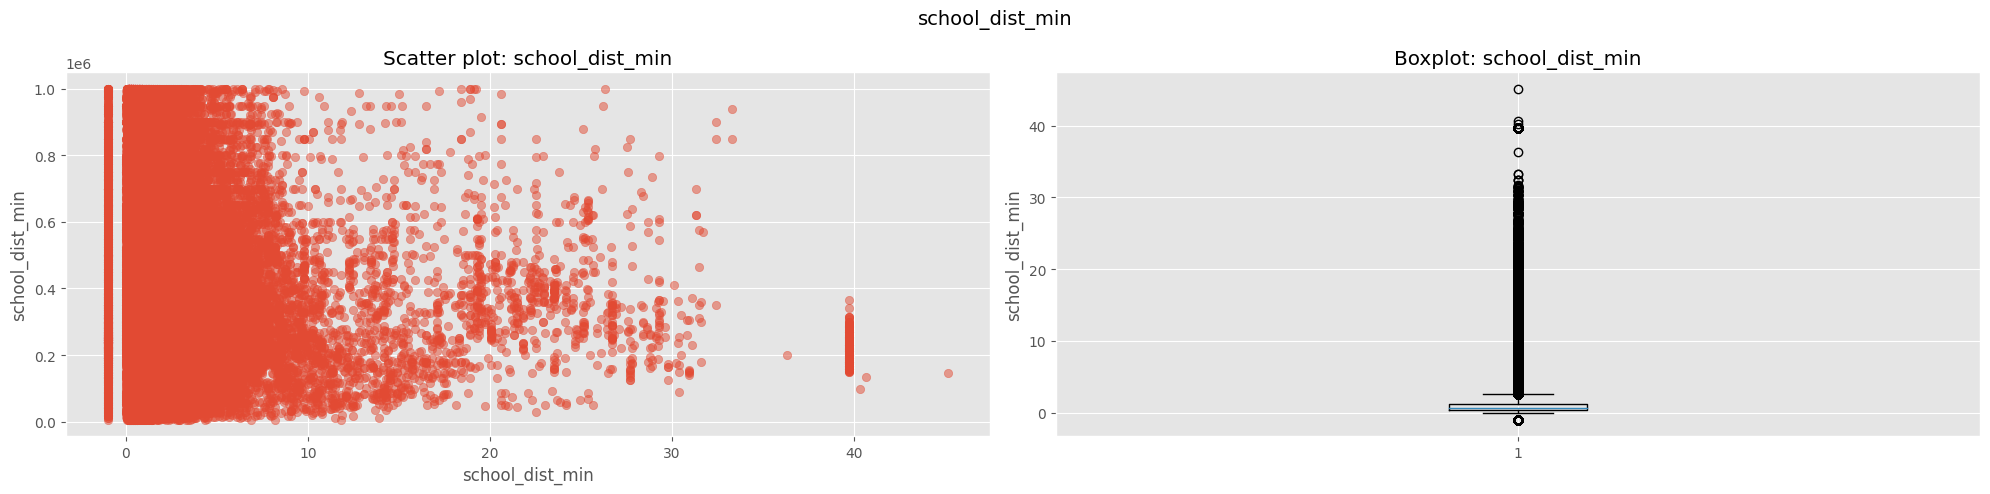

In [483]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['school_dist_min'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: school_dist_min')
barplot.set_xlabel('school_dist_min')
barplot.set_ylabel('school_dist_min')
    
boxploot.boxplot(df['school_dist_min'])
boxploot.set_title(f'Boxplot: school_dist_min')
boxploot.set_ylabel('school_dist_min')
    
plt.tight_layout()

Визуальный осмотр графика без дополнительных инструментов показывает нам, что выбросы начинаются после 35 минут. 

In [484]:
# удалим 'school_dist_min'> 35
df.drop(df[df['school_dist_min']>35].index, inplace=True)

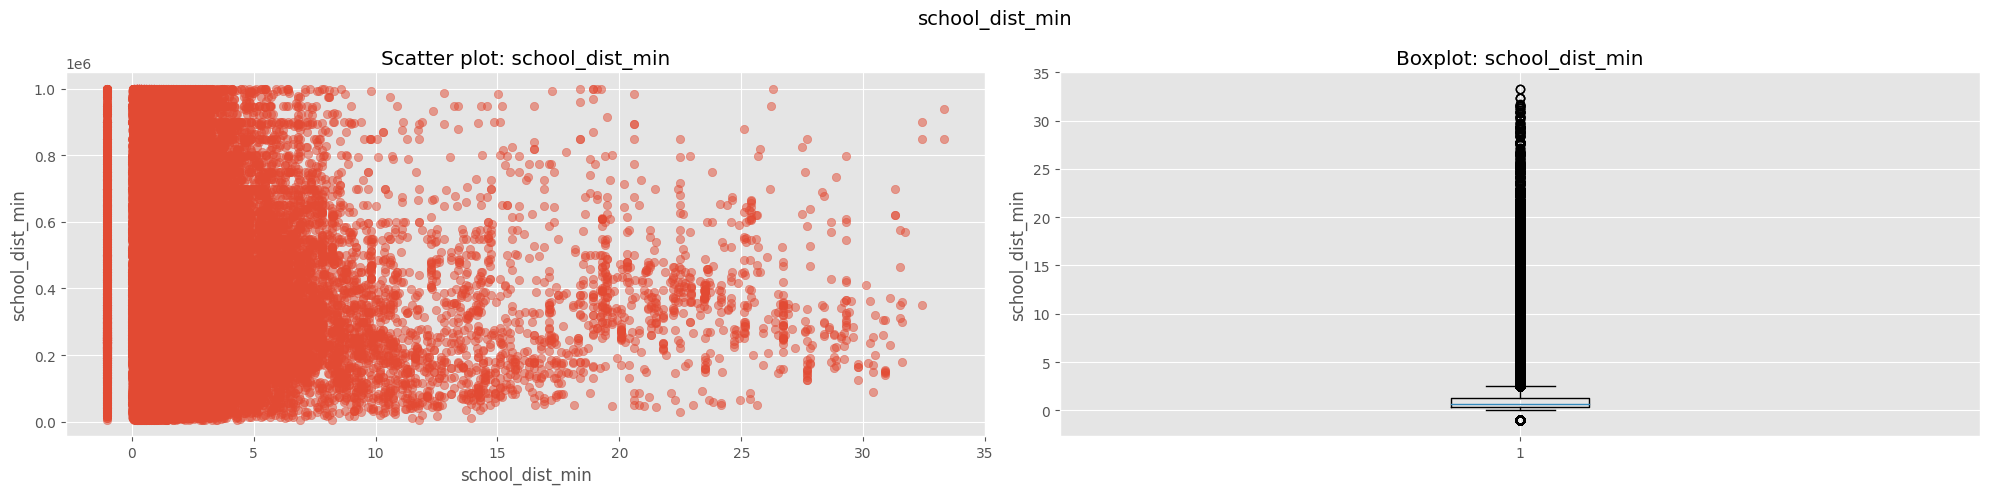

In [485]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['school_dist_min'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: school_dist_min')
barplot.set_xlabel('school_dist_min')
barplot.set_ylabel('school_dist_min')
    
boxploot.boxplot(df['school_dist_min'])
boxploot.set_title(f'Boxplot: school_dist_min')
boxploot.set_ylabel('school_dist_min')
    
plt.tight_layout()

По графику мы видим, что есть нулевые и отрицательные значения, чего не может быть. Посмотрим сколько таких значений.

In [486]:
# считаем количество строк для нулевых и отрицательных значений
count = len(df[df['school_dist_min'] <=0])
# считаем процент от общего числа строк
percentage = count / len(df) * 100
# выводим результаты
print(f"Количество строк: {count}")
print(f"Процент строк: {percentage:.2f}%")

Количество строк: 2596
Процент строк: 0.92%


Потеря 1% строк кажется приемлимой. Удалим эти строки.

In [487]:
# удалим 'school_dist_min'<= 0
df.drop(df[df['school_dist_min']<=0].index, inplace=True)

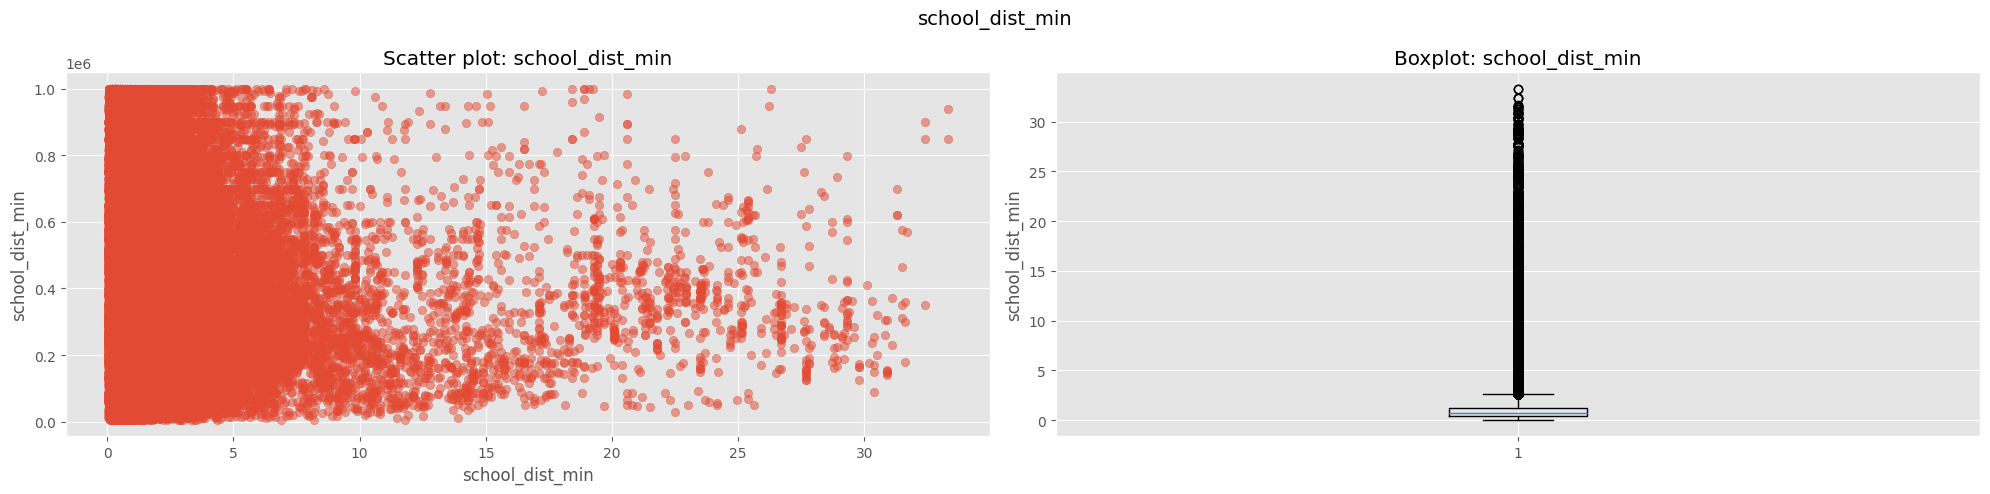

In [488]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['school_dist_min'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: school_dist_min')
barplot.set_xlabel('school_dist_min')
barplot.set_ylabel('school_dist_min')
    
boxploot.boxplot(df['school_dist_min'])
boxploot.set_title(f'Boxplot: school_dist_min')
boxploot.set_ylabel('school_dist_min')
    
plt.tight_layout()

Визуально график выглядит гораздо лучше. Оставим в таком виде.

3.1.5 Признак "school_rating_mean"

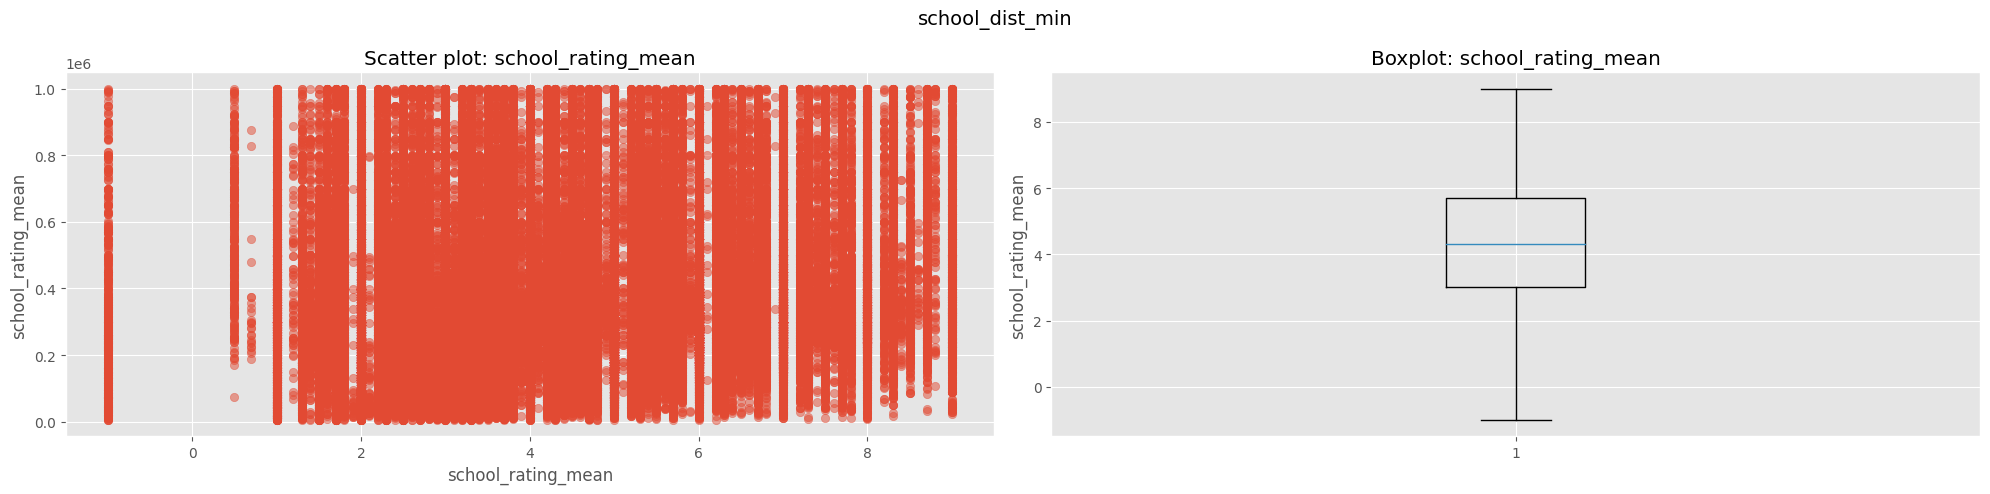

In [489]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['school_rating_mean'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: school_rating_mean')
barplot.set_xlabel('school_rating_mean')
barplot.set_ylabel('school_rating_mean')
    
boxploot.boxplot(df['school_rating_mean'])
boxploot.set_title(f'Boxplot: school_rating_mean')
boxploot.set_ylabel('school_rating_mean')
    
plt.tight_layout()

В этом графике отрицательные рейтинги кажутся выбросами. Давайте посмотрим сколько таких значений.

In [490]:
# считаем количество строк для нулевых и отрицательных значений
count = len(df[df['school_rating_mean'] <0])
# считаем процент от общего числа строк
percentage = count / len(df) * 100
# выводим результаты
print(f"Количество строк: {count}")
print(f"Процент строк: {percentage:.2f}%")

Количество строк: 667
Процент строк: 0.24%


Потеря 0,23% строк кажется приемлимой. Удалим эти строки.

In [491]:
# удалим 'school_rating_mean'< 0
df.drop(df[df['school_rating_mean']<=0].index, inplace=True)

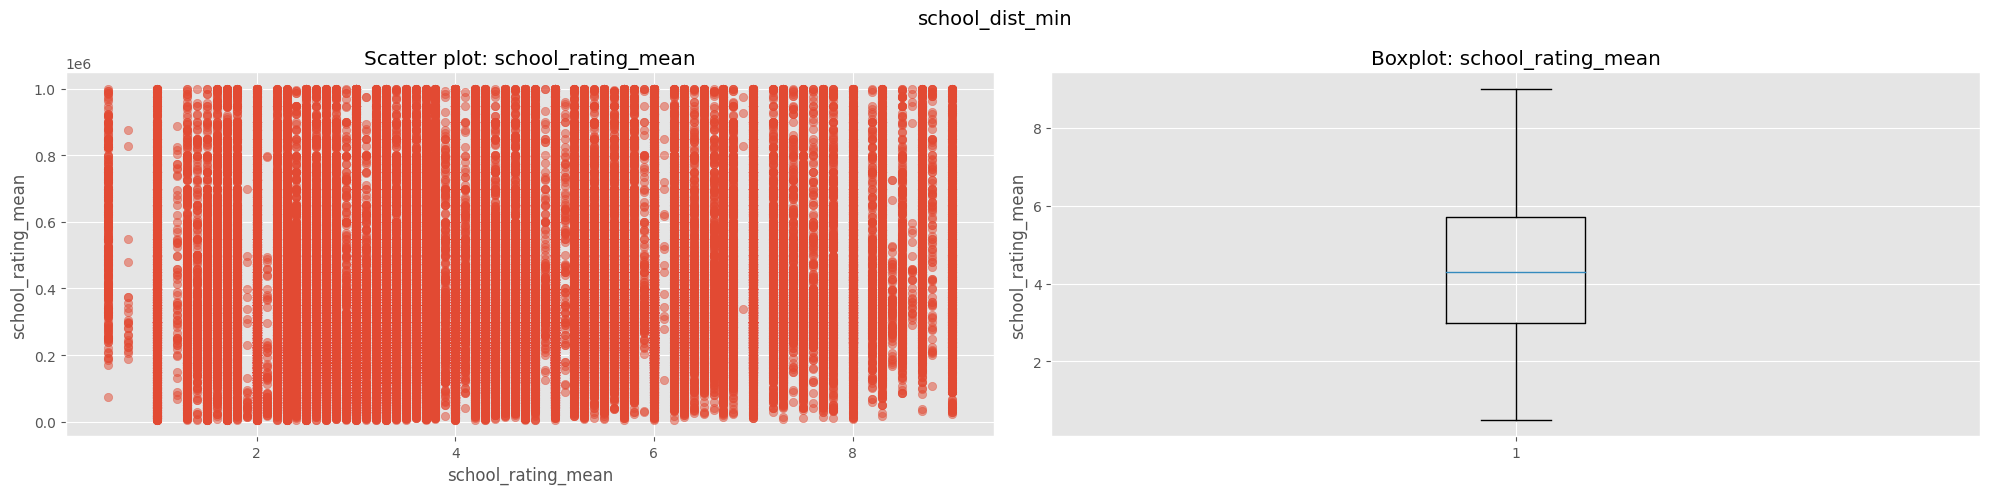

In [492]:
fig, (barplot,boxploot) = plt.subplots(1, 2, figsize=(20, 5)) 
fig.suptitle(f'{feature}', fontsize=14)
      
barplot.scatter(df['school_rating_mean'], df['target'], alpha=0.5)
barplot.set_title(f'Scatter plot: school_rating_mean')
barplot.set_xlabel('school_rating_mean')
barplot.set_ylabel('school_rating_mean')
    
boxploot.boxplot(df['school_rating_mean'])
boxploot.set_title(f'Boxplot: school_rating_mean')
boxploot.set_ylabel('school_rating_mean')
    
plt.tight_layout()

Визуально график выглядит гораздо лучше. Оставим в таком виде.

## 3.2 Проверка признаков на мультиколлинеарность.

Проверим признаки на мальтиколлинеарность используя метод Пирсона. 


Text(0.5, 1.0, 'Тепловая карта мультиколлинеарности')

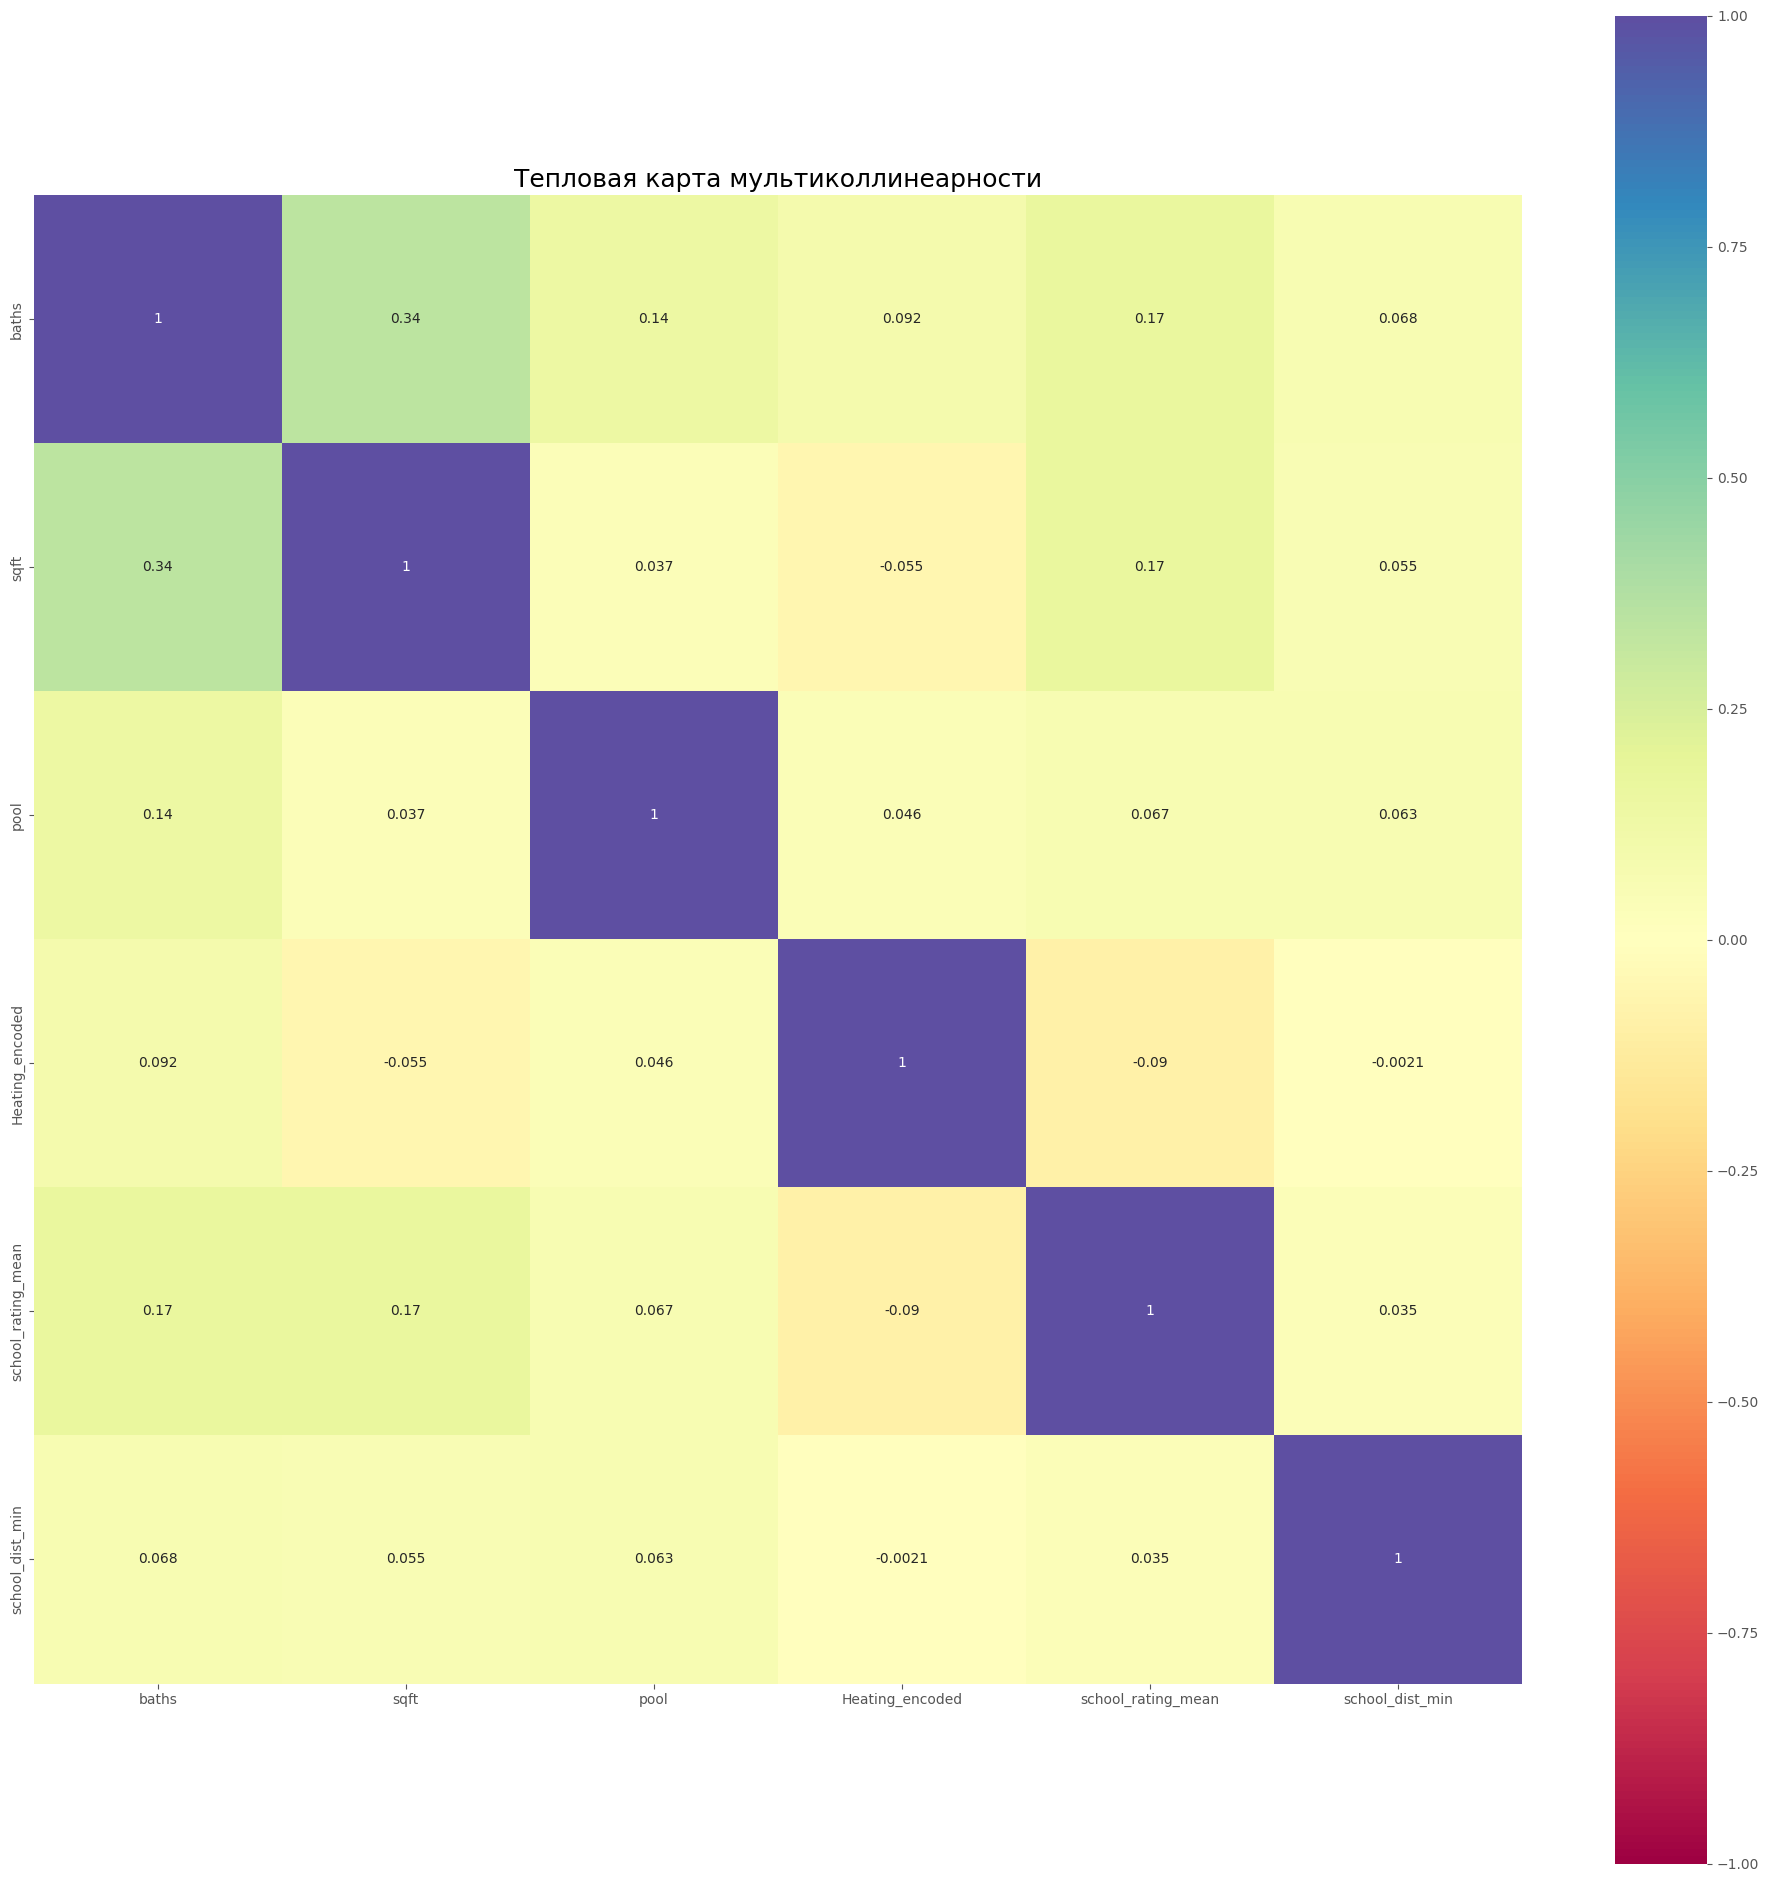

In [493]:
fig = plt.figure(figsize=(24, 24))
heatmap = sns.heatmap(
    data = df.drop('target', axis=1).corr(method='pearson'),
    annot = True,
    fmt = '.2g',
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap= 'Spectral',
    square = True
)
heatmap.set_title('Тепловая карта мультиколлинеарности', fontsize=18)

Мультиколлинеарности в наших признаках нет.

## 3.3 Анализ категориальных признаков

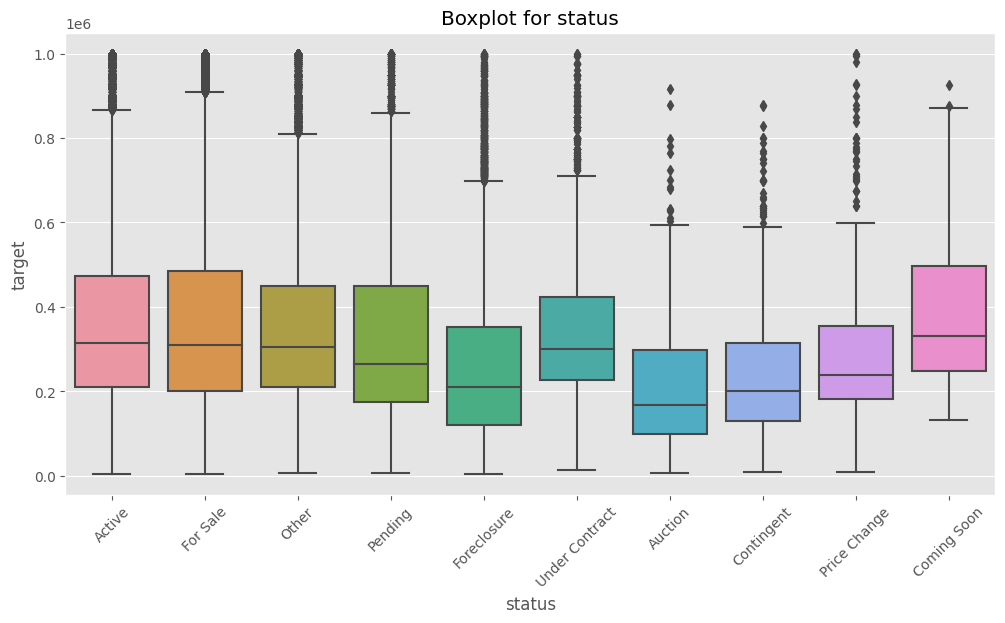

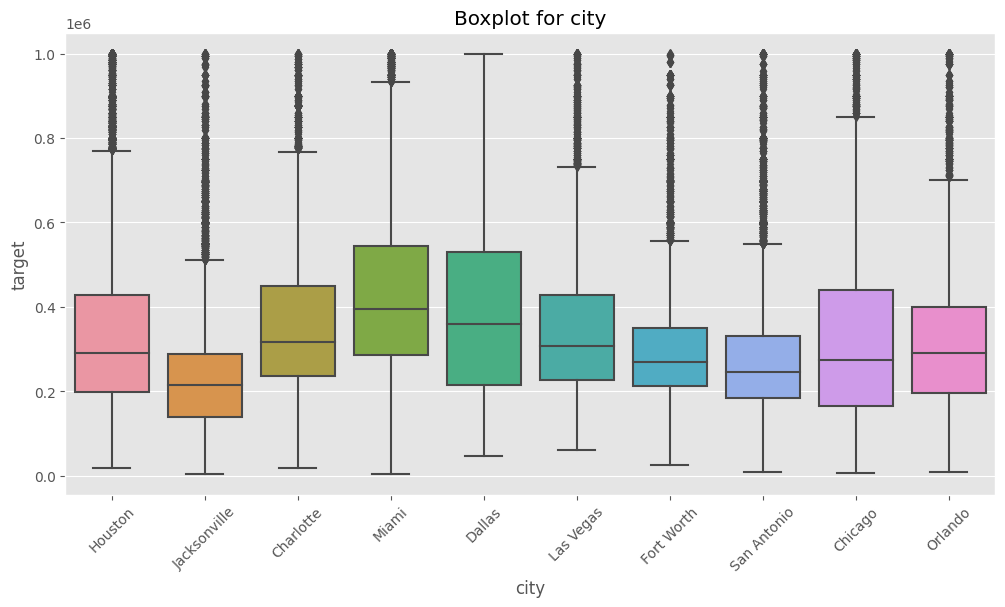

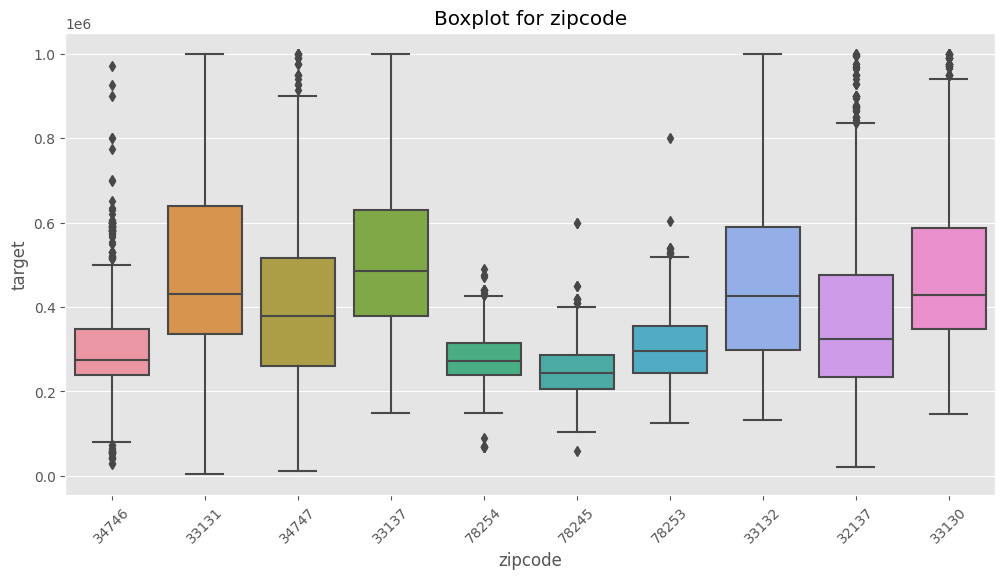

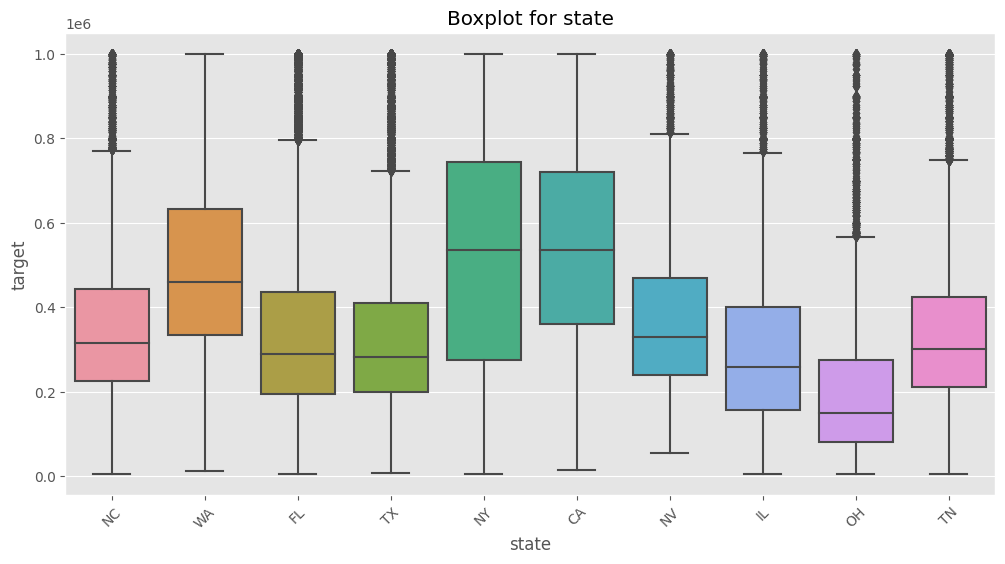

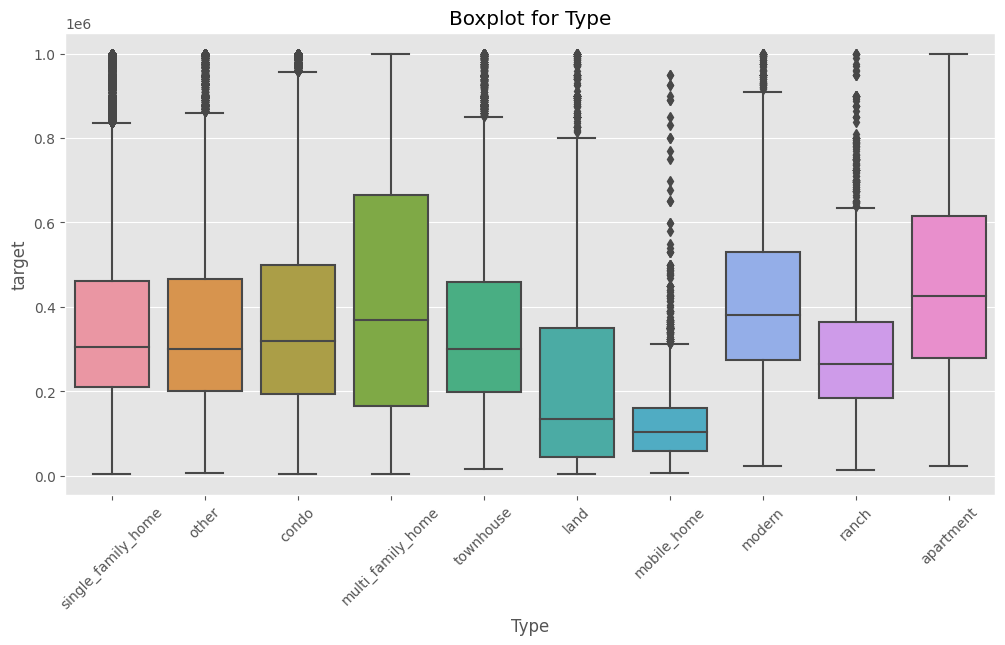

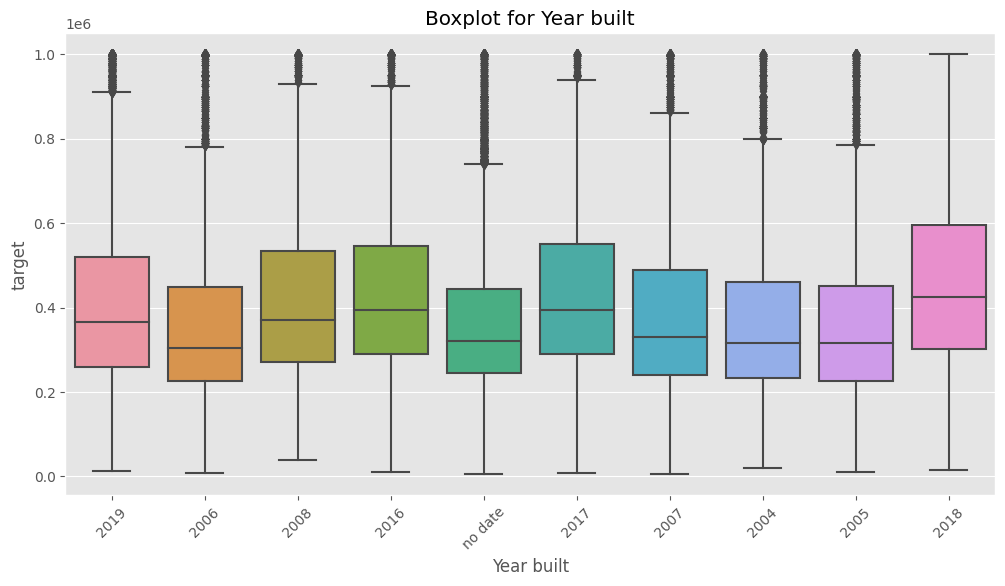

In [494]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 6))
    sns.boxplot(x=column, y='target', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:10])],ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in chain(categorial_features):
    get_boxplot(col)

Визуально по графикам мы можем наблюдать, что все наши категориальные признаки могут влиять на стоимость.

Еще раз посмотрим на количество уникальных значений в категориальных признаках:

In [495]:
for col in categorial_features:
   unique_values = df[col].nunique()
   print(f"Количество уникальных значений в признаке {col}: {unique_values}")

Количество уникальных значений в признаке status: 14
Количество уникальных значений в признаке city: 1739
Количество уникальных значений в признаке zipcode: 4064
Количество уникальных значений в признаке state: 35
Количество уникальных значений в признаке Type: 12
Количество уникальных значений в признаке Year built: 208


Больше всего значений в признаках "city" и "zipcode". При этом в обоих зашифровано месторасположения объекта. Только в одном на уровне города, а в другом на уровне района. В связи с этим для облегчения модели мы можем удалить из датасета менее информативный признак - "city".  

In [496]:
# удалим признак 'city'
df= df.drop('city', axis=1)

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278664 entries, 0 to 371727
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   status              278664 non-null  object 
 1   baths               278664 non-null  float64
 2   sqft                278664 non-null  int64  
 3   zipcode             278664 non-null  object 
 4   state               278664 non-null  object 
 5   target              278664 non-null  int64  
 6   pool                278664 non-null  bool   
 7   Type                278664 non-null  object 
 8   Year built          278664 non-null  object 
 9   Heating_encoded     278664 non-null  bool   
 10  school_rating_mean  278664 non-null  float64
 11  school_dist_min     278664 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 23.9+ MB


In [498]:
# Сохраним наши предобработанные данные в CSV-файл
df.to_csv("C:/DS/IDE/Diplom/clean2_df.csv", index=False)

В результате данного модуля мы проделали следующую работу:
* Удалили выбросы
* Провели корреляционный анализ признаков
* Провели анализ категориальных признаков
* Сохранили данные в новый датафрейм для дальнейшей работы


# 4. Нормализация и кодирование признаков.

In [499]:
# Прочитаем данные
df = pd.read_csv('C:/DS/IDE/Diplom/clean2_df.csv')

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278664 entries, 0 to 278663
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   status              278664 non-null  object 
 1   baths               278664 non-null  float64
 2   sqft                278664 non-null  int64  
 3   zipcode             278664 non-null  int64  
 4   state               278664 non-null  object 
 5   target              278664 non-null  int64  
 6   pool                278664 non-null  bool   
 7   Type                278664 non-null  object 
 8   Year built          278664 non-null  object 
 9   Heating_encoded     278664 non-null  bool   
 10  school_rating_mean  278664 non-null  float64
 11  school_dist_min     278664 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(4)
memory usage: 21.8+ MB


Изучим насколько нормально распределены наши числовые признаки.

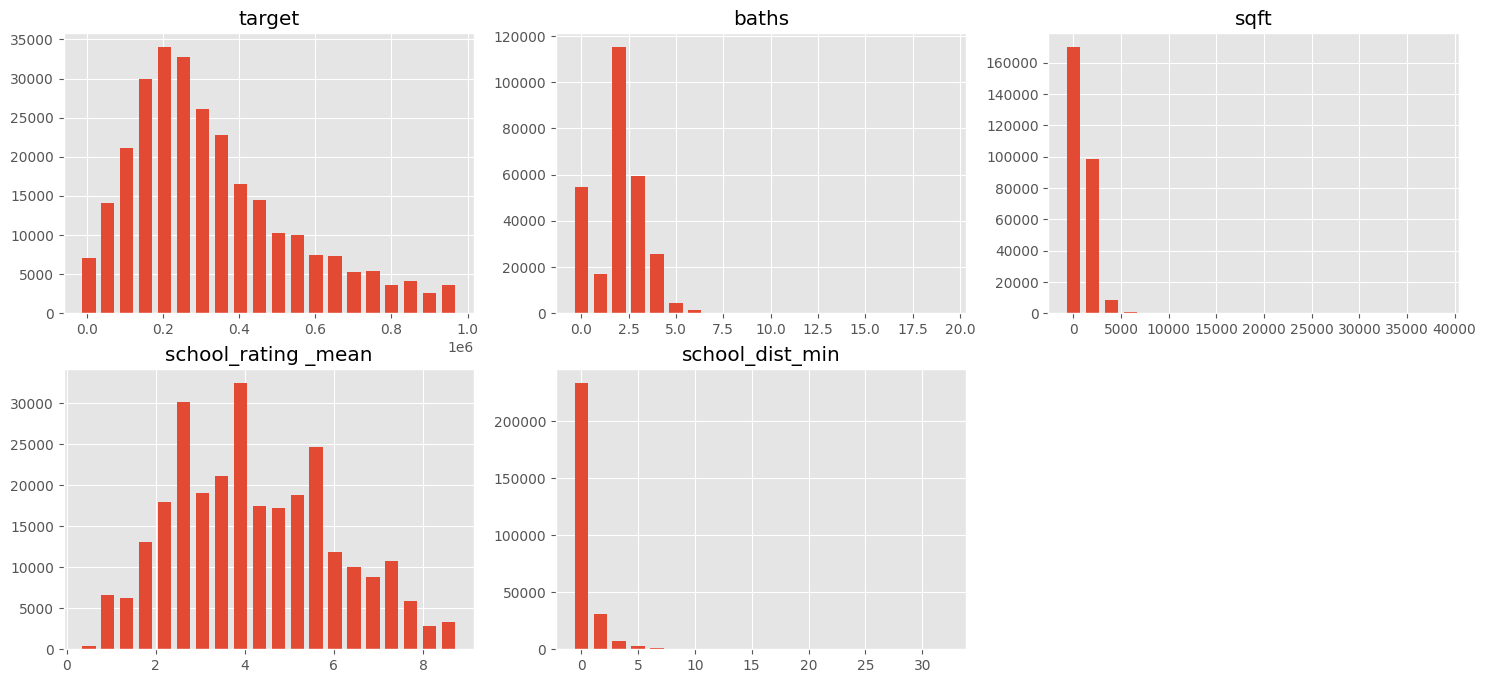

In [501]:
def visnormaldistrib(values):
  columns = min(3, len(values))
  rows = (len(values) - 1) // columns + 1
  fig = plt.figure(figsize = (columns * 6, rows * 4))
  for i, (title, values) in enumerate(values.items()):
    hist, bins = np.histogram(values, bins = 20)
    ax = fig.add_subplot(rows, columns, i + 1)
    ax.bar(bins[:-1], hist, width = (bins[1] - bins[0]) * 0.7)
    ax.set_title(title)
  plt.show()
  
visnormaldistrib({'target': df['target'], 'baths': df['baths'],'sqft': df['sqft'],'school_rating _mean': df['school_rating_mean'],'school_dist_min': df['school_dist_min'],})

Можно сделать вывод о том, что числовым признакам нужна нормализация.

Категориальные признаки выглядят сейчас таким образом:

In [502]:
categorial_features = ['status', 'zipcode', 'state', 'Type', 'Year built']

In [503]:
# подсчет количества уникальных значений в каждой категориальной колонке
for col in categorial_features:
   unique_values = df[col].nunique()
   print(f"Количество уникальных значений в категориальной признаке {col}: {unique_values}")

Количество уникальных значений в категориальной признаке status: 14
Количество уникальных значений в категориальной признаке zipcode: 4064
Количество уникальных значений в категориальной признаке state: 35
Количество уникальных значений в категориальной признаке Type: 12
Количество уникальных значений в категориальной признаке Year built: 208


Закодируем признаки "status" и "Type" с помощью OneHotEncoder, так как они содержат меньше 15 уникальных значений.
Закодируем признаки "zipcode", "state" и "Year built" с помощью LabelEncoder, так как они содержат больше 15 уникальных значений.
Данные закодируем в новый датафрейм df_coded. В дальнейшем нам могут понадобиться закодированный и незакодированный датафреймы.

In [504]:
df_nocoded = df.copy()
df.to_csv("C:/DS/IDE/Diplom/df_nocoded.csv", index=False)

In [505]:
# Скопируем df_coded
df_coded = df.copy()

In [506]:
def preproc_data(df_input):
  
    df_output = df_input.copy()
    # переведем признак зип кода в категориальный
    df_output['zipcode'] = df_output['zipcode'].astype(str)
    # переведем признак год в категориальный
    df_output['Year built'] = df_output['Year built'].astype(str)
    
    # Нормализация числовых признаков
    scaler = MinMaxScaler()
    for column in ['baths', 'sqft', 'school_rating_mean', 'school_dist_min']:
        df_output[column] = scaler.fit_transform(df_output[[column]])[:,0]
    # Логорифмирование числовых признаков
        df_output[column] = df_output[column].apply(lambda x: abs(x))
        constant = 1e-6
        df_output[column] = np.log(df_output[column] + constant)
        
    # Кодирование категориальных признаков
 
    ohe_status = OneHotEncoder(sparse=False)
    ohe_Type = OneHotEncoder(sparse=False)

    status_ohe = ohe_status.fit_transform(df_output['status'].values.reshape(-1,1))
    Type_ohe = ohe_Type.fit_transform(df_output['Type'].values.reshape(-1,1))

    le = LabelEncoder()
    state_label = le.fit_transform(df_output['state'])

    year_le = LabelEncoder()
    year_ord = year_le.fit_transform(df_output['Year built'])

    zip_le = LabelEncoder()
    zip_label = zip_le.fit_transform(df_output['zipcode'])

    # Добавляем закодированные категориальные признаки в датафрейм
    df_output = df_output.join(pd.DataFrame(status_ohe, columns=['status_' + str(cat) for cat in ohe_status.categories_[0]]))
    #df_output = df_output.join(pd.DataFrame(state_ohe, columns=['state_' + str(cat) for cat in ohe_state.categories_[0]]))
    df_output = df_output.join(pd.DataFrame(Type_ohe, columns=['Type_' + str(cat) for cat in ohe_Type.categories_[0]]))
    df_output['state_label'] = state_label
    df_output['year_ord'] = year_ord
    df_output['zip_label'] = zip_label

    # Удаляем не закодированные категориальные признаки из датафрейма
    df_output.drop(['status', 'state', 'Type', 'zipcode','Year built'], axis=1, inplace=True)
    
    return df_output

In [507]:
# Запускаем и проверяем, что получилось
df_coded = preproc_data(df)
df_coded.head(10)

baths      sqft  target   pool  Heating_encoded  school_rating_mean  \
0  -1.609433 -2.621088  418000  False             True           -0.592502   
1  -1.897113 -3.021197  310000  False            False           -0.887301   
2 -13.815511 -3.278869  181500  False             True           -1.552275   
3  -2.302575 -2.407543  244900  False             True           -0.946141   
4  -1.897113 -3.030012  311995  False             True           -1.223772   
5  -2.302575 -3.427685  669000  False            False           -1.307153   
6 -13.815511 -2.544512  260000  False             True           -0.831731   
7  -1.897113 -2.642421  525000   True             True           -0.223142   
8  -2.302575 -3.089009  499900  False             True           -0.223142   
9  -1.897113 -2.788706  168800  False             True           -0.571448   

   school_dist_min  status_Active  status_Auction  status_Back on Market  ...  \
0        -2.515703            1.0             0.0                    0.0  ...   
1        -3.505224            0.0             0.0                    0.0  ...   
2        -3.740937            1.0             0.0                    0.0  ...   
3        -1.784272            1.0             0.0                    0.0  ...   
4        -4.032833            0.0             0.0                    0.0  ...   
5        -4.743017            0.0             0.0                    0.0  ...   
6        -4.446780            1.0             0.0                    0.0  ...   
7        -3.599531            0.0             0.0                    0.0  ...   
8        -3.419049            0.0             0.0                    0.0  ...   
9        -4.032833            0.0             0.0                    0.0  ...   

   Type_mobile_home  Type_modern  Type_multi_family_home  Type_other  \
0               0.0          0.0                     0.0         0.0   
1               0.0          0.0                     0.0         0.0   
2               0.0          0.0                     0.0         1.0   
3               0.0          0.0                     0.0         0.0   
4               0.0          0.0                     0.0         0.0   
5               0.0          0.0                     0.0         0.0   
6               0.0          0.0                     0.0         1.0   
7               0.0          0.0                     0.0         0.0   
8               0.0          0.0                     0.0         0.0   
9               0.0          0.0                     0.0         0.0   

   Type_ranch  Type_single_family_home  Type_townhouse  state_label  year_ord  \
0         0.0                      1.0             0.0           19       204   
1         0.0                      1.0             0.0           33       204   
2         0.0                      0.0             0.0            5       191   
3         0.0                      1.0             0.0            8       155   
4         0.0                      1.0             0.0           29       204   
5         0.0                      0.0             0.0           22       150   
6         0.0                      0.0             0.0           29       200   
7         0.0                      1.0             0.0            5       181   
8         0.0                      1.0             0.0           25       204   
9         0.0                      1.0             0.0           29       167   

   zip_label  
0        783  
1       4056  
2       1350  
3       1997  
4       2564  
5        150  
6       2552  
7       1074  
8       3859  
9       2568  

[10 rows x 36 columns]

In [508]:
# Сохраним наши закодированные данные в CSV-файл
df_coded.to_csv("C:/DS/IDE/Diplom/df_coded.csv", index=False)

В результате данного модуля мы проделали следующую работу:
* Нормализовали и залогорифмировали числовые признаки
* Закодировали категориальные признаки содержащие менее 15 уникальных значени с помощью OneHotEncoder
* Закодировали категориальные признаки содержащие более 15 уникальных значени с помощью LabelEncoder
* Сохранили закодированные данные в новый датафрейм для дальнейшей работы

# 5. Построение моделей машинного обучения.

## 5.1 Подготовка к моделированию

Работу в данном модуле мы построим следующим образом. Сначала построим базовую модель. Потом построим модель, которую бы автор работы выбрал в "боевых условиях", сравним результаты. После попробуем построить еще несколько моделей и также оценим их результаты. 

Для начала разделим выборку на тренировочную и тестовую в классическом соотношении 80/20. Для обеспечения воспроизводимости зафиксируем random_state = 42.

In [509]:
RANDOM_SEED = 42
TEST_SIZE = 0.2
y = df_coded.target.values
X = df_coded.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=True, random_state=RANDOM_SEED)

Для оценки моделей будем использовать следующие метрики:
* $MAE$ (Средняя абсолютная ошибка, Mean Absolute Error) - разность между спрогнозированным и фактическим значениями, значение ошибки легко интерпретируется. Меньшие значения MAE указывают на лучшую точность модели;
* $MSE$ Среднеквадратическая ошибка (Mean Squared Error, MSE) -  квадрат средней ожидаемой разницы между прогнозным значением и фактическим значением. Эта функция потерь чувствительна к выбросам и имеет тенденцию наказывать за большие ошибки сильнее, чем за меньшие;
* ${R^2}$ (коэффициент детерминации) - это статистическая мера, которая показывает, насколько хорошо вариации зависимой переменной объясняются моделью. Чем меньше значение метрики, тем меньше зависимость

## 5.2 LinearRegression (базовая модель)

In [510]:
# создаём модель линейной регрессии
model = LinearRegression(fit_intercept=False)

# вычисляем коэффициенты регрессии
model.fit(X_train, y_train)

# делаем предсказания с помощью модели
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# вычисляем требуемые метрики
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
r2_train = metrics.r2_score(y_train, y_train_pred)
r2_test = metrics.r2_score(y_test, y_test_pred)

# выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 34484155508.94
Test MSE: 34010057971.44
Train MAE: 141380.45
Test MAE: 140735.89
Train R2: 0.27
Test R2: 0.28


Результат получился не самым лучшим. Значение $MSE$ (0.40), $MAE$ (0.45) - указывают на то, что модель в целом справляется с предсказанием, но результат явно далек от идеала. Одинаковые значения как для тестовой так и для обучающей выборке говорят об отсутвие переобучения. Однако, ${R^2}$ (0.31) говорит о том, что модель только в 31% случаев объясняет изменение целевой переменной. 

## 5.2 CatBoostRegression (модель работающая практически "из коробки")

*CatBoostRegressor* - это продвинутая модель бутинга деревьев решений. Одна из ее особенностей в том, что *CatBoostRegressor* может работать с категориальными признаками без их кодирования. В этой модели настроен удобный механизм подбора внешних параметров. По мнению автора работы - это самая удобная для работы модель.
Идея заключается в том, чтобы проверить насколько она эффективна. Последующие модели будем сравнивать в первую очередь с ней.
Чтобы проверить ее эффективность и дать фору другим моделям, мы будем работать с датафреймом с незакодированными категориальными признаками.

In [511]:
RANDOM_SEED = 42
TEST_SIZE = 0.2
y = df_nocoded.target.values
X = df_nocoded.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [512]:
# Задаем внешние параметры
param_grid = {
    'iterations': [200, 400],
    'learning_rate': [0.01, 0.1],
    'depth': [5, 7],
    'l2_leaf_reg': [1, 5],
}
cb_model = CatBoostRegressor(random_seed=RANDOM_SEED, silent=True)
grid_search = GridSearchCV(estimator=cb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train, cat_features=categorial_features)
best_params = grid_search.best_params_
best_cb_model = CatBoostRegressor(iterations=best_params['iterations'], learning_rate=best_params['learning_rate'], depth=best_params['depth'], l2_leaf_reg=best_params['l2_leaf_reg'], random_seed=RANDOM_SEED, silent=True)
best_cb_model.fit(X_train, y_train, cat_features=categorial_features)

y_train_pred = best_cb_model.predict(X_train)
y_test_pred = best_cb_model.predict(X_test)

# Задаем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")
print(best_params)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


Train MSE: 8755846150.63
Test MSE: 9740166394.57
Train MAE: 64040.19
Test MAE: 67294.96
Train R2: 0.82
Test R2: 0.79
{'depth': 7, 'iterations': 400, 'l2_leaf_reg': 1, 'learning_rate': 0.1}


Модель считает лучшими параметрами более глубокие - максимальную глубину дерева, максимальные итерации, минимальный шаг обучения. Модель подсказывает нам, что возможно при более глубоком обучении результат будет лучше. Учтем это, но пока оставим эту модель как есть, тем более у нее появились признаки переобучения (тестовые метрики хуже тренировочных). Пока просто запомним получившийся результат, а он существенно лучше нашей базовой модели. И все это "из коробки". Но впереди нам предстоит сравнить эту модель еще с несколькими.
* Примечание. Данная модель подразумевает возможность переподбирать внешие параметры для улучшения результата. Данная модель требовательна к ресурсам, поэтому это может занять много времени. Мы будем считать в рамках этой работы, что полученные результаты модели нас устраивают.

## 5.3 ElasticNetCV

Попробуем улучшить предсказательную способность регрессии используя модель ElasticNetCV. 

In [522]:
RANDOM_SEED = 42
TEST_SIZE = 0.2
y = df_coded.target.values
X = df_coded.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [539]:
# Создаем и тренируем модель ElasticNetCV с кросс-валидацией по 10 фолдам
model_el = ElasticNetCV(cv=10, random_state=RANDOM_SEED)
model_el.fit(X_train, y_train)

# Предсказания для обучающей и тестовой выборок
y_train_pred = model_el.predict(X_train)
y_test_pred = model_el.predict(X_test)

# Задаем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")


Train MSE: 47007758780.90
Test MSE: 46782152184.99
Train MAE: 171085.44
Test MAE: 171173.13
Train R2: 0.01
Test R2: 0.01


Как мы видим, метрики не улучшились по сравнению с базовой моделью.

## 5.4 DecisionTreeRegressor

Дерево решений – один из наиболее часто и широко используемых алгоритмов контролируемого машинного обучения, который может выполнять задачи, как регрессии, так и классификации. Интуиция, лежащая в основе алгоритма decision tree, проста, но при этом может быть очень эффективна.
Подберем вручную глубину дерева.

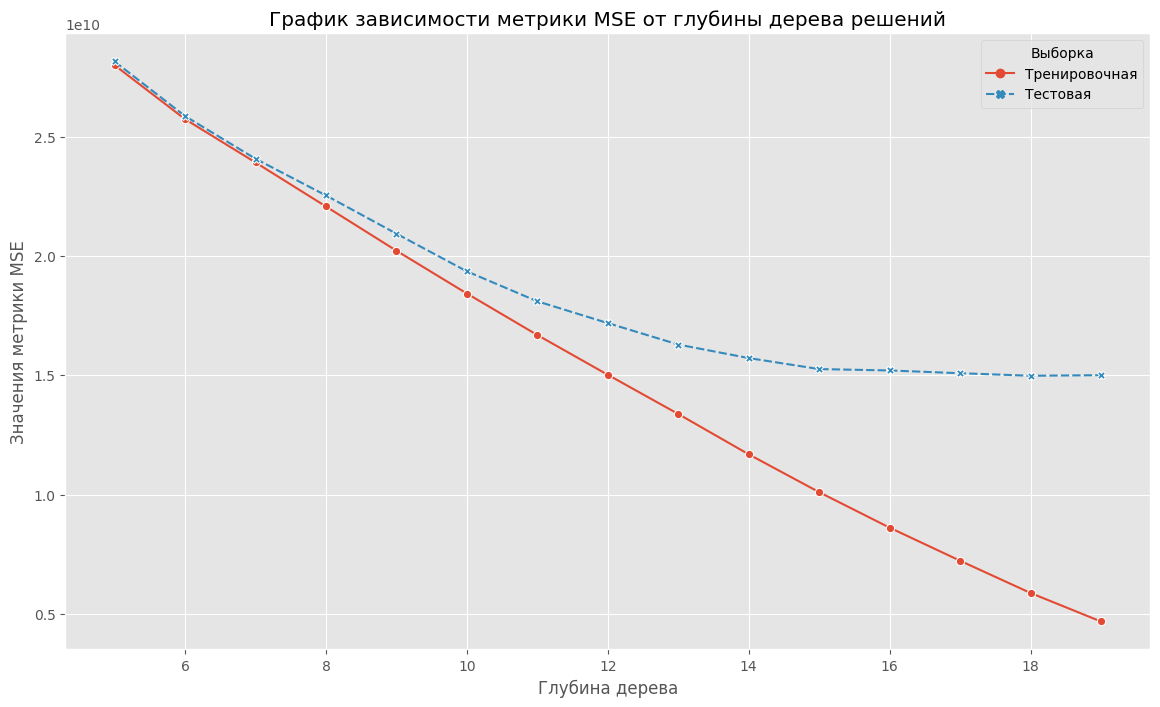

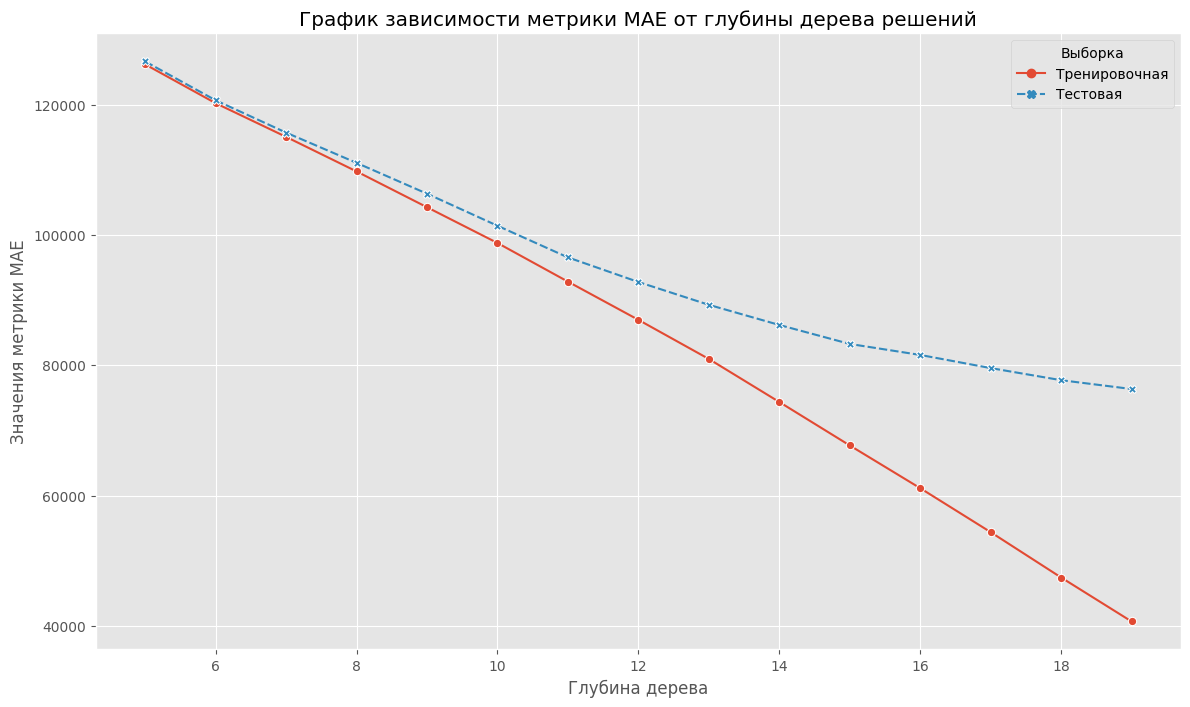

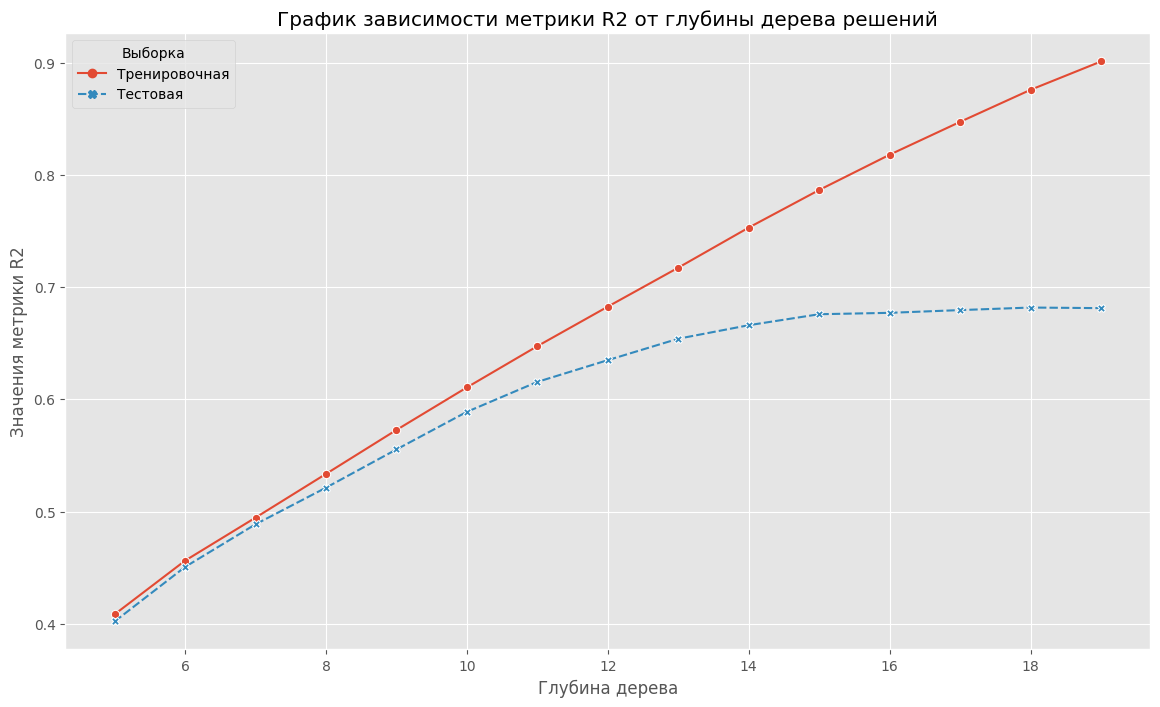

In [528]:
depths = list(np.arange(5, 20))
mse_train_score = []
mse_test_score = []
mae_train_score = []
mae_test_score = []
r2_train_score = []
r2_test_score = []

for d in depths:
    tree_reg = DecisionTreeRegressor(
        max_depth = d,
        random_state = 42)

    tree_reg.fit(X_train, y_train)

    y_train_pred = tree_reg.predict(X_train)
    y_test_pred = tree_reg.predict(X_test)

    # Задаем метрики
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train_score.append(mse_train)
    mse_test_score.append(mse_test)
    mae_train_score.append(mae_train)
    mae_test_score.append(mae_test)
    r2_train_score.append(r2_train)
    r2_test_score.append(r2_test)

# Создаем датафреймы по метрикам
mse_df = pd.DataFrame(
    data = {'Тренировочная': mse_train_score,
            'Тестовая': mse_test_score},
    index = depths)

mae_df = pd.DataFrame(
    data = {'Тренировочная': mae_train_score,
            'Тестовая': mae_test_score},
    index = depths)

r2_df = pd.DataFrame(
    data = {'Тренировочная': r2_train_score,
            'Тестовая': r2_test_score},
    index = depths)

# Строим графики
fig = plt.figure(figsize=(14, 8))
lineplot = sns.lineplot(
    data = mse_df,
    dashes = True,
    markers = True
)
lineplot.set_title('График зависимости метрики MSE от глубины дерева решений')
lineplot.set_ylabel('Значения метрики MSE')
lineplot.set_xlabel('Глубина дерева')
lineplot.legend(title ='Выборка')

fig = plt.figure(figsize=(14, 8))
lineplot = sns.lineplot(
    data = mae_df,
    dashes = True,
    markers = True
)
lineplot.set_title('График зависимости метрики MAE от глубины дерева решений')
lineplot.set_ylabel('Значения метрики MAE')
lineplot.set_xlabel('Глубина дерева')
lineplot.legend(title ='Выборка')

fig = plt.figure(figsize=(14, 8))
lineplot = sns.lineplot(
    data = r2_df,
    dashes = True,
    markers = True
)
lineplot.set_title('График зависимости метрики R2 от глубины дерева решений')
lineplot.set_ylabel('Значения метрики R2')
lineplot.set_xlabel('Глубина дерева')
lineplot.legend(title ='Выборка')

Давайте внимательно посмотрим на графики. У нас есть 3 метрики MSE, MAE, R2.

МSE показывает лучший результат при глубине дерева в 18.
МАЕ показывает лучший результат при глубине дерева более 18.
R2 перестает улучшаться после глубины 15.  

Давайте обучим дерево с максимальной глубиной 16 и минимальным количеством листьев = 10 и увидим, как изменятся метрики.  

In [531]:
# Задаем параметры дерева
tree_reg = DecisionTreeRegressor(
    max_depth = 16,
    min_samples_leaf = 10,
    random_state = 42)
# Обучаем дерево
tree_reg.fit(X_train, y_train)
# делаем предсказание
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

# Задаем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 10633971880.69
Test MSE: 14333724101.63
Train MAE: 70806.98
Test MAE: 81543.48
Train R2: 0.78
Test R2: 0.70


Мы видим неплохие результаты для неансамблевой модели. 
При этом наблюдается переобучение модели (тестовые метрики хуже тренировочных).
Метрики значительно улучшились по сравнению с базовой моделью. 

## 5.5 RandomForestRegressor (Случайный лес)

Перейдем от моделей построения решающих деревьев по отдельности к ансамблевым методам. К одному из самых простых, но в тоже время популярных ансамблевых методов - RandomForestRegressor. RandomForestRegressor - это множество решающих деревьев. В задаче регрессии их ответы усредняются, в задаче классификации принимается решение голосованием по большинству. Все деревья строятся независимо.

In [514]:
# Создаем экземпляр модели RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=RANDOM_SEED)

# Обучаем модель на обучающих данных
rf_regressor.fit(X_train, y_train)

# Предсказания на обучающих и тестовых данных
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Вычисляем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 1178752878.78
Test MSE: 8414357543.57
Train MAE: 21594.01
Test MAE: 57990.95
Train R2: 0.98
Test R2: 0.82


По данной модели мы получили очень интересные результаты. С одной стороны на тренировочных метриках RandomForestRegressor лучше CatBoostRegression. С другой стороны на тестовых метриках модели показывают практичесчки идентичные результаты. С одной стороны это говорит о том, что RandomForestRegressor переобучилась и сильно подстроилась под тренировочные данные, с другой сторны она на тестовых данных показала результат чуть лучше, чем CatBoostRegression. С другой стороны CatBoostRegression лучше оценила закономерности между данными, не переобучилась, но на тестовой выборке ее метрики чуть хуже, но мы помним. что в CatBoostRegression мы пока не подобрали оптимальные параметры. Кстати, надо еще отметить, что CatBoostRegression потребляет гораздо больше ресурсов и обучается существенно медленнне чем RandomForestRegressor. Наша задача перестает быть тривиальной. 

## 5.6 GradientBoostingRegressor

Градиентный бустинг – это продвинутый алгоритм машинного обучения для решения задач классификации и регрессии. Он строит предсказание в виде ансамбля слабых предсказывающих моделей, которыми в основном являются деревья решений. Из нескольких слабых моделей в итоге мы собираем одну, но уже эффективную. Общая идея алгоритма – последовательное применение предиктора (предсказателя) таким образом, что каждая последующая модель сводит ошибку предыдущей к минимуму.

In [536]:
# Задаем параметры модели
grad_boost_reg = GradientBoostingRegressor(
    learning_rate = 0.1,
    n_estimators = 50,
    max_depth = 16,
    min_samples_split = 10,
    random_state = 42
)
# Обучаем модель
grad_boost_reg.fit(X_train, y_train)
# Делаем предсказание
y_train_pred = grad_boost_reg.predict(X_train)
y_test_pred = grad_boost_reg.predict(X_test)

# Вычисляем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 2204515897.21
Test MSE: 8195020407.31
Train MAE: 32604.64
Test MAE: 58792.17
Train R2: 0.95
Test R2: 0.83


Метрики схожи RandomForestRegressor. На тренировочных данных мы видим отличные результаты, а вот на тестовых значительно хуже. Модель переобучилась

## 5.7 StackingRegressor

StackingRegressor - это мета-оценщик в библиотеке scikit-learn, который объединяет несколько моделей регрессии для создания более точных прогнозов. Он работает путем комбинирования прогнозов различных базовых регрессоров, используя их в качестве входных данных для финального регрессора.
Объединим работу трех моделей при помощи стэкинга.

In [537]:
estimators = [
    ('dt', DecisionTreeRegressor(
        max_depth = 16,
        min_samples_leaf = 10,
        random_state = 42)
     ),
    ('rf', RandomForestRegressor(
        n_estimators = 150,
        max_depth = 16,
        min_samples_leaf = 10,
        n_jobs = -1,
        warm_start = True,
        random_state = 42)
     ),
    ('gb', GradientBoostingRegressor(
        learning_rate = 0.1,
        n_estimators = 50,
        max_depth = 16,
        min_samples_split = 20,
        random_state = 42)
     )
]

stack_reg = StackingRegressor(
    estimators = estimators,
    final_estimator = RandomForestRegressor(
        n_estimators = 150,
        max_depth = 17,
        min_samples_leaf = 5,
        n_jobs = -1,
        warm_start = True,
        random_state = 42),
    cv = 2,
    n_jobs = -1,
    verbose = 5
)

stack_reg.fit(X_train, y_train)

y_train_pred = stack_reg.predict(X_train)
y_test_pred = stack_reg.predict(X_test)

# Вычисляем метрики
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Выводим метрики
print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Train MAE: {mae_train:.2f}")
print(f"Test MAE: {mae_test:.2f}")
print(f"Train R2: {r2_train:.2f}")
print(f"Test R2: {r2_test:.2f}")

Train MSE: 2759001284.51
Test MSE: 8323777357.46
Train MAE: 36131.49
Test MAE: 59049.63
Train R2: 0.94
Test R2: 0.82


Мы видим отчень интересные результаты по метрикам. Стэкинг трех независимых моделей не смог значимо улучшить результаты.

## 5.8 Сравненире моделей

Сведем метрики на тестовых данных в одну таблицу:

| Model                                  | MSE(test)         | MAE(test)   | R2 (test)|
|----------------------------------------|-------------------|-------------|----------|
| LinearRegression                       | 34010057971.44    | 140735.89   | 0.28     |
| **CatBoostRegression**                 | **9740166394.57** | **67294.96**| **0.79** |
| ElasticNetCV                           | 46782152184.99    | 171173.13   | 0.01     |
| DecisionTreeRegressor                  | 14333724101.63    | 81543.48    | 0.70     |
| RandomForestRegressor                  | 8414357543.57     | 57990.95    | 0.82     |
| GradientBoostingRegressor              | 8195020407.31     | 58792.17    | 0.82     |
| StackingRegressor                      | 8323777357.46     | 59049.63    | 0.82     |

Сразу несколько моделий показали хорошие результаты CatBoostRegression, DecisionTreeRegressor, GradientBoostingRegressor, StackingRegressor. Но только CatBoostRegression не переобучилась как мы выяснили раньше. Принимаем решение именно ее отправлять в продакшэн.

In [ ]:
# Производим сериализацию модели и сохраняем ее в файл формата pkl
with open("C:/DS/IDE/Diplom/web/app/models/best_cb_model.pkl", "wb") as f:
    pickle.dump(best_cb_model, f)

В результате данного модуля мы проделали следующую работу:
* Построили семь различных моделий машинного обучения от самой простой модели линейной регрессии до сложной модели стэкинга 
* С помощью метрик MSE, MAE, R2 сравнили между собой модели 
* Выбрали лучшую модель и сохранили ее в pkl


# 6. Подготовка модели к продакшену

In [517]:
# Загрузка сохраненной модели из файла pickle
with open("C:/DS/IDE/Diplom/web/app/models/best_cb_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [543]:
# создадим тестовый набор 
req = [['Active', '5.0', '283870', '50401', 'NC', False, 'single_family_home', '2000', True, '3.8', '5.60']]

In [544]:
# Сохраним запрос как датафрейм
cols = ['status', 'baths', 'sqft', 'zipcode', 'state', 'pool', 'Type', 'Year built', 'Heating_encoded', 'school_rating_mean', 'school_dist_min']
req_df = pd.DataFrame(req, columns=cols)


In [545]:
req_df

status baths    sqft zipcode state   pool                Type Year built  \
0  Active   5.0  283870   50401    NC  False  single_family_home       2000   

   Heating_encoded school_rating_mean school_dist_min  
0             True                3.8            5.60

In [546]:
# Сделаем предсказание
X_test = req_df
prediction = loaded_model.predict(X_test)
print('Пресказание сервера:', round(prediction[0]))


Пресказание сервера: 649722


Отлично! Модель воспроизводится и делает предсказания!

In [560]:
# для проверки создадим другой тестовый набор с большей площадью
req = [['Active', '25.0', '28387000', '50401', 'NC', False, 'single_family_home', '2000', True, '5.8', '1.60']]
req_df = pd.DataFrame(req, columns=cols)

In [561]:
# Сделаем предсказание
X_test = req_df
prediction = loaded_model.predict(X_test)
print('Пресказание сервера:', round(prediction[0]))


Пресказание сервера: 745772


Отлично! Модель предсказала новую цену по новым данным!

### Контейнеризация Docker

Базовый образ, который буду использовать для своего контейнера — tiangolo/uwsgi-nginx-flask.  
Образ этот создан на базе ОС Linux, и в нём уже настроено взаимодействие серверов uWSGI и NGINX через сокеты.

Вся необходимая структура и сам конфигурационный файл для создания Docker образа находится в директории web.

Образ создаем командой, находясь в терминале нашего проекта:

     docker build -t diplom . 

Теперь нужно запустить, созданный контейнер.  
Делается это с помощью команды docker run. Запустим контейнер на 80 порту:

    docker run -it --rm --name=diplom -p=80:80 diplom

Далее выполним POST-запрос.  
Запустим в соседнем терминале скрипт для отправки запросов на 'http://localhost/predict'. В скрипте прописаны параметры гипотетического нового объекта недвижимости.

    python3 test/client.py

Меняя в строке запроса в файле client.py параметры предполагаемого объекта мы будем получать новое предсказание.

### Выводы

1. Дипломный проект позволил проверить свои силы и приобретенные за время курса DS-знания и навыки на реальной задаче. 
2. Удалось пройтись по основным инструментам, изученным в ходе курса.
3. Выяснилось, что готовые модели "из коробки" зачастую могут быть очень эффективными, но и затратными на ресурсы.
4. Удалось подготовить рабочую модель предсказания цен стоимости жилья.